---
title: "Rock Decades Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Decade Classification for Rock Songs

In [24]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
tracks = pd.read_csv('../data/clean_data/tracks.csv')

# read in rock genre data
rock = pd.read_csv('../data/raw_data/genre_data/rock.csv')

# extrack name column to list
rock_artists = rock['id'].tolist()

# only keep rows in tracks that have artists in rock_artists
tracks = tracks[tracks['artist_id'].isin(rock_artists)]

# drop columns that will not be used in our models for obvious reasons 
tracks = tracks.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name'], axis=1)

# split 'key_mode' column
tracks['key'] = tracks['key_mode'].apply(lambda x: x.split(' ')[0])
tracks['mode'] = tracks['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
tracks.drop('key_mode', axis=1, inplace=True)
# covert mode into binary
tracks['mode'] = tracks['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
tracks['key'] = tracks['key'].apply(lambda x: key_dict[x])

# Delete row with decade column == 1940s
tracks = tracks[tracks['decade'] != '1940s']

# what does that data look like? 
tracks.head(20)

danceability  energy  loudness  speechiness  acousticness  \
943         0.455   0.790    -4.049       0.0432      0.000004   
944         0.526   0.871    -4.132       0.0320      0.000017   
945         0.599   0.787    -4.708       0.0338      0.000021   
946         0.570   0.753    -5.980       0.0365      0.000002   
947         0.675   0.930    -4.515       0.0319      0.000083   
948         0.616   0.801    -4.390       0.0342      0.000165   
949         0.521   0.881    -5.309       0.0387      0.000005   
950         0.737   0.709    -5.744       0.0337      0.000120   
951         0.490   0.905    -4.488       0.0300      0.000459   
952         0.649   0.849    -4.502       0.0326      0.000019   
953         0.628   0.830    -4.752       0.0626      0.000380   
954         0.549   0.731    -5.617       0.0350      0.000123   
955         0.572   0.825    -3.977       0.0400      0.000071   
956         0.520   0.872    -4.354       0.0383      0.000007   
957         0.537   0.880    -4.902       0.0353      0.000131   
958         0.510   0.896    -3.585       0.0624      0.000011   
959         0.502   0.816    -4.562       0.0329      0.000047   
960         0.626   0.833    -4.352       0.0285      0.000157   
961         0.570   0.758    -4.362       0.0360      0.000056   
962         0.457   0.930    -4.203       0.0588      0.000005   

     instrumentalness  liveness  valence    tempo  time_signature  \
943          0.000210    0.0866    0.220  125.964               4   
944          0.000142    0.0573    0.745  109.820               4   
945          0.000053    0.0640    0.822  114.065               4   
946          0.627000    0.1330    0.477  119.990               4   
947          0.000454    0.3150    0.778  110.013               4   
948          0.000040    0.1100    0.400  120.029               4   
949          0.011400    0.1410    0.564  160.026               4   
950          0.002940    0.1990    0.839  108.016               4   
951          0.009340    0.2020    0.537   94.988               4   
952          0.085200    0.0949    0.864  116.009               4   
953          0.000025    0.0982    0.767  120.004               4   
954          0.000013    0.0655    0.622   86.239               4   
955          0.000134    0.1340    0.560   98.057               4   
956          0.246000    0.2070    0.449  120.006               4   
957          0.005310    0.1350    0.370  120.976               4   
958          0.000771    0.0826    0.652  120.134               4   
959          0.021700    0.3020    0.475   99.372               4   
960          0.000717    0.0608    0.863  107.572               4   
961          0.030400    0.4480    0.451   93.095               4   
962          0.197000    0.1740    0.674  150.188               4   

     duration_ms decade  key  mode  
943       217466  2020s    7     1  
944       246466  2020s    7     1  
945       185133  2020s    2     1  
946       212226  2020s    9     1  
947       190333  2020s    0     1  
948       222253  2020s    9     1  
949       210360  2020s    9     1  
950       174400  2020s    0     1  
951       219640  2020s    0     1  
952       192640  2020s    9     1  
953       185320  2020s    7     1  
954       211146  2020s    2     1  
955       183053  2010s    8     1  
956       167133  2010s    0     1  
957       204373  2010s    5     1  
958       177253  2010s    9     1  
959       215440  2010s    9     1  
960       202586  2010s    2     1  
961       164226  2010s    9     1  
962       210200  2010s    9     1

In [25]:
tracks['decade'].value_counts()

decade
2010s    1814
2000s    1194
2020s     813
1990s     797
1980s     543
1970s     527
1960s     255
Name: count, dtype: int64

In [26]:
decades = tracks

## Classification Data Prep

In [27]:
# convert key and mode to factors
decades['key'] = decades['key'].astype('category')
decades['mode'] = decades['mode'].astype('category')

# rename mode to major
decades.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
decades.head(20)

danceability  energy  loudness  speechiness  acousticness  \
943         0.455   0.790    -4.049       0.0432      0.000004   
944         0.526   0.871    -4.132       0.0320      0.000017   
945         0.599   0.787    -4.708       0.0338      0.000021   
946         0.570   0.753    -5.980       0.0365      0.000002   
947         0.675   0.930    -4.515       0.0319      0.000083   
948         0.616   0.801    -4.390       0.0342      0.000165   
949         0.521   0.881    -5.309       0.0387      0.000005   
950         0.737   0.709    -5.744       0.0337      0.000120   
951         0.490   0.905    -4.488       0.0300      0.000459   
952         0.649   0.849    -4.502       0.0326      0.000019   
953         0.628   0.830    -4.752       0.0626      0.000380   
954         0.549   0.731    -5.617       0.0350      0.000123   
955         0.572   0.825    -3.977       0.0400      0.000071   
956         0.520   0.872    -4.354       0.0383      0.000007   
957         0.537   0.880    -4.902       0.0353      0.000131   
958         0.510   0.896    -3.585       0.0624      0.000011   
959         0.502   0.816    -4.562       0.0329      0.000047   
960         0.626   0.833    -4.352       0.0285      0.000157   
961         0.570   0.758    -4.362       0.0360      0.000056   
962         0.457   0.930    -4.203       0.0588      0.000005   

     instrumentalness  liveness  valence    tempo  time_signature  \
943          0.000210    0.0866    0.220  125.964               4   
944          0.000142    0.0573    0.745  109.820               4   
945          0.000053    0.0640    0.822  114.065               4   
946          0.627000    0.1330    0.477  119.990               4   
947          0.000454    0.3150    0.778  110.013               4   
948          0.000040    0.1100    0.400  120.029               4   
949          0.011400    0.1410    0.564  160.026               4   
950          0.002940    0.1990    0.839  108.016               4   
951          0.009340    0.2020    0.537   94.988               4   
952          0.085200    0.0949    0.864  116.009               4   
953          0.000025    0.0982    0.767  120.004               4   
954          0.000013    0.0655    0.622   86.239               4   
955          0.000134    0.1340    0.560   98.057               4   
956          0.246000    0.2070    0.449  120.006               4   
957          0.005310    0.1350    0.370  120.976               4   
958          0.000771    0.0826    0.652  120.134               4   
959          0.021700    0.3020    0.475   99.372               4   
960          0.000717    0.0608    0.863  107.572               4   
961          0.030400    0.4480    0.451   93.095               4   
962          0.197000    0.1740    0.674  150.188               4   

     duration_ms decade key major  
943       217466  2020s   7     1  
944       246466  2020s   7     1  
945       185133  2020s   2     1  
946       212226  2020s   9     1  
947       190333  2020s   0     1  
948       222253  2020s   9     1  
949       210360  2020s   9     1  
950       174400  2020s   0     1  
951       219640  2020s   0     1  
952       192640  2020s   9     1  
953       185320  2020s   7     1  
954       211146  2020s   2     1  
955       183053  2010s   8     1  
956       167133  2010s   0     1  
957       204373  2010s   5     1  
958       177253  2010s   9     1  
959       215440  2010s   9     1  
960       202586  2010s   2     1  
961       164226  2010s   9     1  
962       210200  2010s   9     1

In [28]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = decades.select_dtypes(include=[np.number]).columns
decades[numerical_columns] = (decades[numerical_columns] - decades[numerical_columns].min()) / (decades[numerical_columns].max() - decades[numerical_columns].min())

# what does the data look like now?
decades.head(20)

danceability    energy  loudness  speechiness  acousticness  \
943      0.464286  0.791583  0.937517     0.046352      0.000004   
944      0.536735  0.872745  0.936126     0.034335      0.000017   
945      0.611224  0.788577  0.926475     0.036266      0.000021   
946      0.581633  0.754509  0.905161     0.039163      0.000002   
947      0.688776  0.931864  0.929708     0.034227      0.000084   
948      0.628571  0.802605  0.931803     0.036695      0.000166   
949      0.531633  0.882766  0.916404     0.041524      0.000005   
950      0.752041  0.710421  0.909115     0.036159      0.000121   
951      0.500000  0.906814  0.930161     0.032189      0.000461   
952      0.662245  0.850701  0.929926     0.034979      0.000019   
953      0.640816  0.831663  0.925737     0.067167      0.000382   
954      0.560204  0.732465  0.911243     0.037554      0.000124   
955      0.583673  0.826653  0.938723     0.042918      0.000072   
956      0.530612  0.873747  0.932406     0.041094      0.000007   
957      0.547959  0.881764  0.923224     0.037876      0.000132   
958      0.520408  0.897796  0.945292     0.066953      0.000011   
959      0.512245  0.817635  0.928921     0.035300      0.000047   
960      0.638776  0.834669  0.932440     0.030579      0.000158   
961      0.581633  0.759519  0.932272     0.038627      0.000057   
962      0.466327  0.931864  0.934936     0.063090      0.000005   

     instrumentalness  liveness   valence     tempo  time_signature  \
943          0.000212  0.087563  0.224949  0.522661             0.8   
944          0.000144  0.057937  0.761759  0.455675             0.8   
945          0.000053  0.064712  0.840491  0.473289             0.8   
946          0.633974  0.134479  0.487730  0.497873             0.8   
947          0.000459  0.318504  0.795501  0.456476             0.8   
948          0.000040  0.111223  0.408998  0.498035             0.8   
949          0.011527  0.142568  0.576687  0.663995             0.8   
950          0.002973  0.201213  0.857873  0.448190             0.8   
951          0.009444  0.204247  0.549080  0.394133             0.8   
952          0.086148  0.095956  0.883436  0.481355             0.8   
953          0.000026  0.099292  0.784254  0.497932             0.8   
954          0.000013  0.066229  0.635992  0.357831             0.8   
955          0.000135  0.135490  0.572597  0.406867             0.8   
956          0.248736  0.209302  0.459100  0.497940             0.8   
957          0.005369  0.136502  0.378323  0.501965             0.8   
958          0.000780  0.083519  0.666667  0.498471             0.8   
959          0.021941  0.305359  0.485685  0.412323             0.8   
960          0.000725  0.061476  0.882413  0.446348             0.8   
961          0.030738  0.452983  0.461145  0.386278             0.8   
962          0.199191  0.175935  0.689162  0.623174             0.8   

     duration_ms decade key major  
943     0.077988  2020s   7     1  
944     0.088626  2020s   7     1  
945     0.066128  2020s   2     1  
946     0.076066  2020s   9     1  
947     0.068036  2020s   0     1  
948     0.079744  2020s   9     1  
949     0.075382  2020s   9     1  
950     0.062191  2020s   0     1  
951     0.078786  2020s   0     1  
952     0.068882  2020s   9     1  
953     0.066197  2020s   7     1  
954     0.075670  2020s   2     1  
955     0.065365  2010s   8     1  
956     0.059526  2010s   0     1  
957     0.073186  2010s   5     1  
958     0.063238  2010s   9     1  
959     0.077245  2010s   9     1  
960     0.072530  2010s   2     1  
961     0.058459  2010s   9     1  
962     0.075323  2010s   9     1

In [29]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(decades, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['decade'], axis=1)
y_train = train[['decade']]
X_test = test.drop(['decade'], axis=1)
y_test = test[['decade']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (4754, 13) 
Shape of X_test:  (1189, 13) 
Shape of y_train:  (4754, 1) 
Shape of y_test:  (1189, 1)


In [30]:
train['decade'].value_counts()

decade
2010s    1451
2000s     960
1990s     638
2020s     633
1980s     453
1970s     416
1960s     203
Name: count, dtype: int64

In [31]:
from sklearn.utils import resample

# Combine the features and target for training set
train_df = pd.concat([X_train, y_train], axis=1)

# sample the training dataset classes
resampled_df_list = []
min_class_size = int(y_train.value_counts().mean())

for decade_value, group in train_df.groupby('decade'):
    resampled_group = resample(group,
                               replace=True,
                               n_samples=min_class_size,
                               random_state=37)
    resampled_df_list.append(resampled_group)

# Combine the resampled training dataframes
balanced_train_df = pd.concat(resampled_df_list)

# Print the new class distribution
print("New class distribution after resampling:")
print(balanced_train_df['decade'].value_counts())
print("Balanced dataset created and saved successfully without using SMOTE.")

New class distribution after resampling:
decade
1960s    679
1970s    679
1980s    679
1990s    679
2000s    679
2010s    679
2020s    679
Name: count, dtype: int64
Balanced dataset created and saved successfully without using SMOTE.


In [32]:
X_train = balanced_train_df.drop(['decade'], axis=1)
y_train = balanced_train_df[['decade']]

In [33]:
# value counts of genre in the training data
y_train['decade'].value_counts()

decade
1960s    679
1970s    679
1980s    679
1990s    679
2000s    679
2010s    679
2020s    679
Name: count, dtype: int64

In [34]:
# value counts of genre in test data
y_test['decade'].value_counts()

decade
2010s    363
2000s    234
2020s    180
1990s    159
1970s    111
1980s     90
1960s     52
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

## Logistic Regression using OVR

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 3792.690190732246, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.32548359966358287
Classification Report:
              precision    recall  f1-score   support

       1960s       0.17      0.46      0.25        52
       1970s       0.42      0.36      0.39       111
       1980s       0.33      0.52      0.40        90
       1990s       0.34      0.43      0.38       159
       2000s       0.32      0.21      0.25       234
       2010s       0.46      0.20      0.28       363
       2020s       0.29      0.48      0.36       180

    accuracy                           0.33      1189
   macro avg       0.33      0.38      0.33      1189
weighted avg       0.36      0.33      0.32      1189



Text(0.5, 1.0, 'Training Confusion Matrix')

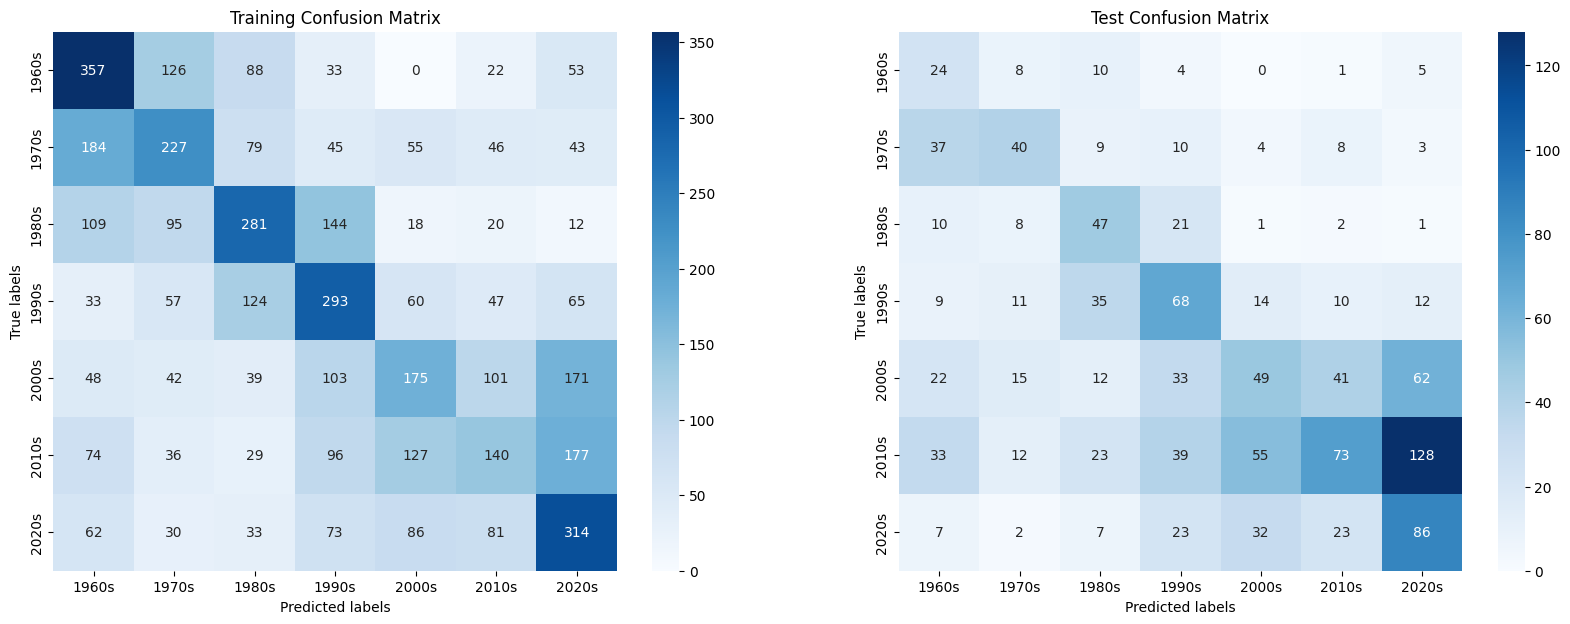

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [38]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 1438.44988828766, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.31118587047939444
SVM Classification Report:
              precision    recall  f1-score   support

       1960s       0.22      0.38      0.28        52
       1970s       0.31      0.43      0.36       111
       1980s       0.30      0.43      0.35        90
       1990s       0.37      0.45      0.40       159
       2000s       0.28      0.31      0.29       234
       2010s       0.44      0.17      0.24       363
       2020s       0.26      0.33      0.29       180

    accuracy                           0.31      1189
   macro avg       0.31      0.36      0.32      1189
weighted avg       0.34      0.31      0.30      1189



Text(0.5, 1.0, 'Training Confusion Matrix')

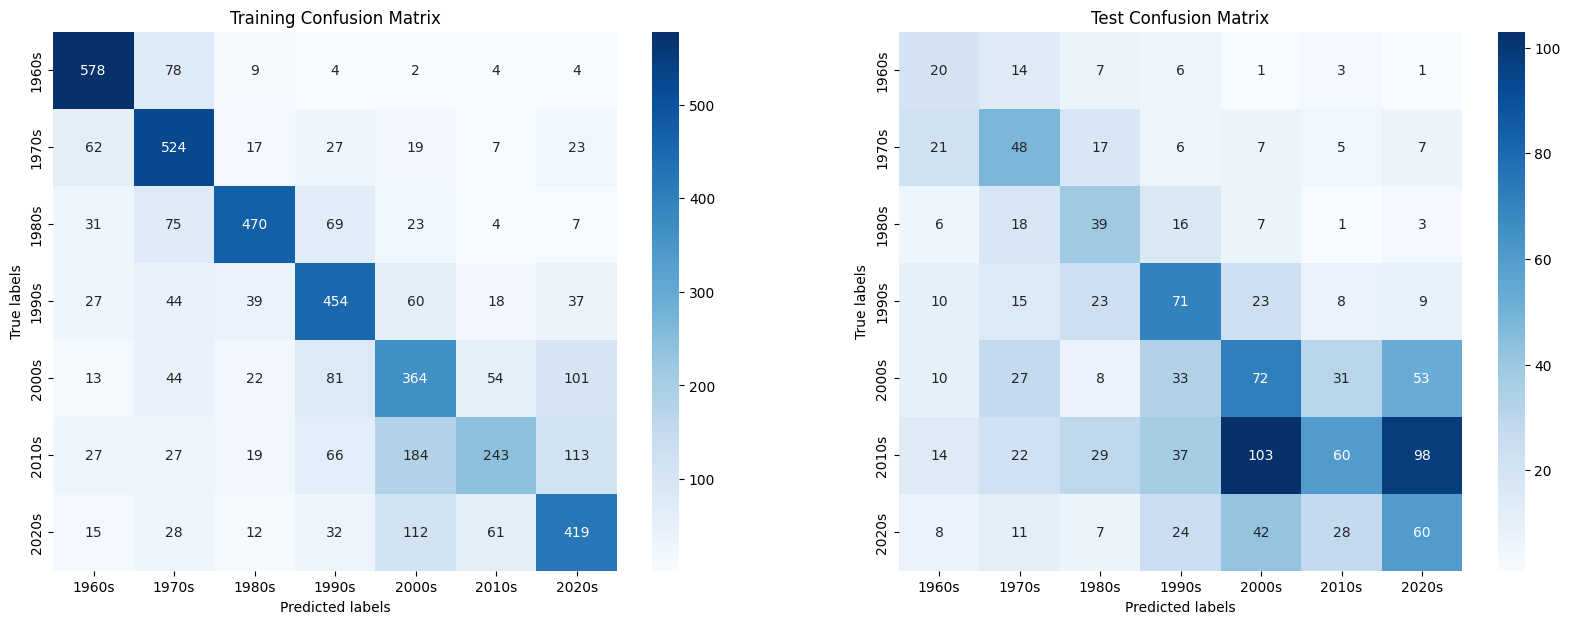

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [40]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [64, 128, 256],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [1, 2, 3],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1656 - loss: 2.7898    
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1510 - loss: 2.6297  
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1514 - loss: 2.6362
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1656 - loss: 2.0392
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1533 - loss: 2.7919
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1526 - loss: 2.0564
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1596 - loss: 2.6473
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1591 - loss: 2.6605
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1545 - loss: 2.062441
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.2341 - loss: 2.1887
Epoch 3/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1581 - loss: 2.7548   
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1599 - loss: 2.8026 
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1622 - loss: 2.8136
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1709 - loss: 2.0455
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1905 - loss: 2.0532
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1772 - loss: 2.8475
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1486 - loss: 2.0680
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1480 - loss: 2.0572
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1809 - loss: 2.8324
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2353 - loss: 2.1530
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.4307 - loss: 1.5438
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3380 - loss: 1.7167
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.4065 - loss: 1.5627
106/119 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.3098 - loss: 1.7273Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.4114 - loss: 1.5692
 46/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3245 - loss: 1.7493 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.3095 - loss: 1.7286
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.3193 - loss: 1.7180
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.3178 - loss: 1.7487
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step tep - accuracy: 0.3190 - loss: 1.743
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - ac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.3176 - loss: 1.7246
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.3198 - loss: 1.7285
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/stepEpoch 1/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/stepEpoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1790 - loss: 2.8260   
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1793 - loss: 2.0490    
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1726 - loss: 2.0516
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1739 - loss: 2.0474
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1681 - loss: 2.0513
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4282 - loss: 1.5401
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4166 - loss: 1.5735
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2385 - loss: 1.8110 
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2435 - loss: 1.7959
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2364 - loss: 1.79549
Epoch 49/50
 39/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2290 - loss: 1.7968 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.4210 - loss: 1.5455
Epoch 50/50
 54/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2228 - loss: 1.8475Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4218 - loss: 1.5488
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2488 - loss: 1.8144
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4393 - loss: 1.5366
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.2566 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/stepEpoch 1/50acy: 0.2812 - loss: 1.8221
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/stepEpoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step tep - accuracy: 0.2658 - loss: 1.808
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.2607 - loss: 1.8115
Epoch 1/50
Epoch 1/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.1424 - loss: 2.1147
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.1696 - loss: 2.0838
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1499 - loss: 2.0950
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.2335 - loss: 1.9737
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.2392 - loss: 1.9562 
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.1681 - loss: 2.0725
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.2253 - loss: 1.9925
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.2782 - loss: 1.8851
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.2669 - loss: 1.8762
 31/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1447 - loss: 4.1380    Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.2286 - loss: 1.9172
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2529 - loss: 1.7960
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4147 - loss: 1.5527
 60/119 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.2447 - loss: 1.8000Epoch 46/50
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2329 - loss: 1.8277
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4375 - loss: 1.5373
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2426 - loss: 1.8068
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.2455 - loss: 1.8058
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.2482 - loss: 1.7980
Epoch 49/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2812 - loss: 1.7494Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4247 - loss: 1.5384
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2583 - loss: 1.78799
Epoch 47/50
119/119 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2443 - loss: 1.7979
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/stepEpoch 1/50 - accuracy: 0.4256 - loss: 1.5275 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step tep - accuracy: 0.2517 - loss: 1.797
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.4287 - loss: 1.534
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.2517 - loss: 1.7983
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4280 - loss: 1.5364
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.4223 - loss: 1.5393
Epoch 49/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step racy: 0.4375 - loss: 1.557
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/stepEpoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 1/50
 49/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4295 - loss: 1.5638 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

  1/119 ━━━━━━━━━━━━━━━━━━━━ 1:47 909ms/step - accuracy: 0.0625 - loss: 2.4035Epoch 1/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1:47 910ms/step - accuracy: 0.1875 - loss: 2.3270Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4221 - loss: 1.5533  
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1477 - loss: 2.1563 
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1686 - loss: 2.1491
 60/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4448 - loss: 1.5004Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1628 - loss: 4.3019
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4394 - loss: 1.5087
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.2298 - loss: 1.9685
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1472 - loss: 4.3228
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2318 - loss: 1.97807
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2199 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2755 - loss: 1.8970
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2679 - loss: 1.8447  
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2337 - loss: 1.9884  
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2823 - loss: 1.8579
 78/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1567 - loss: 4.7366Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2061 - loss: 2.0124 
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2005 - loss: 2.1806
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1678 - loss: 2.2296
Epoch 2/50
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3034 - loss: 1.8040
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1667 - loss: 4.3375
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1611 - loss: 4.3754
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1847 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4145 - loss: 1.5654
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2467 - loss: 1.8213
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3963 - loss: 1.5718
Epoch 38/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2535 - loss: 1.8135
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4184 - loss: 1.5462
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4148 - loss: 1.5547
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4012 - loss: 1.5862
 17/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3666 - loss: 1.6420 Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2634 - loss: 1.7962
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4201 - loss: 1.5699
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2558 - loss: 1.7999
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2643 - loss: 1.7903
Epoch 42/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4344 - loss: 1.5240
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3976 - loss: 1.6046
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2360 - loss: 1.8268
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2520 - loss: 1.7933
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3958 - loss: 1.5955 
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2395 - loss: 1.8079
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4096 - loss: 1.5687
 34/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3976 - loss: 1.5610Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4104 - loss: 1.5838
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2580 - loss: 1.8075 
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

2024-04-16 12:49:22.534811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [0] vs. [64,64]
	 [[{{function_node __inference_one_step_on_data_87770}}{{node adam/truediv_9}}]]
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2412 - loss: 1.8221
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4244 - loss: 1.5543 
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3929 - loss: 1.5888
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2437 - loss: 1.8106
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4174 - loss: 1.5372 
117/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4119 - loss: 1.5649Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4119 - loss: 1.5654
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2471 - loss: 1.8147
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2313 - loss: 1.8078
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2536 - loss: 1.8004
 19/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4055 - loss: 1.5510 Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4096 - loss: 1.5765 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4200 - loss: 1.5467
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2414 - loss: 1.8108
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.1643 - loss: 2.3668
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3937 - loss: 1.5832
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2417 - loss: 1.8001 
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3967 - loss: 1.5911 
114/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4418 - loss: 1.5281Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4413 - loss: 1.5285
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4145 - loss: 1.5637
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1569 - loss: 2.0731
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2501 - loss: 1.8000
105/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2593 - loss: 1.7997Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1515 - loss: 1.9559
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2509 - loss: 1.8070
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1606 - loss: 2.3922
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4179 - loss: 1.5546
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4136 - loss: 1.5860
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1384 - loss: 1.9507
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4153 - loss: 1.5668
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4129 - loss: 1.5520
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4434 - loss: 1.5106
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2498 - loss: 1.8190
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2599 - loss: 1.8046
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.147

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2512 - loss: 1.8309
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.1674 - loss: 2.3749
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4162 - loss: 1.5493
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4076 - loss: 1.5679
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4175 - loss: 1.5612
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.1485 - loss: 2.0799
 95/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4198 - loss: 1.5354Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2373 - loss: 1.9457
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1384 - loss: 1.9467
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2802 - loss: 1.7873
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4181 - loss: 1.5377
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss: 1.8308
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4083 - loss: 1.5533
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1408 - loss: 1.9461
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1477 - loss: 1.9492
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.2428 - loss: 1.8607
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1662 - loss: 2.0553
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepuracy: 0.0938 - loss: 1.98ss: 1.5540
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4253 - loss: 1.5561
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4231 - loss: 1.5539 
Epoch 45/50
 66/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1490 - loss: 1.9461

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4130 - loss: 1.5633
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1290 - loss: 1.9477
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2553 - loss: 1.8045
Epoch 50/50
 97/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4220 - loss: 1.5499Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2477 - loss: 1.8576
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1430 - loss: 1.9462 
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4216 - loss: 1.5502
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1680 - loss: 1.9826
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1356 - loss: 1.9470     
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4315 - loss: 1.5389
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4192 - loss: 1.5464
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepep - accuracy: 0.2201 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.1406 - loss: 1.9461
Epoch 17/50
Epoch 1/50
 98/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2374 - loss: 1.8997Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4309 - loss: 1.5399
Epoch 47/50
 76/119 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.1546 - loss: 1.9461Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.2560 - loss: 1.8615
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2361 - loss: 1.8984
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.1498 - loss: 1.9462
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1360 - loss: 1.94617
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.2436 - loss: 1.8640
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.2199 - loss: 1.8912
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.1415 - loss: 1.9461
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 13/50
 41/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3020 - loss: 1.7860 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2695 - loss: 1.8435
 96/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1359 - loss: 1.9460Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1352 - loss: 1.9460 
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.1342 - loss: 1.9461
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2322 - loss: 1.9754
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3030 - loss: 1.7937
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2386 - loss: 1.8586
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1755 - loss: 2.1369
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2369 - loss: 1.84718
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1362 - loss: 1.9461
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1270 - loss: 1.9460
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3476 - loss: 1.6417
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2511 - loss: 1.8241
 82/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3788 - loss: 1.6382Epoch 42/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.1562 - loss: 1.9459Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3844 - loss: 1.6222
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3672 - loss: 1.6315
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3803 - loss: 1.6441
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1324 - loss: 1.9460
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2415 - loss: 1.83748
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3712 - loss: 1.6500
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2359 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3867 - loss: 1.6313
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2439 - loss: 1.81046
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2460 - loss: 1.8402
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3621 - loss: 1.6525 
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3675 - loss: 1.6322 
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2530 - loss: 1.8163
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.8047
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3739 - loss: 1.6181
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1433 - loss: 1.9461
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3814 - loss: 1.6214
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3801 - loss: 1.6302
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2516 - loss: 1.8291
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2388 - loss: 1.8235 
 33/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1539 - loss: 5.2580    Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3802 - loss: 1.6128
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3924 - loss: 1.6052
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2482 - loss: 1.8284 
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3902 - loss: 1.6158
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1433 - loss: 1.9461
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3810 - loss: 1.6093
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3903 - loss: 1.6373
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1588 - loss: 4.5278
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1400 - loss: 1.9459 
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3789 - loss: 1.6228
Epoch 39/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1562 - loss: 1.9462Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4052 - loss: 1.5866
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2431 - loss: 1.8232
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.3876 - loss: 1.6151
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3838 - loss: 1.5957
105/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2494 - loss: 1.9330Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2475 - loss: 1.9326
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 1.8319
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2194 - loss: 1.9906
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 1.8814
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2327 - loss: 1.9998 
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4108 - loss: 1.5772
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2417 - loss: 1.8630
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3975 - loss: 1.5674
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3230 - loss: 1.7758
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4134 - loss: 1.5617
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1222 - loss: 1.9460 
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3918 - loss: 1.6106
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2462 - loss: 1.8184
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2524 - loss: 1.8528 
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2975 - loss: 1.8366
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3186 - loss: 1.7502
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3997 - loss: 1.5859
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1450 - loss: 1.9459
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3877 - loss: 1.6081 
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2458 - loss: 1.8108
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2487 - loss: 1.8059
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.8522
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2949 - loss: 1.8238
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2490 - loss: 1.8629
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4130 - loss: 1.5782
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3399 - loss: 1.7109
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1369 - loss: 1.9460
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2515 - loss: 1.8036
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2486 - loss: 1.8175
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1696 - loss: 2.2390
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3066 - loss: 1.7872  
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4056 - loss: 1.5685
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2443 - loss: 1.8400
Epoch 18/50
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 1.8450    
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3391 - loss: 1.7086
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2528 - loss: 1.8074
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1507 - loss: 1.9459
  1/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2188 - loss: 1.9519Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2690 - loss: 1.9169
Epoch 4/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2417 - loss: 1.8158
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2312 - loss: 2.0022
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3069 - loss: 1.7674 
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2567 - loss: 1.8471 
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2305 - loss: 1.8576
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3636 - loss: 1.6733 
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.8267
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2597 - loss: 1.8076
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3300 - loss: 1.7326
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1267 - loss: 1.9460
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2964 - loss: 1.8561
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3067 - loss: 1.8288
 82/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.8635Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2128 - loss: 1.8509
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1645 - loss: 5.8281
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2919 - loss: 1.8614
 34/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1461 - loss: 1.9459 Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.8603
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3484 - loss: 1.6683
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3379 - loss: 1.73

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1454 - loss: 1.9789 
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3691 - loss: 1.6427
Epoch 26/50
 33/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1332 - loss: 1.9464Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1464 - loss: 1.9548
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3738 - loss: 1.6565
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2342 - loss: 1.8459
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2427 - loss: 1.8332
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3640 - loss: 1.6991
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3471 - loss: 1.7241 
 99/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1401 - loss: 1.9553Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1394 - loss: 1.9549 
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.369

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4262 - loss: 1.5479
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4375 - loss: 1.4060Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1487 - loss: 1.9460
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3977 - loss: 1.5858
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3783 - loss: 1.6066
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4214 - loss: 1.5601
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1461 - loss: 1.9461
Epoch 50/50
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2569 - loss: 1.7990 
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4167 - loss: 1.5965
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3854 - loss: 1.6283
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1408 - loss: 1.9460
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4070 - loss: 1.5816  
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3883 - loss: 1.6028
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1456 - loss: 1.9459
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3801 - loss: 1.6246
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4114 - loss: 1.5914
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2608 - loss: 1.8079
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1316 - loss: 1.9460
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1806 - loss: 2.4215
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1465 - loss: 1.9460
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1350 - loss: 1.9460 
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2539 - loss: 1.8165
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1440 - loss: 1.9460
Epoch 19/50
 30/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1549 - loss: 1.9459Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2491 - loss: 2.0361
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1454 - loss: 1.9461
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1683 - loss: 2.4210
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3929 - loss: 1.6030
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1447 - loss: 1.9460
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3981 - loss: 1.6012
 29/119 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1418 - loss: 1.9460Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3926 - loss: 1.6101
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3846 - loss: 1.6129
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1287 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3051 - loss: 1.7757
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4141 - loss: 1.5644 
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4086 - loss: 1.5459
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1379 - loss: 1.9460
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3259 - loss: 1.7704
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1312 - loss: 1.9461
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1315 - loss: 1.9460
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.1198 - loss: 1.9458
 15/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0862 - loss: 1.9458 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1369 - loss: 1.9460
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3160 - loss: 1.7429
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3999 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1287 - loss: 1.9461   
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1231 - loss: 1.94600
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.1349 - loss: 2.7146
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3392 - loss: 1.7242
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3386 - loss: 1.7150
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1574 - loss: 2.4099
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1431 - loss: 1.9460
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.1709 - loss: 2.2686
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1776 - loss: 2.4125
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1318 - loss: 1.9460
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3259 - loss: 1.7202
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.2643 - loss: 1.8832
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1343 - loss: 1.9460
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3049 - loss: 1.8984 
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1409 - loss: 1.9460
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3260 - loss: 1.7109
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2775 - loss: 1.8728 
 78/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1405 - loss: 1.9459Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1453 - loss: 1.9460
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2787 - loss: 1.8564
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1401 - loss: 1.9460
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2608 - loss: 1.8550  
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1340 - loss: 1.9459
 32/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1213 - loss: 1.9460Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1317 - loss: 1.9460
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3514 - loss: 1.6649
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3029 - loss: 1.7537
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3495 - loss: 1.6622
 71/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1296 - loss: 1.9460Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3789 - loss: 1.6286
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1339 - loss: 1.9460  
 83/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1305 - loss: 1.9460Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1668 - loss: 2.6689
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1432 - loss: 1.9460
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3622 - loss: 1.6568
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3749 - loss: 1.6425
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1499 - loss: 1.9460
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3039 - loss: 1.7846 
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1315 - loss: 1.9460
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3652 - loss: 1.6746
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3301 - loss: 1.7104
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.3018 - loss: 1.7934
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.1410 - loss: 2.6453
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.2999 - loss: 1.7855
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3715 - loss: 1.6218
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 829us

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.3184 - loss: 1.7574
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1425 - loss: 1.9460
Epoch 47/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1406 - loss: 1.9460
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3781 - loss: 1.6174
 54/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2341 - loss: 1.8723Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3063 - loss: 1.7420
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3855 - loss: 1.6117
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3201 - loss: 1.7336
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1467 - loss: 1.9460
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3703 - loss: 1.6527
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2349 - loss: 1.8712 
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4375 - loss: 1.6121Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.3125 - loss: 1.7346
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2527 - loss: 1.9598
113/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3760 - loss: 1.5636Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.3204 - loss: 1.7281
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3453 - loss: 1.6709
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3761 - loss: 1.5655
 56/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3544 - loss: 1.7100Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1266 - loss: 1.9460
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2661 - loss: 1.8502
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3318 - loss: 1.7240
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.3144 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.3030 - loss: 1.7942
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.3098 - loss: 1.7292
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepep - accuracy: 0.1338 - loss: 1.94
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.2710 - loss: 1.8710
117/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3688 - loss: 1.6202Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3692 - loss: 1.6200
Epoch 37/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2812 - loss: 1.9445Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.3144 - loss: 1.7599
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2775 - loss: 1.8364
 44/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4151 - loss: 1.5661Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1340 - loss: 1.9460
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3451 - loss: 1.6778 
Epoch 25/50
30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.3003 - loss: 1.7667
Epoch 9/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4062 - loss: 1.6073Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2829 - loss: 1.8499
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.3114 - loss: 1.7431
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2672 - loss: 1.8266
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3880 - loss: 1.63688
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3758 - loss: 1.6182
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4077 - loss: 1.5805
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.1494 - loss: 2.0553
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.3168 - loss: 1.7226
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2880 - loss: 1.8128
 80/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.3933 - loss: 1.6002
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3704 - loss: 1.6489
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.3741 - loss: 1.6508
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.3091 - loss: 1.7621
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.3842 - loss: 1.6087Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.3841 - loss: 1.6087
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3819 - loss: 1.6151
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4020 - loss: 1.5459
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4022 - loss: 1.6073
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.3928 - loss: 1.6023
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.2952 - loss: 1.7781
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3861 - loss: 1.6209  
Epoch 41/50
 29/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3970 - loss: 1.5465Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4114 - loss: 1.5994
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4160 - loss: 1.5509
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.4071 - loss: 1.5954
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2999 - loss: 1.7697
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.3898 - loss: 1.5847
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.3439 - loss: 1.674561
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.3111 - loss: 1.7565
Epoch 10/50
 55/119 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.3893 - loss: 1.6031

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3469 - loss: 1.6673Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3477 - loss: 1.6659
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.3860 - loss: 1.6067
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.7766
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3944 - loss: 1.5916
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.3868 - loss: 1.5964
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4141 - loss: 1.5530
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1469 - loss: 2.7965
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3645 - loss: 1.6282
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.3924 - loss: 1.5857 
 12/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3532 - loss: 1.6254 Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2977 - loss: 1.7517
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.4034 - loss: 1.5841
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2431 - loss: 1.984028
 29/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4049 - loss: 1.5842Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2398 - loss: 1.9565
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4428 - loss: 1.5245
107/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3793 - loss: 1.6195Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3185 - loss: 1.7463
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.2541 - loss: 2.0437
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3784 - loss: 1.6212
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3667 - loss: 1.608431
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3945 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3144 - loss: 1.7187
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2789 - loss: 1.8690
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.2606 - loss: 2.0105
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3752 - loss: 1.62292
 65/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4228 - loss: 1.5455Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.2812 - loss: 1.8621
 34/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3233 - loss: 1.7466Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3703 - loss: 1.6232
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.2729 - loss: 1.8545
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2747 - loss: 1.8976
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.2248 - loss: 1.9775
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3438 - loss: 1.817

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.2722 - loss: 1.8355
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.1837 - loss: 2.7874
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4245 - loss: 1.5661
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.2453 - loss: 1.9260
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3313 - loss: 1.7103  
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4336 - loss: 1.5135
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2532 - loss: 1.9003
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.2845 - loss: 1.8285
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.2361 - loss: 2.1882
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2759 - loss: 1.8400
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.2322 - loss: 1.9053
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.3028 - loss: 1.7866
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.2617 - loss: 1.8486
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.3915 - loss: 1.5913
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2940 - loss: 1.8442
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4217 - loss: 1.5577
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.2957 - loss: 1.7834
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.2800 - loss: 1.8621
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.2929 - loss: 1.8055
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3046 - loss: 1.79329
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.2667 - loss: 1.8314
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.3657 - loss: 1.6195
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.3450 - loss: 1.6823
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.3066 - loss: 1.7423
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.3388 - loss: 1.7161
103/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2998 - loss: 1.8135Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3846 - loss: 1.569531
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2996 - loss: 1.812603
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.2862 - loss: 1.7835
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.2967 - loss: 1.7756
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.3637 - loss: 1.6718
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2948 - loss: 1.7623  
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3321 - loss: 1.7201
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.3350 - loss: 1.7255
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3752 - loss: 1.6304
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.7615
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3659 - loss: 1.643721
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.3027 - loss: 1.7691
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.3231 - loss: 1.7459
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.3549 - loss: 1.7120
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3139 - loss: 1.767722
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3283 - loss: 1.7317
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3572 - loss: 1.6642 8
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3669 - loss: 1.6277  
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.3060 - loss: 1.7643
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3925 - loss: 1.5664
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.3607 - loss: 1.6706
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3103 - loss: 1.743222
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3572 - loss: 1.6329
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.2963 - loss: 1.8017
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3120 - loss: 1.7720
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3798 - loss: 1.6186 
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3080 - loss: 1.7376
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.3019 - loss: 1.7690
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.3582 - loss: 1.6664
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3843 - loss: 1.6092
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.3453 - loss: 1.6977
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3014 - loss: 1.7649
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2444 - loss: 1.9506
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.3742 - loss: 1.6139
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3107 - loss: 1.742678
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.3803 - loss: 1.6291
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2861 - loss: 1.7740
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.3507 - loss: 1.6916
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3950 - loss: 1.5725
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3883 - loss: 1.62147
Epoch 32/50
119/119 ━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4062 - loss: 1.6659Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2666 - loss: 1.8517
 93/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3178 - loss: 1.7284Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2871 - loss: 1.8348
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.3695 - loss: 1.6254
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.4178 - loss: 1.5698
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3169 - loss: 1.7300
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3750 - loss: 1.6222Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3958 - loss: 1.572951
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3529 - loss: 1.6933
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.3098 - loss: 1.7807
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.3837

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2872 - loss: 1.81770
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1544 - loss: 2.8799
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.3987 - loss: 1.5857
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3129 - loss: 1.7352
 89/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3499 - loss: 1.6793Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2912 - loss: 1.8150
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3493 - loss: 1.6782
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.3008 - loss: 1.7678
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3923 - loss: 1.5626 
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2100 - loss: 2.1678  
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.3969 - loss: 1.5860
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2812

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3063 - loss: 1.843822
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3136 - loss: 1.7481
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.3138 - loss: 1.7553
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3014 - loss: 1.7941
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2783 - loss: 1.8935
Epoch 7/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2500 - loss: 1.9833Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2772 - loss: 1.7907
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3619 - loss: 1.6792
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3060 - loss: 1.7880
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.3237 - loss: 1.7444
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2722 - loss: 1.883380
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3127 - loss: 1.7717
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.3343 - loss: 1.7430
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3019 - loss: 1.7772
 76/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3024 - loss: 1.7578Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2800 - loss: 1.8269
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3477 - loss: 1.6958
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3373 - loss: 1.7160
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3009 - loss: 1.7642
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3750 - loss: 1.7733Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3588 - loss: 1.6830
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4062 - loss: 1.5850Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3035 - loss: 1.7531
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3817 - loss: 1.6269
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3923 - loss: 1.6040 
Epoch 31/50
 61/119 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.3743 - loss: 1.6172Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.3727 - loss: 1.6274
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3789 - loss: 1.6240 
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2506 - loss: 1.8443
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.2971 - loss: 1.7634
 81/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3790 - loss: 1.6118  Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3051 - loss: 1.7711
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3237 - loss: 1.7276
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3844 - loss: 1.6051
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2448 - loss: 1.8355
  1/119 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3750 - loss: 1.6979Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3123 - loss: 1.73650
110/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3198 - loss: 1.7695Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.3961 - loss: 1.5819
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3229 - loss: 1.7303
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4114 - loss: 1.5862
Epoch 48/50
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.3943 - loss: 1.6018
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3189 - loss: 1.7695
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3844 - loss: 1.6189
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3914 - loss: 1.6009
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3135 - loss: 1.7221
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2446 - loss: 1.8254
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3838 - loss: 1.5955
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1579 - loss: 2.382151
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2812 - loss: 1.7470Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3194 - loss: 1.7413
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.4141 - loss: 1.5635
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4125 - loss: 1.5666
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1778 - loss: 2.1610
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3046 - loss: 1.7463  
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4064 - loss: 1.549315
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.4089 - loss: 1.5697
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3438 - loss: 1.9524Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.4258 - loss: 1.5771
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3002 - loss: 1.7646
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4016 - loss: 1.5827
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4120 - loss: 1.5821
Epoch 41/50
 87/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 1.8413Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4076 - loss: 1.5842
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1773 - loss: 2.0110
Epoch 43/50
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss: 1.8369
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.4077 - loss: 1.5748
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3259 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.2378 - loss: 1.8204
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3997 - loss: 1.5770 
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2386 - loss: 1.8945 
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3018 - loss: 1.7512
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2346 - loss: 1.9033
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4132 - loss: 1.5534  
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4049 - loss: 1.5726
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1575 - loss: 3.1061 
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3183 - loss: 1.7378
Epoch 48/50
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2480 - loss: 1.8334
 29/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1521 - loss: 3.3694    Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.2842 - loss: 1.8199
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.2711 - loss: 1.8647
Epoch 5/50
 35/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2324 - loss: 1.8699 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2266 - loss: 1.955045
 60/119 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.2053 - loss: 2.0211Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4065 - loss: 1.5645
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4084 - loss: 1.5691
Epoch 50/50
 86/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2443 - loss: 1.8717Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2712 - loss: 1.8196
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.3076 - loss: 1.7653
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2353 - loss: 1.8615 
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2435 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 71/119 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.3116 - loss: 1.7718Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepep - accuracy: 0.2345 - loss: 1.9154
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2339 - loss: 1.9160
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.3088 - loss: 1.7753
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 1.8483
Epoch 1/50
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2390 - loss: 1.857801
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.3181 - loss: 1.7363
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2414 - loss: 1.8123
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4030 - loss: 1.5514
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2297 - loss: 1.8991
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.3033 - loss: 1.7734
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.2287 - loss: 1.8740
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.3432 - loss: 1.7084
 62/119 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.3133 - loss: 1.7466Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2375 - loss: 1.8775
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2407 - loss: 1.8381
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.3116 - loss: 1.7463
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2454 - loss: 1.8435   
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2498 - loss: 1.8177 
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.3422 - loss: 1.7032
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2463 - loss: 1.8663 
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2421 - loss: 1.8718
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2264 - loss: 1.8463
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2528 - loss: 1.85515
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.3850 - loss: 1.6214
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3590 - loss: 1.6885
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2631 - loss: 1.8269
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.3741 - loss: 1.6331
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2405 - loss: 1.8232  
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2537 - loss: 1.8256 
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3308 - loss: 1.7119
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3345 - loss: 1.711948
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.3878 - loss: 1.6127
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 54/119 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.2475 - loss: 1.8679Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2510 - loss: 1.8100
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2475 - loss: 1.8663  
 66/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2608 - loss: 1.8214Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.3925 - loss: 1.6183
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2401 - loss: 1.8199
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.2587 - loss: 1.8053
 47/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3722 - loss: 1.6761Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2426 - loss: 1.8092
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2437 - loss: 1.8309
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2562 - loss: 1.8244
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3452 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2196 - loss: 1.9785
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2175 - loss: 2.1063
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2354 - loss: 1.8099
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3523 - loss: 1.66299
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3799 - loss: 1.6186  
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2423 - loss: 1.8361
 35/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3379 - loss: 1.6583 Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.8273
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2507 - loss: 1.7947
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2496 - loss: 1.8298
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1250 - loss: 1.8393Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2321 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2510 - loss: 1.8109
 85/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.8010Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2444 - loss: 1.8223
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2471 - loss: 1.8259
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2427 - loss: 1.8014
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2390 - loss: 1.8635
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.4106 - loss: 1.5834
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3092 - loss: 1.7892
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2391 - loss: 1.8552
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3577 - loss: 1.6532 
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2588 - loss: 1.8224
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepstep - accuracy: 0.3891 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2395 - loss: 1.8213
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3257 - loss: 1.7918
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2323 - loss: 1.8627 
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2439 - loss: 1.807104
Epoch 44/50
 27/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2312 - loss: 1.8528 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.4115 - loss: 1.5694
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2469 - loss: 1.8229
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2408 - loss: 1.8394
Epoch 25/50
 74/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2310 - loss: 1.8213Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3666 - loss: 1.6470
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3056 - loss: 1.7599
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2812 - loss: 1.6501Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 1.8203
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2565 - loss: 1.8178
104/119 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.3070 - loss: 1.7596Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.2311 - loss: 1.8472
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.3091 - loss: 1.7577
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2271 - loss: 1.8424 
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2454 - loss: 1.8250
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.3262 - loss: 1.7538
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2479 - loss: 1.8413
Epoch 17/50
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3800 - loss: 1.6217
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3826 - loss: 1.6276
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3209 - loss: 1.8009
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3125 - loss: 1.7575  
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3732 - loss: 1.6185
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2458 - loss: 1.8299  
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2435 - loss: 1.8089  
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2534 - loss: 1.8054
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2534 - loss: 1.8114
 83/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3859 - loss: 1.6205Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3595 - loss: 1.6756
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2488 - loss: 1.8231
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3850 - loss: 1.6191
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

 73/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2464 - loss: 1.7983Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3486 - loss: 1.6827
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2426 - loss: 1.8068
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2460 - loss: 1.8002
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.3535 - loss: 1.677
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3535 - loss: 1.6778
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.2377 - loss: 1.8229 
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.3779 - loss: 1.6206
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3730 - loss: 1.6582
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3034 - loss: 1.7943
Epoch 7/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4062 - loss: 1.5839Epoch 1/50
119/119 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2504 - loss: 1.8184
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2387 - loss: 1.8088
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1918 - loss: 2.3028
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3645 - loss: 1.6646
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3887 - loss: 1.6019 
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3743 - loss: 1.6279
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3631 - loss: 1.6724   
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2448 - loss: 1.8036 
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3321 - loss: 1.7389  
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3914 - loss: 1.5968
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 1.8191
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1802 - loss: 2.2806
 90/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3775 - loss: 1.5934Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3810 - loss: 1.5936 
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2488 - loss: 1.8101
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3892 - loss: 1.6163
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1816 - loss: 2.2780
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3592 - loss: 1.6705
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.9042
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3928 - loss: 1.5897
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3367 - loss: 1.7238
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3697 - loss: 1.6563
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2430 - loss: 1.9039
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3664 - loss: 1.6420
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2240 - loss: 1.9309
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3747 - loss: 1.6097
 97/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3877 - loss: 1.6215Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3846 - loss: 1.6257
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3543 - loss: 1.6970
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2852 - loss: 1.9095 
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2088 - loss: 2.3162
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2593 - loss: 1.8187
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4064 - loss: 1.5690 
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.224

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4212 - loss: 1.5511
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3549 - loss: 1.6841
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3826 - loss: 1.6222
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3196 - loss: 1.7621
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 1.8725
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2387 - loss: 1.8884
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2424 - loss: 1.8381
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2930 - loss: 1.8282
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2233 - loss: 1.8915
Epoch 5/50
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2342 - loss: 1.8686
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4313 - loss: 1.5427
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2516 - loss: 1.8376
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2928 - loss: 1.8974
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2544 - loss: 1.8684
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3438 - loss: 1.8414Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3472 - loss: 1.7236
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2500 - loss: 1.8395
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3236 - loss: 1.7564
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2300 - loss: 1.8572
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3764 - loss: 1.6443
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2424 - loss: 1.8642
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3867 - loss: 1.6118 
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3852 - loss: 1.6084
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3399 - loss: 1.6843
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2535 - loss: 1.8080
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2474 - loss: 1.8192
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2432 - loss: 1.8299
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2343 - loss: 1.8233 
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2439 - loss: 1.8228
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3607 - loss: 1.6744
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4095 - loss: 1.5625
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3815 - loss: 1.6310
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2511 - loss: 1.8224
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3607 - loss: 1.6647
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2367 - loss: 1.8286
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3817 - loss: 1.6011
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2419 - loss: 1.8176
 42/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3165 - loss: 1.7542Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2454 - loss: 1.82059
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4246 - loss: 1.5602
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3125 - loss: 1.6998Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2393 - loss: 1.8177
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4151 - loss: 1.5620
 19/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4034 - loss: 1.5599 Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3264 - loss: 1.7497
 44/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2352 - loss: 1.8245
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2516 - loss: 1.8064
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4061 - loss: 1.5883
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2390 - loss: 1.8119
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4224 - loss: 1.5620 
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1661 - loss: 1.9563
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3945 - loss: 1.5960
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3811 - loss: 1.6096
Epoch 30/50
 83/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2522 - loss: 1.8249Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1465 - loss: 1.9526
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2487 - loss: 1.8217
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4045 - loss: 1.5597
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2190 - loss: 1.9119
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1381 - loss: 1.9462
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3974 - loss: 1.5754
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2407 - loss: 1.8085 
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1280 - loss: 1.9461
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2481 - loss: 1.8833
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3693 - loss: 1.6551
 84/119 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2592 - loss: 1.8130Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4219 - loss: 1.5618
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2419 - loss: 1.8197
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.25

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1351 - loss: 1.9460
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3642 - loss: 1.6619
Epoch 28/50
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2461 - loss: 1.7965
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2440 - loss: 1.8248
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4011 - loss: 1.5917 
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4135 - loss: 1.5788
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2364 - loss: 1.8575
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1444 - loss: 1.9461
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2488 - loss: 1.8124
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4183 - loss: 1.5511
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3702 - loss: 1.6439 
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.1477 - loss: 1.9706
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2375 - loss: 1.8234
Epoch 37/50
 84/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1484 - loss: 1.9693Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1489 - loss: 1.9684
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2501 - loss: 1.8376
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4291 - loss: 1.5318
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1400 - loss: 1.94614
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3985 - loss: 1.5843
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3688 - loss: 1.6531
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.8356
 39/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 1.5995Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1526 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1334 - loss: 1.9462
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3019 - loss: 1.7788
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3078 - loss: 1.7735 
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1303 - loss: 1.9461
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2421 - loss: 1.8105
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1561 - loss: 1.9477
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2590 - loss: 1.8156
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1296 - loss: 1.9463
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2921 - loss: 1.7910
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1413 - loss: 1.9489
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3340 - loss: 1.7623
Epoch 11/50
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2001 - loss: 2.0361
Epoch 3/50
 55/119 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4271 - loss: 1.5465Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1368 - loss: 1.9478
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2316 - loss: 1.8203
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3294 - loss: 1.7285
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2812 - loss: 1.7807Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1508 - loss: 1.9462 
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1373 - loss: 1.9464
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4043 - loss: 1.5869
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3222 - loss: 1.7192
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2561 - loss: 1.8074
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.25

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4111 - loss: 1.5748
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1894 - loss: 2.0495
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1782 - loss: 2.0555
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3049 - loss: 1.8010 
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1385 - loss: 1.9462 
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2568 - loss: 1.8040 
Epoch 42/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1381 - loss: 1.9462
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3425 - loss: 1.6900
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2284 - loss: 1.9534
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2306 - loss: 1.9685 
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1360 - loss: 1.9471 
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3012 - loss: 1.7752
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3294 - loss: 1.7232
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3583 - loss: 1.6745
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2407 - loss: 1.8026
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1274 - loss: 1.9462
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3310 - loss: 1.7692
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.1289 - loss: 1.9460
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4261 - loss: 1.5731 
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1303 - loss: 1.946374
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3440 - loss: 1.6982 
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2446 - loss: 1.8128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3478 - loss: 1.6994
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1306 - loss: 1.9460
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3196 - loss: 1.7517
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3208 - loss: 1.7317
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3384 - loss: 1.6821
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1:05 555ms/step - accuracy: 0.0312 - loss: 5.6669Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3538 - loss: 1.6667
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1387 - loss: 1.9460
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1424 - loss: 4.5149
 39/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1142 - loss: 5.1845    Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3570 - loss: 1.6883
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4080 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1426 - loss: 1.9461 
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1403 - loss: 1.9464
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1439 - loss: 1.9472
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1284 - loss: 1.9461
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1380 - loss: 1.9464
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3496 - loss: 1.6491
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3716 - loss: 1.6336
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.3870 - loss: 1.6201
 96/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1302 - loss: 1.9462Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3466 - loss: 1.6800 
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1304 - loss: 1.9463 
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1336 - loss: 1.9461
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.3899 - loss: 1.6062
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1563 - loss: 1.9895
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1464 - loss: 1.9460
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1459 - loss: 1.9460
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3594 - loss: 1.6760
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1502 - loss: 1.9461
Epoch 47/50
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3831 - loss: 1.60390
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3737 - loss: 1.6168 
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3550 - loss: 1.6784
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.3802 - loss: 1.6182
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1478 - loss: 1.9607
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3815 - loss: 1.5994
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1409 - loss: 1.9460
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3912 - loss: 1.6048
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0625 - loss: 1.9466Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1514 - loss: 1.9460 
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1334 - loss: 1.9461
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3510 - loss: 1.6633
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0625 - loss: 1.9467Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1260 - loss: 1.9462
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1502 - loss: 1.9518
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1386 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1323 - loss: 1.9461
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1473 - loss: 1.9460
Epoch 47/50
 33/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1618 - loss: 1.9458 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1381 - loss: 1.9461
 70/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3306 - loss: 1.7450Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3152 - loss: 1.7655
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3741 - loss: 1.6304
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3278 - loss: 1.7513
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3736 - loss: 1.6173
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1389 - loss: 1.9460
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4173 - loss: 1.5596
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.15

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0625 - loss: 1.9465Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1384 - loss: 1.9462
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1356 - loss: 1.9460
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3203 - loss: 1.7266
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1609 - loss: 1.9459
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1346 - loss: 1.9461
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3323 - loss: 1.7186
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1364 - loss: 1.9460
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3986 - loss: 1.5921
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3825 - loss: 1.6187
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1386 - loss: 1.9461 
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1232 - loss: 1.9461
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1365 - loss: 1.9461
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1406 - loss: 1.9460
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1386 - loss: 1.9461
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4113 - loss: 1.5786
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1516 - loss: 1.9460
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3692 - loss: 1.6260
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3435 - loss: 1.6792 
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3544 - loss: 1.7052
 43/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1562 - loss: 1.9459 Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1432 - loss: 1.9461     
 67/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1431 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1397 - loss: 1.9461
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1425 - loss: 1.9460
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3520 - loss: 1.6830
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3472 - loss: 1.6833
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3737 - loss: 1.6235
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1419 - loss: 1.9460
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1428 - loss: 1.9460
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1260 - loss: 1.9460
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1422 - loss: 1.9461
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1359 - loss: 1.9460
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1766 - loss: 2.2529
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3515 - loss: 1.6698
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1376 - loss: 1.9460
 54/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1394 - loss: 1.9460Epoch 38/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1309 - loss: 1.9460
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3438 - loss: 1.8198Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3600 - loss: 1.6644
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1465 - loss: 1.9460
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1576 - loss: 2.2546 
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1415 - loss: 1.9460
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1370 - loss: 1.9461
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2969 - loss: 1.8482
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3710 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3386 - loss: 1.6827Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1485 - loss: 1.9460
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3393 - loss: 1.6817
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1315 - loss: 1.9461
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2862 - loss: 1.8990 
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3718 - loss: 1.6530
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1407 - loss: 1.9460
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2474 - loss: 1.9701 
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1473 - loss: 1.9460
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3198 - loss: 1.8028
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1507 - loss: 5.8173
 99/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.150

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3971 - loss: 1.5864
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1575 - loss: 2.3548
Epoch 3/50
 18/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1427 - loss: 1.9475 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1390 - loss: 1.9460
 76/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3813 - loss: 1.6080Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3290 - loss: 1.7624
112/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3022 - loss: 1.7720Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3810 - loss: 1.6087
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1391 - loss: 1.9460
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3539 - loss: 1.7082
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3665 - loss: 1.6338
 50/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1365 - loss: 1.9476Epoch 31/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1317 - loss: 1.9475
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1403 - loss: 2.0242
 40/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3789 - loss: 1.6155 Epoch 4/50
115/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3714 - loss: 1.6411Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3713 - loss: 1.6408
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3196 - loss: 1.7694
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3499 - loss: 1.7210
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3295 - loss: 1.7568
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3897 - loss: 1.6005
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1402 - loss: 1.9460
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1363 - loss: 1.9461
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1313

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1620 - loss: 5.8239   
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3960 - loss: 1.5969
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3794 - loss: 1.6051
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1385 - loss: 1.9461
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1372 - loss: 2.0056 
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1276 - loss: 1.9460
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3910 - loss: 1.6043
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3624 - loss: 1.6648
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3467 - loss: 1.7197
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3539 - loss: 1.7123
 71/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4092 - loss: 1.5735Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1283 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 83/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3481 - loss: 1.7113Epoch 1/50
111/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3640 - loss: 1.6619Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1434 - loss: 1.9606
 56/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1544 - loss: 1.9466Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3642 - loss: 1.6619
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3447 - loss: 1.7113
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1736 - loss: 2.4407
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3578 - loss: 1.6997
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3378 - loss: 1.7213
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1325 - loss: 1.9911
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4010 - loss: 1.5959
 29/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3602 - loss: 1.7019 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3656 - loss: 1.6470
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4191 - loss: 1.57998
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3268 - loss: 1.76967
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1377 - loss: 1.9461
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3606 - loss: 1.6467
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3303 - loss: 1.7609
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3896 - loss: 1.5909
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1478 - loss: 1.9460
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3253 - loss: 1.7599
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1318 - loss: 1.9460
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3761 - loss: 1.6337
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3412 - loss: 1.6939
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1446 - loss: 1.9460
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3116 - loss: 1.8396
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
 66/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3440 - loss: 1.7240Epoch 1/50
 76/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3437 - loss: 1.7218

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1412 - loss: 1.9459
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1396 - loss: 1.9460
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3718 - loss: 1.6521
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1387 - loss: 1.9460
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3448 - loss: 1.7002
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3417 - loss: 1.7168
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1349 - loss: 1.9460  
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1669 - loss: 2.6946
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2802 - loss: 1.8324
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1375 - loss: 1.9460
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.1804 - loss: 2.2567
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 48/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3945 - loss: 1.6109Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3150 - loss: 1.7737
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3276 - loss: 1.7249
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1379 - loss: 1.9460
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3059 - loss: 1.7447
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1453 - loss: 1.9460
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1333 - loss: 1.9461
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3668 - loss: 1.6568
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3338 - loss: 1.7237 
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3886 - loss: 1.6246
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.1495 - loss: 2.7179
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1439 - loss: 1.9460
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3185 - loss: 1.7486
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.2805 - loss: 1.8546
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1352 - loss: 1.9460 
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2626 - loss: 1.8619
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3900 - loss: 1.6418
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1494 - loss: 1.9460
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3342 - loss: 1.6842
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2853 - loss: 1.84489
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3743 - loss: 1.6382
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3827 - loss: 1.6288
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.3055 - loss: 1.7674
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3913 - loss: 1.5952
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1464 - loss: 1.9461
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3140 - loss: 1.7476
 41/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3303 - loss: 1.7458Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1311 - loss: 1.9460
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3914 - loss: 1.6134
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1419 - loss: 1.9461
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.3105 - loss: 1.7428
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1562 - loss: 1.9461Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3698 - loss: 1.6247
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3052 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 48/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1595 - loss: 1.9460Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3709 - loss: 1.6435
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3839 - loss: 1.6062
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2545 - loss: 1.8709
Epoch 10/50
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3758 - loss: 1.6478
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1311 - loss: 1.9460
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3997 - loss: 1.5834
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2757 - loss: 1.8477
 12/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1332 - loss: 1.9460 Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1494 - loss: 1.9460
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.8648
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.14

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1357 - loss: 1.9460 
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3764 - loss: 1.6318
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1414 - loss: 1.9460
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2749 - loss: 1.8292
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2475 - loss: 1.9743
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1472 - loss: 1.9459
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2843 - loss: 1.8083 
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4052 - loss: 1.5842
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2428 - loss: 1.9406
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2880 - loss: 1.80014
 62/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1484 - loss: 1.9459Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2963 - loss: 1.7677
113/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1370 - loss: 1.9460Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1506 - loss: 1.9459
Epoch 50/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1875 - loss: 1.9463Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1368 - loss: 1.9460
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3884 - loss: 1.6146
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4040 - loss: 1.5767
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3054 - loss: 1.7654  
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.3855 - loss: 1.6171
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3317 - loss: 1.7450
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2905 - loss: 1.7720
Epoch 40/50
 46/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2775 - loss: 1.7898 Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.2098 - loss: 1.9741
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.75220
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3969 - loss: 1.6072
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2631 - loss: 1.8340
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1282 - loss: 1.9460
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2537 - loss: 1.9005
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2793 - loss: 1.8067
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2761 - loss: 1.7636
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2645 - loss: 1.8586
 36/119 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1222 - loss: 1.9459Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3479 - loss: 1.6961
 67/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3043 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 25/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4227 - loss: 1.5918Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3708 - loss: 1.6493
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3009 - loss: 1.7705
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3293 - loss: 1.7274
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3094 - loss: 1.7804
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3158 - loss: 1.7688
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3070 - loss: 1.764298
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3181 - loss: 1.7296  
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3484 - loss: 1.6957
 40/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3758 - loss: 1.6143Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.3197 - loss: 1.7552
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.3227 - loss: 1.7081
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3333 - loss: 1.6995
106/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4213 - loss: 1.5171Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2937 - loss: 1.82544
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.2986 - loss: 1.7519
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2500 - loss: 1.9520Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4192 - loss: 1.5224 
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.3297 - loss: 1.7038
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3863 - loss: 1.5723
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3486 - loss: 1.6853
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.3137 - loss: 1.748
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2720 - loss: 1.8329
Epoch 7/50
119/119 ━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/119 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3834 - loss: 1.6058Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.3615 - loss: 1.6635
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.3364 - loss: 1.6980
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3838 - loss: 1.6057
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3843 - loss: 1.6083
Epoch 34/50
104/119 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.3564 - loss: 1.6726Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.3547 - loss: 1.6739
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.3139 - loss: 1.7539
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3127 - loss: 1.7940
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3465 - loss: 1.7007 
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3374 - loss: 1.6950
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.3296 - loss: 1.7016
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.2067 - loss: 2.2625
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3830 - loss: 1.6134
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3166 - loss: 1.7500
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3023 - loss: 1.7538
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.2023 - loss: 2.2518
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3251 - loss: 1.7518 
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2170 - loss: 2.0240
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.3376 - loss: 1.6800
Epoch 22/50
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1954 - loss: 2.114921
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3176 - loss: 1.7260  
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 97

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.3437 - loss: 1.6997
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.2954 - loss: 1.8101
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2727 - loss: 1.8343
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2780 - loss: 1.810022
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3392 - loss: 1.6722
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.3634 - loss: 1.6472
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.3642 - loss: 1.6836
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.2645 - loss: 1.8540
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.2707 - loss: 1.8300
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2612 - loss: 1.8218
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.3562 - loss: 1.6395
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3113 - loss: 1.7699
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.2844 - loss: 1.8255
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3740 - loss: 1.634977
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.3788 - loss: 1.6207
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.3858 - loss: 1.6110
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3726 - loss: 1.64429
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2819 - loss: 1.8166
Epoch 18/50
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.2779 - loss: 1.8316
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2918 - loss: 1.7762
 55/119 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.4007 - loss: 1.5874Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.3802 - loss: 1.6167
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.3916 - loss: 1.5938
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.2818 - loss: 1.7948
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3115 - loss: 1.7685
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3677 - loss: 1.6429
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3057 - loss: 1.7604
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2916 - loss: 1.76789
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.3877 - loss: 1.6078
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.3062 - loss: 1.7919
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3884 - loss: 1.6191
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3982 - loss: 1.5857
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.1678 - loss: 2.0716
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2894 - loss: 1.7980
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 1.78147
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.3969 - loss: 1.5977
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3652 - loss: 1.6359
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.2125 - loss: 1.9613
Epoch 37/50
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.2682 - loss: 1.8421
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.2929 - loss: 1.7929
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.2962 - loss: 1.7623
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3925 - loss: 1.6231
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.3808 - loss: 1.6218
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.7646
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2989 - loss: 1.7667
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3059 - loss: 1.7930   
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3719 - loss: 1.6222
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.1723 - loss: 2.1133
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.3018 - loss: 1.7613
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3193 - loss: 1.7419
 38/119 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4387 - loss: 1.5179Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2960 - loss: 1.7989
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4002 - loss: 1.5906
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3115 - loss: 1.75615
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.3067 - loss: 1.7771
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.3518 - loss: 1.6738
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3793 - loss: 1.6362
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3926 - loss: 1.59251
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2922 - loss: 1.7588 
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.3511 - loss: 1.6913
Epoch 19/50
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3056 - loss: 1.7393
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.2925 - loss: 1.7593
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.3249 - loss: 1.7240
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.3645 - loss: 1.6429
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3524 - loss: 1.6763
Epoch 25/50
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.3604 - loss: 1.6699
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 95/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1463 - loss: 2.1085Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1515 - loss: 2.0972
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.3085 - loss: 1.7435
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3151 - loss: 1.766169
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3388 - loss: 1.6915
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2897 - loss: 1.7488
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4241 - loss: 1.54274
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.3562 - loss: 1.6642
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.3744 - loss: 1.6212
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.3621 - loss: 1.6452
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4133 - loss: 1.579426
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3180 - loss: 1.7461
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3513 - loss: 1.6714
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3760 - loss: 1.6094  
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3687 - loss: 1.6437
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.1644 - loss: 2.8640
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3314 - loss: 1.7484
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3753 - loss: 1.6220
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepuracy: 0.4375 - loss: 1.4989ss: 1.6767
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2986 - loss: 1.8263
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepstep - accuracy: 0.3094 - loss: 1.76
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3624 - loss: 1.6480
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.3095 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.3022 - loss: 1.8106
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.3570 - loss: 1.6704
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3273 - loss: 1.7536
Epoch 35/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3438 - loss: 1.6780Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2833 - loss: 1.7653
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3906 - loss: 1.5979
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.2403 - loss: 2.0347
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.3684 - loss: 1.6477
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3646 - loss: 1.6372
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.3845 - loss: 1.6179
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5938 - loss: 1.3553Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 54/119 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.3888 - loss: 1.6141Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3617 - loss: 1.6535
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3322 - loss: 1.7454
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.3834 - loss: 1.6309
Epoch 31/50
102/119 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.3872 - loss: 1.6161Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3869 - loss: 1.6171  
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.2627 - loss: 1.8997
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3273 - loss: 1.75458 
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.3425 - loss: 1.6636
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3682 - loss: 1.6532
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.3029 - loss: 1.7650
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2701 - loss: 1.8589
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.2994 - loss: 1.8049
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3062 - loss: 1.7772
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2661 - loss: 1.8727
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.3674 - loss: 1.6685
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2812 - loss: 1.7147Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.4159 - loss: 1.5652
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3329 - loss: 1.7269
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.3031 - loss: 1.7733
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2494 - loss: 1.9012
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3585 - loss: 1.6305
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.1673 - loss: 2.0729
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2864 - loss: 1.8024
 81/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3014 - loss: 1.7459Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3152 - loss: 1.75261
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2911 - loss: 1.7802
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2690 - loss: 1.8301
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2533 - loss: 1.8782
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3050 - loss: 1.7433
 80/119 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.2419 - loss: 1.9201Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.3643 - loss: 1.6397
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.2437 - loss: 1.9165
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3893 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2718 - loss: 1.8238
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.3831 - loss: 1.6145
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2716 - loss: 1.8434
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3963 - loss: 1.5938
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.2488 - loss: 1.9150
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4036 - loss: 1.5838
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2827 - loss: 1.7908
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2953 - loss: 1.7593  
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3365 - loss: 1.7566  
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3052 - loss: 1.7884 
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3401 - loss: 1.7110
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 912u

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.3428 - loss: 1.7419
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.2668 - loss: 1.8683
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3568 - loss: 1.6921
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.3882 - loss: 1.5881
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3089 - loss: 1.7422
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3067 - loss: 1.7752 
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3450 - loss: 1.6987
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.3585 - loss: 1.7062
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2653 - loss: 1.8246
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2860 - loss: 1.8093
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.3975 - loss: 1.5913
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.3295 - loss: 1.7265
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2972 - loss: 1.8095  
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.3574 - loss: 1.6629
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3085 - loss: 1.7875
Epoch 22/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3606 - loss: 1.6574
 60/119 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.2899 - loss: 1.8053Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3058 - loss: 1.7473
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3531 - loss: 1.6655
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3074 - loss: 1.770084
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.3268 - loss: 1.7187
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.2968 - loss: 1.7955
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3611 - loss: 1.6642
 36/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2927 - loss: 1.7796Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3238 - loss: 1.7294
Epoch 49/50
 69/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2863 - loss: 1.7991Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3147 - loss: 1.7492
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3056 - loss: 1.7635
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3415 - loss: 1.7038
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3645 - loss: 1.6541
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3097 - loss: 1.7688
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3734 - loss: 1.6488
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2949 - loss: 1.7880
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.3347 - loss: 1.7182
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2797 - loss: 1.8099
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.3858 - loss: 1.6161
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3056 - loss: 1.7516
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2735 - loss: 1.7725
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3647 - loss: 1.6592
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.3657 - loss: 1.6310
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3035 - loss: 1.7635
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.3508 - loss: 1.6995
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3845 - loss: 1.6396
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1636 - loss: 2.4705
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2016 - loss: 2.0010
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.1528 - loss: 2.0202
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3807 - loss: 1.6253
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2911 - loss: 1.7745
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3902 - loss: 1.5970
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4097 - loss: 1.5963  
  1/119 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3750 - loss: 1.6681Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3811 - loss: 1.6281  
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.1575 - loss: 1.9980
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3789 - loss: 1.6182
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2826 - loss: 1.7879
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.3916 - loss: 1.6157
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1565 - loss: 1.9528
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4033 - loss: 1.5676
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.3022 - loss: 1.7457
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2373 - loss: 1.8589
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.2459 - loss: 1.8497
105/119 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.3161 - loss: 1.7369Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3684 - loss: 1.6195
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3164 - loss: 1.7374  
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3972 - loss: 1.6092 
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1763 - loss: 1.9496 
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3695 - loss: 1.6240
107/119 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.1730 - loss: 2.0733Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.4013 - loss: 1.5971
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.1730 - loss: 2.0715
Epoch 42/50
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.2402 - loss: 1.8779
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step tep - accuracy: 0.3258 - loss: 1.727
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3945 - loss: 1.6026
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.3237 - loss: 1.7304
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.2449 - loss: 1.8314
 15/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3029 - loss: 1.7959 Epoch 27/50
 60/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2560 - loss: 1.8537Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4106 - loss: 1.5936
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2238 - loss: 1.8377 
 28/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2392 - loss: 1.8553 Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1555 - loss: 2.1005
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3703 - loss: 1.6241 
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2364 - loss: 1.8463
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2270 - loss: 1.909922
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2470 - loss: 1.8481
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2868 - loss: 1.7563
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3958 - loss: 1.5820
Epoch 42/50
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3967 - loss: 1.5870
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3082 - loss: 1.7474
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2369 - loss: 1.8419
 60/119 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.2978 - loss: 1.7707Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3847 - loss: 1.6022
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2542 - loss: 1.8274
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.2524 - loss: 1.8366
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.3067 - loss: 1.7604
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2545 - loss: 1.8355  
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3172 - loss: 1.7330
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4102 - loss: 1.5443
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3243 - loss: 1.7331
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2474 - loss: 1.8161
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2448 - loss: 1.8155
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3456 - loss: 1.6969
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3401 - loss: 1.7339
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3330 - loss: 1.7170  
 35/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2286 - loss: 1.8064 Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3955 - loss: 1.5897
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2235 - loss: 1.8555
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1566 - loss: 2.1188
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2422 - loss: 1.81865
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2361 - loss: 1.8179
Epoch 37/50
119/119 ━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.4177 - loss: 1.5686
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.1691 - loss: 2.0336
Epoch 3/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2525 - loss: 1.8305
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2457 - loss: 1.8160
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.2429 - loss: 1.8106
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2346 - loss: 1.8395
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 1.8304
 70/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3310 - loss: 1.7280Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3611 - loss: 1.6956
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.3352 - loss: 1.7183
 43/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2119 - loss: 1.9796 Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.3642 - loss: 1.6637
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.3505 - loss: 1.6815
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.2548 - loss: 1.8090
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2812 - loss: 1.6260Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.2993 - loss: 1.8108
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.2273 - loss: 1.9568
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.3577 - loss: 1.6603
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.3613 - loss: 1.6698
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.2453 - loss: 1.8145
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2967 - loss: 1.8044 
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.2561 - loss: 1.9040
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1643 - loss: 3.7957Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1650 - loss: 3.7106
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.2915 - loss: 1.7803
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.2836 - loss: 1.8416
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.3502 - loss: 1.6691
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.3547 - loss: 1.6493
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1960 - loss: 2.1582
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2475 - loss: 1.8193
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2406 - loss: 1.8419
 94/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2545 - loss: 1.8209Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1795 - loss: 2.4259
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.3982 - loss: 1.5983
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3519 - loss: 1.6899
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2594 - loss: 1.791160
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3422 - loss: 1.6579  
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3441 - loss: 1.6650
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3991 - loss: 1.591400
 51/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3748 - loss: 1.6591 Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2466 - loss: 1.8587
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4062 - loss: 1.5836Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2416 - loss: 1.830072
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3928 - loss: 1.61153
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2449 - loss: 1.8124
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3685 - loss: 1.6518  
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4006 - loss: 1.5927
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2278 - loss: 1.8301
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2505 - loss: 1.8036
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2448 - loss: 1.8487
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3724 - loss: 1.6416 
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2372 - loss: 1.8273 
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1450 - loss: 3.7179
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3466 - loss: 1.6679 
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3775 - loss: 1.6221
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3536 - loss: 1.6488
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2410 - loss: 1.8463
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2622 - loss: 1.8119
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3438 - loss: 1.7208Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2431 - loss: 1.8192
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2532 - loss: 1.8236
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3818 - loss: 1.6218 
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2265 - loss: 2.0091
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3582 - loss: 1.6560
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3525 - loss: 1.6461
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2536 - loss: 1.828191
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3060 - loss: 1.7906 
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2429 - loss: 1.8517 
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3818 - loss: 1.6177 
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2526 - loss: 1.8084
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2588 - loss: 1.8008
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2394 - loss: 1.8689
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2473 - loss: 1.8281
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2432 - loss: 1.8154
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3176 - loss: 1.7895
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2383 - loss: 1.8590
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3650 - loss: 1.6364
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2424 - loss: 1.8498
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2334 - loss: 1.8273
 99/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3180 - loss: 1.7819  Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2508 - loss: 1.8188
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3436 - loss: 1.6822
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3185 - loss: 1.7813
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.2421 - loss: 1.8378
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3209 - loss: 1.7356
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2483 - loss: 1.8494
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2401 - loss: 1.8244
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2562 - loss: 1.8084
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.2727 - loss: 1.8926
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2589 - loss: 1.825581
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3363 - loss: 1.720971
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2443 - loss: 1.8403
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2541 - loss: 1.8255
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2705 - loss: 1.9093 
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3504 - loss: 1.6737
112/119 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.2492 - loss: 1.8068Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.2492 - loss: 1.8078
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2382 - loss: 1.8100
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3007 - loss: 1.8374 
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2929 - loss: 1.80320
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2452 - loss: 1.8444
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2431 - loss: 1.8282 
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3526 - loss: 1.6934
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2508 - loss: 1.8181
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2494 - loss: 1.8088 
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3192 - loss: 1.8043
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3616 - loss: 1.6401
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3318 - loss: 1.6990 
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1419 - loss: 4.4377
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3208 - loss: 1.7918
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2286 - loss: 1.9517
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3440 - loss: 1.7226
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1680 - loss: 2.0997 
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3621 - loss: 1.6551
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2432 - loss: 1.8117
109/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2292 - loss: 1.8382Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2485 - loss: 1.8218
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3818 - loss: 1.6347
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2300 - loss: 1.8385
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3397 - loss: 1.7350
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3259 - loss: 1.7302
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.18

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3983 - loss: 1.6048
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3883 - loss: 1.5917
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3317 - loss: 1.6990
Epoch 25/50
111/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2394 - loss: 1.8495Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2398 - loss: 1.8493
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2446 - loss: 1.8392  
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1517 - loss: 1.9466
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3684 - loss: 1.6682
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3582 - loss: 1.6760 
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1539 - loss: 1.9476
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2300 - loss: 1.8803
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3667 - loss: 1.6555
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3943 - loss: 1.5954
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2514 - loss: 1.8455
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1705 - loss: 2.2954
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2522 - loss: 1.8616
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1443 - loss: 1.9463
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3603 - loss: 1.6369
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3943 - loss: 1.6065
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2478 - loss: 1.8146
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2453 - loss: 1.8416
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3469 - loss: 1.6638
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2987 - loss: 1.9006
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3810 - loss: 1.6180
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2405 - loss: 1.8595
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1569 - loss: 1.9469 
Epoch 16/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0625 - loss: 1.9448Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3592 - loss: 1.6424
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2433 - loss: 1.8230
Epoch 35/50
 68/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3178 - loss: 1.8234

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3783 - loss: 1.6339
103/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1407 - loss: 1.9460Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2443 - loss: 1.8342
 70/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3808 - loss: 1.6027Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3798 - loss: 1.6163
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1404 - loss: 1.9460
 63/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2608 - loss: 1.8320Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2341 - loss: 1.8751 
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3762 - loss: 1.6142
 85/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2589 - loss: 1.8349Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3130 - loss: 1.8335
 80/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1492 - loss: 1.9465Epoch 6/50
119/119 ━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3245 - loss: 1.7395
 39/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2505 - loss: 1.8535Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3915 - loss: 1.6330
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2798 - loss: 1.8494
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3103 - loss: 1.811551 
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2324 - loss: 1.8301
 87/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2279 - loss: 1.8542Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.3945 - loss: 1.5893
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1468 - loss: 1.9460
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2530 - loss: 1.8521
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2307 - loss: 1.8555
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2350 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2461 - loss: 1.8447
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2545 - loss: 1.9619
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2527 - loss: 1.8479
107/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3456 - loss: 1.7081Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3463 - loss: 1.7077
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2460 - loss: 1.8339
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1412 - loss: 1.9460
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3361 - loss: 1.7459 
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3355 - loss: 1.7616
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2369 - loss: 1.8260
 25/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1404 - loss: 1.9459 Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2441 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3222 - loss: 1.7662
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2515 - loss: 1.8059 
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2431 - loss: 1.8500
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2625 - loss: 1.8040 
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3242 - loss: 1.8029
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2459 - loss: 1.8137
111/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3713 - loss: 1.6409Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2426 - loss: 1.8153
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3706 - loss: 1.6420
 86/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3389 - loss: 1.7098Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3775 - loss: 1.6548
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3635 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/119 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2527 - loss: 1.8239Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1608 - loss: 2.0690
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2525 - loss: 1.8233
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3506 - loss: 1.6872
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2368 - loss: 1.8390
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3438 - loss: 1.4804Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3426 - loss: 1.6805
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1507 - loss: 1.9460 
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3678 - loss: 1.6452
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3403 - loss: 1.7239
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1553 - loss: 2.0068
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.252

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 13/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3917 - loss: 1.5762 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1298 - loss: 1.9460
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4021 - loss: 1.6134
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2626 - loss: 1.8141
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3667 - loss: 1.6692
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3670 - loss: 1.6265   
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1407 - loss: 1.9461
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3979 - loss: 1.5962
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3517 - loss: 1.6618
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2491 - loss: 1.8175 
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1442 - loss: 1.9461
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3962 - loss: 1.6119
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1342 - loss: 1.9461
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2513 - loss: 1.8007 
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3942 - loss: 1.6203
Epoch 31/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3953 - loss: 1.6041
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1377 - loss: 1.9459
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3908 - loss: 1.6160
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1375 - loss: 1.9461
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3842 - loss: 1.63766
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1448 - loss: 1.9482
Epoch 34/50
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2455 - loss: 1.8301 
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4005 - loss: 1.5862
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2368 - loss: 1.8136
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3911 - loss: 1.5876 
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3811 - loss: 1.6239
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1419 - loss: 1.9473
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3727 - loss: 1.6324
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1503 - loss: 1.9460
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3829 - loss: 1.6323
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.2509 - loss: 1.8099
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2479 - loss: 1.8125
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1382 - loss: 1.9460
Epoch 34/50
 60/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3823 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4033 - loss: 1.5930
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1551 - loss: 3.6958
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4003 - loss: 1.5857
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3884 - loss: 1.6016
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4001 - loss: 1.60970
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3694 - loss: 1.6439
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.1527 - loss: 2.6113
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2541 - loss: 1.8246  
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.1314 - loss: 3.6685
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1631 - loss: 2.2411
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3945 - loss: 1.6009
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3801 - loss: 1.5977
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1465 - loss: 2.0264
Epoch 6/50
 64/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1426 - loss: 1.9463Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1437 - loss: 2.0539
 24/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4309 - loss: 1.5541 Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3843 - loss: 1.6051
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1668 - loss: 2.0860
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3834 - loss: 1.6200
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1519 - loss: 1.9899 
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1323 - loss: 1.9461
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1537 - loss: 1.9969
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1370 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4007 - loss: 1.5619
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2410 - loss: 1.8964 
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1298 - loss: 1.9467
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2379 - loss: 1.8128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4110 - loss: 1.5754
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1419 - loss: 1.9468
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1370 - loss: 1.9461
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2968 - loss: 1.7877 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.4066 - loss: 1.566
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step racy: 0.0938 - loss: 1.946s: 1.9464 
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1419 - loss: 1.9459
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2389 - loss: 1.8795
Epoch 8/50
113/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1391 - loss: 1.9465
Epoch 16/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3920 - loss: 1.6053
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1268 - loss: 1.9465
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3100 - loss: 1.7841
Epoch 13/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2188 - loss: 1.7624Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3793 - loss: 1.6397
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2435 - loss: 1.8764 
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1299 - loss: 1.9464
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1375 - loss: 1.9464
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3095 - loss: 1.7788
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1426 - loss: 1.9461
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3216 - loss: 1.7439
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3123 - loss: 1.7526 
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3401 - loss: 1.6755 
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3332 - loss: 1.7200
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4195 - loss: 1.5549
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1441 - loss: 1.9461
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3247 - loss: 1.7371
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3475 - loss: 1.6678
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2979 - loss: 1.7490
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.3470 - loss: 1.7131
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3287 - loss: 1.7084
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3516 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1458 - loss: 1.9460
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3459 - loss: 1.6637
 80/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3404 - loss: 1.6864Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3101 - loss: 1.7537
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3418 - loss: 1.6895 
 61/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 1.7175Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3480 - loss: 1.71727
Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3234 - loss: 1.7335 
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3444 - loss: 1.6761
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3094 - loss: 1.7087
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1429 - loss: 1.9461
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3540 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3354 - loss: 1.7048
Epoch 27/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1464 - loss: 1.9460
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1510 - loss: 2.027381
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3647 - loss: 1.6714
Epoch 29/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3360 - loss: 1.7074  
Epoch 27/50
 38/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1645 - loss: 1.9830 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3377 - loss: 1.7049
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3473 - loss: 1.6541
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3213 - loss: 1.7028
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1355 - loss: 1.9460
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1647 - loss: 2.0855
Epoch 4/50
119/119 ━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.1248 - loss: 1.9460
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1453 - loss: 1.9464
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3579 - loss: 1.6530
Epoch 41/50
111/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3674 - loss: 1.6589Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3673 - loss: 1.6589
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1349 - loss: 1.9476
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1523 - loss: 1.9460
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1314 - loss: 1.9460
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3497 - loss: 1.6653   
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3764 - loss: 1.6232
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1295 - loss: 1.9464
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1486 - loss: 1.9655
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3560 - loss: 1.6534
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3532 - loss: 1.6618 
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1371 - loss: 1.9461
 66/119 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1352 - loss: 1.9460Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2760 - loss: 1.8889
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1356 - loss: 1.9459
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3809 - loss: 1.6186 
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3724 - loss: 1.6384
Epoch 42/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1350 - loss: 1.9461
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1439 - loss: 1.9594 
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3554 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1270 - loss: 1.9461
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1396 - loss: 1.9500
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2188 - loss: 1.9450Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3662 - loss: 1.6407
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1455 - loss: 1.9461
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1325 - loss: 1.9461
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1521 - loss: 1.9520 
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1392 - loss: 1.9463
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3727 - loss: 1.6177
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1540 - loss: 1.9459
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4688 - loss: 1.6959Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1382 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3241 - loss: 1.6929
Epoch 41/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1442 - loss: 1.9463
Epoch 14/50
 31/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1547 - loss: 1.9456 Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1391 - loss: 1.9461
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2633 - loss: 1.8809
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/stepuracy: 0.3125 - loss: 1.80ss: 1.9691   
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3201 - loss: 1.7769
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2895 - loss: 1.9024
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1458 - loss: 1.9470
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1288 - loss: 1.9460
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1529 - loss: 1.9457 
Epoch 30/50
 38/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1528 - loss: 1.9634
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1471 - loss: 1.9459
Epoch 31/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1403 - loss: 1.9460
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3262 - loss: 1.7141
Epoch 18/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1507 - loss: 1.9460
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3337 - loss: 1.7655
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1337 - loss: 1.9460
111/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1483 - loss: 1.9460Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3352 - loss: 1.7119
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1475 - loss: 1.9460
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1440 - loss: 1.9461 
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3482 - loss: 1.6863
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1391 - loss: 1.9460 
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1487 - loss: 1.9460
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1313 - loss: 1.9461
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3450 - loss: 1.6797
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1408 - loss: 1.9460
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.3433 - loss: 1.694
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3437 - loss: 1.6938
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3372 - loss: 1.7277
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1291 - loss: 1.9460
Epoch 37/50
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1354 - loss: 1.9461
Epoch 29/50
Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1392 - loss: 1.9460
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3407 - loss: 1.6905
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3533 - loss: 1.6813
Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1498 - loss: 1.9459
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1284 - loss: 1.9460
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3394 - loss: 1.7354
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3359 - loss: 1.7057
Epoch 21/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1414 - loss: 1.9460
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3629 - loss: 1.6681   
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1594 - loss: 2.0414
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1346 - loss: 1.9461
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3728 - loss: 1.6476
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1292 - loss: 1.9460
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1489 - loss: 1.9461
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1492 - loss: 1.9482
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3459 - loss: 1.6800 
Epoch 30/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1255 - loss: 1.9460 
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
109/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1414 - loss: 1.9465Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3806 - loss: 1.6362
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1409 - loss: 1.9465 
Epoch 10/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0938 - loss: 1.9459: 1.9475

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1306 - loss: 1.9475
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3642 - loss: 1.6572
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3803 - loss: 1.6240
100/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1423 - loss: 1.9460Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3483 - loss: 1.6504
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1425 - loss: 1.9460
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3675 - loss: 1.6536
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3498 - loss: 1.6825
Epoch 23/50
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3548 - loss: 1.6540
Epoch 37/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3530 - loss: 1.6463
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1498 - loss: 1.9470
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.146

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3779 - loss: 1.6210
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3928 - loss: 1.6087
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3042 - loss: 1.8646
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3693 - loss: 1.6447
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3647 - loss: 1.6264
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3754 - loss: 1.6173
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3728 - loss: 1.6249
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3948 - loss: 1.6023
Epoch 48/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1408 - loss: 1.9460
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1400 - loss: 1.9460
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3705 - loss: 1.6274
Epoch 36/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
 65/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3778 - loss: 1.6036Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1436 - loss: 1.9460
Epoch 18/50
  1/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1250 - loss: 1.9466Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3877 - loss: 1.6222
Epoch 49/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3777 - loss: 1.6115
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3716 - loss: 1.6402
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3595 - loss: 1.6349
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3547 - loss: 1.6355
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2223 - loss: 2.1459
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1391 - loss: 1.9460
Epoch 16/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3122 - loss: 1.7945
Epoch 8/50
30/30 ━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1439 - loss: 1.9461
 33/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1516 - loss: 1.9459Epoch 19/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3738 - loss: 1.6083
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1410 - loss: 1.9464  
 17/119 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1267 - loss: 1.9462Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3896 - loss: 1.6173
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepuracy: 0.3438 - loss: 1.94
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1476 - loss: 1.9461
Epoch 1/50
 59/119 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2525 - loss: 2.0093

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3959 - loss: 1.6462  
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1632 - loss: 2.4577 
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1418 - loss: 1.9460  
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3055 - loss: 1.7941
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - loss: 1.61388
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1337 - loss: 1.9461
Epoch 17/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1649 - loss: 2.47746
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1322 - loss: 1.9460
Epoch 20/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2509 - loss: 2.0000
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1574 - loss: 1.9460 
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3936 - loss: 1.61169
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2967 - loss: 1.81268
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3004 - loss: 1.9175
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2944 - loss: 1.8118960
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3098 - loss: 1.7666
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1345 - loss: 1.9460
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2849 - loss: 1.81286
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.1628 - loss: 2.7442
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2862 - loss: 1.808768
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2761 - loss: 1.9339
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.1876 - loss: 2.3983
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1453 - loss: 1.9460
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1369 - loss: 1.9460
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3022 - loss: 1.7736
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3013 - loss: 1.783850
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3056 - loss: 1.7814  
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3055 - loss: 1.7738
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1414 - loss: 1.9460
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3115 - loss: 1.7858
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2858 - loss: 1.7591 9
Epoch 35/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3287 - loss: 1.7073 
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1492 - loss: 2.7575
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3432 - loss: 1.7662
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3492 - loss: 1.7415
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3495 - loss: 1.6961
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.2959 - loss: 1.8237 
 64/119 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3295 - loss: 1.7700Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.3010 - loss: 1.8347
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2925 - loss: 1.8234
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3040 - loss: 1.8148  
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3284 - loss: 1.7648
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2961 - loss: 1.803860
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1273 - loss: 1.9460
Epoch 31/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1501 - loss: 1.9460
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3100

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3018 - loss: 1.78876
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1475 - loss: 1.9460
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1415 - loss: 1.9460
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1388 - loss: 1.9460
 45/119 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3359 - loss: 1.6944Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2969 - loss: 1.7924
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2909 - loss: 1.794061
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2937 - loss: 1.79346
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3538 - loss: 1.6589
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3429 - loss: 1.6873
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1702 - loss: 2.734817
117/119 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3469 - loss: 1.69

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 36/119 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1168 - loss: 1.9459Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2967 - loss: 1.800610
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2910 - loss: 1.793383
 34/119 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3476 - loss: 1.6864Epoch 25/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3530 - loss: 1.6623
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1459 - loss: 1.9460
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3006 - loss: 1.7993
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2916 - loss: 1.7864  
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2892 - loss: 1.7983
Epoch 28/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1426 - loss: 1.9460
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2992 - loss: 1.782241
Epoch 29/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3514 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3464 - loss: 1.6837
Epoch 30/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3473 - loss: 1.6655  
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3670 - loss: 1.6639  
Epoch 32/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1326 - loss: 1.9461
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3637 - loss: 1.650360
 38/119 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4010 - loss: 1.6434Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3738 - loss: 1.6653
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1267 - loss: 1.9460
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1433 - loss: 1.9460 
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3670 - loss: 1.632934
Epoch 34/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3461 - loss: 1.6667
Epoch 26/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.3512 - loss: 1.7033
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3350 - loss: 1.699059
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1355 - loss: 1.9459
Epoch 43/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1339 - loss: 1.9460
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.3508 - loss: 1.6898
Epoch 23/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1483 - loss: 1.9460
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3622 - loss: 1.6596
 89/119 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1435 - loss: 1.9460Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3520 - loss: 1.684659
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3606 - loss: 1.6543
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3484 - loss: 1.681059
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.3886 - loss: 1.5966
Epoch 44/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3561 - loss: 1.6740
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3968 - loss: 1.618616
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3627 - loss: 1.6411
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3826 - loss: 1.626849
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3782 - loss: 1.6234 0
Epoch 47/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3727 - loss: 1.6322 
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.1310 - loss: 2.0986
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3863 - loss: 1.618575
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.1851 - loss: 1.9888
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3563 - loss: 1.6421
Epoch 39/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.3580 - loss: 1.6210 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.3759 - loss: 1.6072
Epoch 48/50
 70/119 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3640 - loss: 1.6615Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.3761 - loss: 1.6245
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2973 - loss: 1.7797
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3835 - loss: 1.62786
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3092 - loss: 1.753224
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3817 - loss: 1.633420
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3093 - loss: 1.7478
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1256 - loss: 1.9460
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1333 - loss: 1.9460
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3655 - loss: 1.6219

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3696 - loss: 1.6504
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.1636 - loss: 2.0643
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3060 - loss: 1.742329
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.2239 - loss: 1.9715
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1570 - loss: 2.8853   
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3623 - loss: 1.6602
Epoch 33/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1419 - loss: 1.9460
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3228 - loss: 1.7274
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2571 - loss: 1.9149 4
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2005 - loss: 2.397951
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3206 - loss: 1.73012
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.3639 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2578 - loss: 2.014071 
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 1.728611
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.2161 - loss: 2.4299
 65/119 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3747 - loss: 1.6377Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.2677 - loss: 1.9735
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2786 - loss: 1.8110
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3215 - loss: 1.7217 5
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 2.208320
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3038 - loss: 1.7958  
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2703 - loss: 1.9431
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3302 - loss: 1.6957  
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.3104 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2226 - loss: 2.3689
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3307 - loss: 1.7552
 16/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4380 - loss: 1.5934 Epoch 12/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2596 - loss: 1.893340
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3439 - loss: 1.6961
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2738 - loss: 1.9807
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2426 - loss: 2.154146 
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3323 - loss: 1.7458
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.2842 - loss: 1.87958
 21/119 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4272 - loss: 1.6010Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.3355 - loss: 1.7053
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2578 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3107 - loss: 1.7649
 57/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3699 - loss: 1.6288Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2969 - loss: 1.758070
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3862 - loss: 1.6268
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3552 - loss: 1.6541
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3053 - loss: 1.7479
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3016 - loss: 1.76180
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3708 - loss: 1.6580
Epoch 42/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3026 - loss: 1.7529
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3003 - loss: 1.7653
Epoch 44/50
38/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2924 - loss: 1.7804 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3081 - loss: 1.7581
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3011 - loss: 1.744630
36/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3056 - loss: 1.7712 Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3056 - loss: 1.769070
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.1485 - loss: 2.9211
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3362 - loss: 1.7494 
Epoch 46/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4083 - loss: 1.5769
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3089 - loss: 1.7537
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3122 - loss: 1.748259
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.2060 - loss: 2.4168
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3719 - loss: 1.6228
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3054 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3024 - loss: 1.7491
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3021 - loss: 1.774227
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2420 - loss: 1.99864
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.3285 - loss: 1.7422
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.2988 - loss: 1.7545
Epoch 45/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3728 - loss: 1.6357
Epoch 40/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3644 - loss: 1.6441
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2702 - loss: 1.9443 
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.3078 - loss: 1.7487
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3244 - loss: 1.7260
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3583 - loss: 1.639361
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2859 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2743 - loss: 1.90287
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3098 - loss: 1.756650
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.2763 - loss: 1.8787
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.2885 - loss: 1.8287
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2957 - loss: 1.87393
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3186 - loss: 1.7439  
Epoch 50/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3635 - loss: 1.6242
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2802 - loss: 1.8410 
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2653 - loss: 1.8174
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3153 - loss: 1.7625  
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2649 - loss: 1.8850
48/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3537 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1415 - loss: 2.0590  
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2879 - loss: 1.7820 1
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3234 - loss: 1.7341
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.2222 - loss: 1.9708
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3142 - loss: 1.755660
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3606 - loss: 1.6513
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3448 - loss: 1.713272
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2564 - loss: 1.891230
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3134 - loss: 1.743256
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3375 - loss: 1.727269    
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3602 - loss: 1.6305
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accurac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3394 - loss: 1.7107 
50/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3628 - loss: 1.6587 Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3525 - loss: 1.67603
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3643 - loss: 1.6571
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3900 - loss: 1.612267 
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3545 - loss: 1.68578
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3615 - loss: 1.6644
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3707 - loss: 1.637812
10/60 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3728 - loss: 1.6432Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3762 - loss: 1.6487 
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3609 - loss: 1.66601
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3376 - loss: 1.7098
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.4012 - loss: 1.6148
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3659 - loss: 1.6308 4
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3338 - loss: 1.7268
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3857 - loss: 1.6091
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3754 - loss: 1.6121
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3836 - loss: 1.621353
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.3421 - loss: 1.7284
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.3878 - loss: 1.5963
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3913 - loss: 1.5950
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3778 - loss: 1.634842
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3831 - loss: 1.6243
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3487 - loss: 1.6996  
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1603 - loss: 3.0258
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3761 - loss: 1.6334
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4091 - loss: 1.589891
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4029 - loss: 1.594828
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2653 - loss: 2.01737
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.1915 - loss: 2.3615Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.1912 - loss: 2.3581
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3606 - loss: 1.6855
Epoch 22/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4066 - loss: 1.5886
49/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3985 - loss: 1.5990 Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3986 - loss: 1.6083  
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2598 - loss: 1.9615
Epoch 6/50
40/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2066 - loss: 2.0393 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2109 - loss: 2.03356
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4106 - loss: 1.570056
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3727 - loss: 1.6246
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3585 - loss: 1.6734
Epoch 24/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3861 - loss: 1.6164
20/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3149 - loss: 1.9137 Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3500 - loss: 1.6850821
55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4073 - loss: 1.5683Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3780 - loss: 1.62326
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4064 - loss: 1.5699
Epoch 49/50

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3027 - loss: 1.7959
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3621 - loss: 1.6568
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2635 - loss: 1.9815
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2055 - loss: 2.3522
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3823 - loss: 1.6067
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3601 - loss: 1.650220
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3932 - loss: 1.6076
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 2.11656
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2763 - loss: 1.9467
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3658 - loss: 1.6356
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3692 - loss: 1.6453
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3817 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3115 - loss: 1.7611
Epoch 38/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4199 - loss: 1.5718
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2631 - loss: 1.9703 
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2653 - loss: 1.8739
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.3790 - loss: 1.6231
Epoch 12/50
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2931 - loss: 1.845619
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3253 - loss: 1.7508 
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3022 - loss: 1.764083
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2817 - loss: 1.85703
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3790 - loss: 1.6180
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.3815 - loss: 1.6338
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2985 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3066 - loss: 1.7660
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2765 - loss: 1.8557028
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2956 - loss: 1.8259
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3833 - loss: 1.60410
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2674 - loss: 1.9201
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3127 - loss: 1.752901
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2793 - loss: 1.86310
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2829 - loss: 1.8399
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3044 - loss: 1.8342
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4043 - loss: 1.57320 
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2735 - loss: 1.9001
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1800 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3306 - loss: 1.7448
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2872 - loss: 1.8152
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2895 - loss: 1.818580
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.3185 - loss: 1.7495
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2903 - loss: 1.8187
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2933 - loss: 1.7873
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3236 - loss: 1.7511
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2976 - loss: 1.8430
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2810 - loss: 1.855033
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2911 - loss: 1.8189
19/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3254 - loss: 1.8017Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3176 - loss: 1.7458
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2991 - loss: 1.7889 
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2698 - loss: 1.8406
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2877 - loss: 1.8248
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3257 - loss: 1.7337
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2868 - loss: 1.8039 2
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2859 - loss: 1.8260
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2853 - loss: 1.8163
 1/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.3125 - loss: 1.8767Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2944 - loss: 1.8451 
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3376 - loss: 1.7145
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3344 - loss: 1.7385 
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2862 - loss: 1.8016
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2922 - loss: 1.7868
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3028 - loss: 1.7890
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3764 - loss: 1.6560
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3376 - loss: 1.7106
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2962 - loss: 1.8175
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3460 - loss: 1.6928
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2289 - loss: 1.9173
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3004 - loss: 1.7876
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2928 - loss: 1.7846
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3287 - loss: 1.7248
Epoch 31/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.2344 - loss: 1.9512Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3525 - loss: 1.6785
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2525 - loss: 1.8381
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3671 - loss: 1.6474
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3686 - loss: 1.6581
Epoch 27/50
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3097 - loss: 1.7730
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3790 - loss: 1.6294
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2365 - loss: 1.8652
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3838 - loss: 1.6224
Epoch 28/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3135 - loss: 1.7495
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3823 - loss: 1.6197
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2204 - loss: 1.8690
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2536 - loss: 1.8295
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3102 - loss: 1.7583
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3891 - loss: 1.5974 
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3207 - loss: 1.7513
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2498 - loss: 1.8192 
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3594 - loss: 1.7784Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3937 - loss: 1.6115
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2446 - loss: 1.8342
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1360 - loss: 3.2833
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2988 - loss: 1.7634
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2509 - loss: 1.8174
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3888 - loss: 1.6363
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3822 - loss: 1.6165
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2296 - loss: 1.9750
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2306 - loss: 2.0814
Epoch 7/50
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2656 - loss: 2.036s: 1.6007
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2444 - loss: 1.8142 
Epoch 40/50
31/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2302 - loss: 1.8390 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3826 - loss: 1.6003
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3957 - loss: 1.6059
30/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 1.9610 Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2572 - loss: 1.8960
Epoch 12/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.8336Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2387 - loss: 1.8332
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2203 - loss: 2.0289
Epoch 7/50
60/60 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2282 - loss: 1.9886
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2449 - loss: 1.8775
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3882 - loss: 1.6136 
53/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3263 - loss: 1.7395Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 1.7410
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2440 - loss: 1.8801
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 1.9119 
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2461 - loss: 1.8672
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2475 - loss: 1.8149
53/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4007 - loss: 1.5947Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2456 - loss: 1.8525
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2375 - loss: 1.8782 
Epoch 16/50
60/60

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 1.8252
 7/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2842 - loss: 1.8038Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3343 - loss: 1.7277
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 1.8364
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2535 - loss: 1.8127
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3134 - loss: 1.7439
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3245 - loss: 1.7470
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2379 - loss: 1.8439
 7/60 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3504 - loss: 1.6250Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3992 - loss: 1.5900
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2407 - loss: 1.8283
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2339 - loss: 1.8205
Epoch 48/50
60/6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2091 - loss: 2.02331
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3611 - loss: 1.6855
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2307 - loss: 1.84076
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3531 - loss: 1.68542
47/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2552 - loss: 1.8287Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3329 - loss: 1.7050
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2446 - loss: 1.8177
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 1.9416 
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3483 - loss: 1.6966
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2396 - loss: 1.82282
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3977 - loss: 1.6092
56/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3237 - loss: 1.7509Epoch 42/50
6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2578 - loss: 1.8338
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 1.7808
Epoch 10/50
49/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3930 - loss: 1.5945Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3637 - loss: 1.6519
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3585 - loss: 1.6840
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3952 - loss: 1.5899
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3750 - loss: 1.6360Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3920 - loss: 1.5952 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3670 - loss: 1.6602
Epoch 33/50
38/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3738 - loss: 1.6393 Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2430 - loss: 1.8165
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2664 - loss: 1.8560
 1/60 ━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1557 - loss: 3.9026
51/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3688 - loss: 1.6264Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3697 - loss: 1.6260 
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3403 - loss: 1.6916
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3894 - loss: 1.6117
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3967 - loss: 1.5973
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2422 - loss: 1.8289 
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1744 - loss: 2.7366
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3372 - loss: 1.7115
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3843 - loss: 1.6303
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3625 - loss: 1.66359
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4052 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2143 - loss: 2.1375 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3606 - loss: 1.6569
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3856 - loss: 1.6114
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2624 - loss: 1.8843  
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2520 - loss: 1.8313
Epoch 10/50
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3954 - loss: 1.5805
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2500 - loss: 1.8335

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3890 - loss: 1.6166
Epoch 49/50
50/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3471 - loss: 1.7108Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3784 - loss: 1.6416
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2535 - loss: 1.8170 
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3450 - loss: 1.7113
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2345 - loss: 2.0423
Epoch 6/50
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2360 - loss: 1.8220
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2424 - loss: 1.8777
51/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3666 - loss: 1.6621Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3669 - loss: 1.6617
 3/60 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3932 - loss: 1.6982Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4004 - loss: 1.6157
Epoch 42/50
60/60 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2494 - loss: 1.8140
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4022 - loss: 1.5789
Epoch 36/50
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3643 - loss: 1.6258
Epoch 36/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 47s 803ms/step - accuracy: 0.1719 - loss: 4.3297Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2552 - loss: 1.9341
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2537 - loss: 1.8601  
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3489 - loss: 1.6968
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2580 - loss: 1.8120
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3783 - loss: 1.6344
35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2647 - loss: 1.7994Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1632 - loss: 3.8855
Epoch 2/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2500 - loss: 2.9067Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 1.8703
11/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2282 - loss: 1.8179 Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2043 - loss: 2.2845
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2490 - loss: 2.0342
48/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2305 - loss: 1.8439Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 1.8431
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4198 - loss: 1.5623
51/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2487 - loss: 1.8934Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2477 - loss: 1.8933
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2938 - loss: 1.8323
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3895 - loss: 1.6122
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3612 - loss: 1.6711 
Epoch 22/50
60/60 ━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3184 - loss: 1.7721
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2360 - loss: 1.9163 
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3800 - loss: 1.6209
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2580 - loss: 1.8625
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2756 - loss: 1.9346
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2580 - loss: 1.9250
Epoch 4/50
Epoch 9/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2188 - loss: 1.8631Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2564 - loss: 1.8352
 8/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2466 - loss: 1.8130 Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3685 - loss: 1.6738
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2188 - loss: 1.8628Epoch 25/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.8068 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3568 - loss: 1.7068 
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2552 - loss: 1.8270
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2492 - loss: 1.8394 
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2865 - loss: 1.8316
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2400 - loss: 1.8390
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2556 - loss: 1.8402
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3005 - loss: 1.8360
28/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3689 - loss: 1.7060 Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3203 - loss: 1.7865
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3516 - loss: 1.6964
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3572 - loss: 1.7135
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3906 - loss: 1.6808Epoch 14/50
60/6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3618 - loss: 1.6798
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3016 - loss: 1.8008
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3493 - loss: 1.7104
Epoch 17/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2400 - loss: 1.8053 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2481 - loss: 1.8254
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2487 - loss: 1.8163
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3041 - loss: 1.7888
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3922 - loss: 1.6404 
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2356 - loss: 1.9035 
21/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2922 - loss: 1.7855 Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3484 - loss: 1.6814
Epoch 22/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2622 - loss: 1.7872 
60/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3987 - loss: 1.6048
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3074 - loss: 1.7759 
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2311 - loss: 1.8742 
20/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2475 - loss: 1.8700Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4297 - loss: 1.5494 
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2399 - loss: 1.8618
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3874 - loss: 1.6269
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3880 - loss: 1.6222
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3522 - loss: 1.6837
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2977 - loss: 1.7613 
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2521 - loss: 1.8601
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2437 - loss: 1.8161
Epoch 18/50
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1615 - loss: 4.8503
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1677 - loss: 4.8506
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4049 - loss: 1.5701
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3686 - loss: 1.6744
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3476 - loss: 1.6692
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2446 - loss: 1.8196
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3922 - loss: 1.6096
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2487 - loss: 1.8626
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2084 - loss: 2.7572
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1670 - loss: 2.7271
Epoch 3/50
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3245 - loss: 1.7539
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3977 - loss: 1.5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2630 - loss: 1.8023
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3100 - loss: 1.7613
Epoch 45/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3281 - loss: 1.7861Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3559 - loss: 1.6795
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2450 - loss: 1.8713
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2222 - loss: 1.9299 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4002 - loss: 1.5567
Epoch 7/50
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2500 - loss: 1.9456
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2279 - loss: 1.8532
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2928 - loss: 1.8700 
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3815 - loss: 1.6187
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2453 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2294 - loss: 2.0365
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1094 - loss: 1.9320Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4041 - loss: 1.5718
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3115 - loss: 1.7875
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2330 - loss: 1.8466
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3704 - loss: 1.6380
Epoch 25/50
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3156 - loss: 1.7690 
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3847 - loss: 1.6128
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4140 - loss: 1.5500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2699 - loss: 1.9179
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3656 - loss: 1.6425
Epoch 4/50
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2341 - loss: 1.8855
Epoch 11/50
60/60 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3260 - loss: 1.7638
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2991 - loss: 1.8604
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2428 - loss: 1.8611
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4122 - loss: 1.5931
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1702 - loss: 2.2805
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3808 - loss: 1.6311
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2357 - loss: 1.8838
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2509 - loss: 1.8264
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2466 - loss: 1.8432
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3390 - loss: 1.7566
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3831 - loss: 1.6083
32/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3954 - loss: 1.6094Epoch 3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3978 - loss: 1.6032
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2620 - loss: 1.8482
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2413 - loss: 1.8264
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3138 - loss: 1.7726
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3772 - loss: 1.6088
Epoch 45/50
35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3908 - loss: 1.6115 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2476 - loss: 1.8416
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3312 - loss: 1.7920
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2435 - loss: 1.8540
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3915 - loss: 1.6062
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2425 - loss: 1.8270
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2815 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3821 - loss: 1.6784Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2622 - loss: 1.8139
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2490 - loss: 1.8369
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2493 - loss: 2.0345
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4111 - loss: 1.5788
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2439 - loss: 1.8181
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3779 - loss: 1.6757
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3227 - loss: 1.7782
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2462 - loss: 1.8326
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3369 - loss: 1.7098
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2504 - loss: 1.8595
Epoch 21/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2450 - loss: 1.8257 
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2852 - loss: 1.9065
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3569 - loss: 1.7081
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2516 - loss: 1.8370
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3160 - loss: 1.7559
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2513 - loss: 1.8194
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2544 - loss: 1.8374
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3651 - loss: 1.7207
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2526 - loss: 1.8347
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1532 - loss: 3.7989 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3555 - loss: 1.6915
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3061 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3567 - loss: 1.6827
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2622 - loss: 1.8117
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2488 - loss: 1.8312
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3968 - loss: 1.5814
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2564 - loss: 1.8137
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3504 - loss: 1.6489
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2279 - loss: 1.8293 
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2511 - loss: 1.8226 
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3797 - loss: 1.6273
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2373 - loss: 1.8212 
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2467 - loss: 1.8131 
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2494 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1371 - loss: 3.7907
41/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2424 - loss: 1.8247Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1836 - loss: 2.85351
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2336 - loss: 1.8223
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3727 - loss: 1.6595
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1813 - loss: 2.8575
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2426 - loss: 1.8232
Epoch 43/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4219 - loss: 1.6190Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3925 - loss: 1.6098
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1756 - loss: 2.39225
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2379 - loss: 1.8199
Epoch 42/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2344 - loss: 1.9786: 1.6098 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3857 - loss: 1.6109
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1965 - loss: 2.3962
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1866 - loss: 2.1704
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2519 - loss: 1.8189 
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3809 - loss: 1.6015
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4189 - loss: 1.5736
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3771 - loss: 1.6466
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1614 - loss: 2.1747
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2290 - loss: 2.0537
Epoch 25/50
Epoch 5/50
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2564 - loss: 1.8173
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2344 - loss: 2.0845Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3799 - loss: 1.6446
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2412 - loss: 1.8813
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4000 - loss: 1.5976 
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2497 - loss: 1.8515
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1336 - loss: 1.9462
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3356 - loss: 1.7339
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3947 - loss: 1.6293
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2480 - loss: 1.8554
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3965 - loss: 1.6235
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3281 - loss: 1.7775Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4102 - loss: 1.5695
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2398 - loss: 1.8070
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2522 - loss: 1.8436 
Epoch 28/50
60

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2500 - loss: 1.8309
Epoch 30/50
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3918 - loss: 1.5567
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2446 - loss: 1.8533
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1515 - loss: 1.9460
Epoch 30/50
35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3811 - loss: 1.6282Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3489 - loss: 1.7231
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2534 - loss: 1.8546 
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1557 - loss: 2.1437
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3969 - loss: 1.5776
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1338 - loss: 1.9461
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3215 - loss: 1.7271
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3828 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2561 - loss: 1.8193
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3387 - loss: 1.7082 
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3278 - loss: 1.7385
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3149 - loss: 1.7508 
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3747 - loss: 1.6352
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3317 - loss: 1.7082
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2683 - loss: 1.8173
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2527 - loss: 1.8358
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4237 - loss: 1.5406
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3438 - loss: 1.7142
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3381 - loss: 1.6982 
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3221 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4359 - loss: 1.5255
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3604 - loss: 1.6744
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3301 - loss: 1.7170 
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2188 - loss: 1.7944Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3566 - loss: 1.6774
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1853 - loss: 2.2972 
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3787 - loss: 1.6295
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3399 - loss: 1.6684
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3734 - loss: 1.6565
Epoch 33/50
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3392 - loss: 1.7217
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3438 - loss: 1.6552Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4234 - loss: 1.5515 
Epoch 49/50
60

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3407 - loss: 1.6918
 1/60 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5000 - loss: 1.4693Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3614 - loss: 1.6682
Epoch 33/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step cy: 0.2812 - loss: 1.740s: 5.0575
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3714 - loss: 1.6526
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1572 - loss: 4.9090
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3562 - loss: 1.6670
Epoch 38/50
25/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3170 - loss: 1.6947 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2359 - loss: 1.9339
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4005 - loss: 1.5624
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3483 - loss: 1.6809
Epoch 30/50
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4094 - loss: 1.5726
60/60 ━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1667 - loss: 3.0096
17/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4137 - loss: 1.5628 Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3501 - loss: 1.6797
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3858 - loss: 1.6366
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3760 - loss: 1.6464
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3595 - loss: 1.6377
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2376 - loss: 1.8972
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2544 - loss: 1.8318
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2344 - loss: 1.8523Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3539 - loss: 1.6695
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3839 - loss: 1.6256
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3611 - loss: 1.6595
Epoch 36/50
60/60 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3444 - loss: 1.6945
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1672 - loss: 4.9274
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3768 - loss: 1.6217
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3632 - loss: 1.6517
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1651 - loss: 2.0960
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3800 - loss: 1.62200
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3534 - loss: 1.6662
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3862 - loss: 1.6260 
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3809 - loss: 1.6167
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2363 - loss: 1.8855
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3970 - loss: 1.6101
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3560 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3749 - loss: 1.6101
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1452 - loss: 1.9532 
46/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4077 - loss: 1.5836Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3751 - loss: 1.6416
24/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2688 - loss: 1.8535 Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2629 - loss: 1.8189 
Epoch 46/50
25/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1593 - loss: 1.9761Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1783 - loss: 2.3445 
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3796 - loss: 1.6394
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3967 - loss: 1.6057
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4097 - loss: 1.5734
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4103 - loss: 1.5820
Epoch 48/50
60/60

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3695 - loss: 1.6347
Epoch 48/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2457 - loss: 1.8677
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2389 - loss: 1.920
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2111 - loss: 2.0083
Epoch 6/50
50/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2459 - loss: 1.8660Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 1.6201
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2459 - loss: 1.8641
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2372 - loss: 1.9237
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1337 - loss: 1.9481
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1626 - loss: 1.9564
19/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2826 - loss: 1.8306 Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3600 - loss: 1.6385 
Epoch 50/50
60/60 ━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2560 - loss: 1.8194
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2426 - loss: 1.8899
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1512 - loss: 1.9504
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1456 - loss: 1.9468
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1509 - loss: 2.2789   
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1544 - loss: 2.2683
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2475 - loss: 1.8543
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1619 - loss: 2.2853
Epoch 2/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2812 - loss: 1.7793: 1.9039

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2268 - loss: 1.8853Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2302 - loss: 1.903
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2303 - loss: 1.9036
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1550 - loss: 2.2711
37/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2274 - loss: 1.8875Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2317 - loss: 2.0940
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1518 - loss: 1.9487
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2095 - loss: 2.0971
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1405 - loss: 1.9466
Epoch 16/50
12/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2275 - loss: 1.9031 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2183 - loss: 2.0923
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2278 - loss: 1.8885
Epoch 10/50
60/60 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1388 - loss: 1.9460
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1409 - loss: 1.9462
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3629 - loss: 1.6491
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2561 - loss: 1.8274
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3755 - loss: 1.6323 
Epoch 30/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1719 - loss: 1.8549Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4032 - loss: 1.5879
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3741 - loss: 1.6365 
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2608 - loss: 1.8171
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1506 - loss: 1.9459
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3758 - loss: 1.6326
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1390 - loss: 1.9461
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4026 - loss: 1.640
55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3973 - loss: 1.6421Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4015 - loss: 1.5761
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3960 - loss: 1.6423
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3944 - loss: 1.6247
15/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1280 - loss: 1.9462Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1406 - loss: 1.9460
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3742 - loss: 1.6383
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0938 - loss: 1.9463Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2541 - loss: 1.8167
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2536 - loss: 1.8273
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1564 - loss: 6.6782
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4032 - loss: 1.5812 
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1386 - loss: 1.9461
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3974 - loss: 1.6088
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3766 - loss: 1.6174
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1454 - loss: 1.9461
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3748 - loss: 1.6517
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2443 - loss: 1.8401
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1250 - loss: 1.9464Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1639 - loss: 2.1795
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3807 - loss: 1.6390
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1684 - loss: 2.8428 
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1711 - loss: 2.9450
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1435 - loss: 1.9572
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2321 - loss: 2.1292
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3833 - loss: 1.6114
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2405 - loss: 1.8250 
Epoch 45/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1424 - loss: 1.9664 
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4190 - loss: 1.5739
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3961 - loss: 1.6055
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1410 - loss: 1.9460
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3973 - loss: 1.5879
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1515 - loss: 1.9499
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1359 - loss: 1.9460
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.141

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4147 - loss: 1.5683Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1464 - loss: 1.9465
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3248 - loss: 1.8548
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4129 - loss: 1.5699
10/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1364 - loss: 1.9459 Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3940 - loss: 1.6013
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4280 - loss: 1.5382
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2456 - loss: 1.8323
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1322 - loss: 1.9469
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1429 - loss: 1.9461
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3025 - loss: 1.9025
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1431 - loss: 1.9470
Epoch 10

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3122 - loss: 1.8768 
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1385 - loss: 1.9466 
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1707 - loss: 2.49521
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1508 - loss: 1.9466
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4147 - loss: 1.5704 
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1251 - loss: 1.9460
40/60 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1430 - loss: 1.9459Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4105 - loss: 1.5788
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3172 - loss: 1.79662
Epoch 9/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3438 - loss: 1.7637Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1425 - loss: 1.9462
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1361 - loss: 1.9464
Epoch 13/50
60/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4138 - loss: 1.5756 
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1366 - loss: 1.9463
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3285 - loss: 1.7768
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1610 - loss: 2.4844
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1336 - loss: 1.9463
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1374 - loss: 1.9460
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1259 - loss: 1.9462
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3965 - loss: 1.5915
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3116 - loss: 1.8207
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2697 - loss: 2.02751
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.1436 - loss: 2.7598
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2516 - loss: 2.1342
60/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2329 - loss: 2.0894
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1214 - loss: 1.9461
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3345 - loss: 1.7752
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2453 - loss: 2.0253
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3124 - loss: 1.81880
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2466 - loss: 1.9758 
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1272 - loss: 1.9462
36/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1164 - loss: 1.9462Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2949 - loss: 1.92392
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.2481 - loss: 1.9633
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.1435 - loss: 2.7997 
51/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1207 - loss: 1.9462Epoch 2/50
60/6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/60 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1424 - loss: 1.9459 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3208 - loss: 1.7569
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3071 - loss: 1.7710
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3471 - loss: 1.6669
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1379 - loss: 1.9460
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3557 - loss: 1.6995
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3316 - loss: 1.7272
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3503 - loss: 1.6938
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1379 - loss: 1.9460
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1444 - loss: 1.9460
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1338 - loss: 1.9462
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1476 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1430 - loss: 1.9459
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.3190 - loss: 1.7920
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3570 - loss: 1.67813
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1379 - loss: 1.9459
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3798 - loss: 1.6588
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3093 - loss: 1.7770 
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3476 - loss: 1.6891
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1547 - loss: 1.94608
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1383 - loss: 1.9460
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1388 - loss: 1.9460
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3556 - loss: 1.6684
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3695 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1390 - loss: 1.9459Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3693 - loss: 1.6767
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2441 - loss: 1.9996
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1422 - loss: 1.94601
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3124 - loss: 1.7742
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1372 - loss: 1.9460 
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1398 - loss: 1.9460
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2565 - loss: 1.9742
43/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3706 - loss: 1.6582Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1426 - loss: 1.9460
48/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3827 - loss: 1.6295Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.2658 - loss: 1.9436
Epoch 9/50
60/60 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.3041 - loss: 1.7728
13/60 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1759 - loss: 1.9456Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2939 - loss: 1.8179
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2564 - loss: 1.9498
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3246 - loss: 1.7623  
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1516 - loss: 1.9459
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3764 - loss: 1.6357
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2885 - loss: 1.8058
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4219 - loss: 1.5707Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3672 - loss: 1.6686
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2495 - loss: 1.9246
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3042 - loss: 1.7705
Epoch 40/50
6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3707 - loss: 1.64730
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3019 - loss: 1.78206
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2898 - loss: 1.8156 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3077 - loss: 1.7551
Epoch 22/50
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2897 - loss: 1.7796 
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3188 - loss: 1.7408 
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2876 - loss: 1.8133
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3739 - loss: 1.6439
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 1.7828
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.7941  
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1396 - loss: 1.9460
41/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3785 - loss: 1.6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3097 - loss: 1.7477  
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3309 - loss: 1.7260
Epoch 1/50
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.3181 - loss: 1.7429
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.7761
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1330 - loss: 1.9462
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3981 - loss: 1.6137
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3717 - loss: 1.6324
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3607 - loss: 1.66932
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3093 - loss: 1.7668 
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3293 - loss: 1.7268 
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3085 - loss: 1.7678 
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.3652 - loss: 1.6547
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3650 - loss: 1.6581
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.3359 - loss: 1.7277
Epoch 28/50
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3859 - loss: 1.64890
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3650 - loss: 1.6977
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3600 - loss: 1.6642
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3470 - loss: 1.6485
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3568 - loss: 1.6552
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4036 - loss: 1.5893
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3685 - loss: 1.64869
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3364 - loss: 1.7089
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.1584

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.3714 - loss: 1.6223
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.3228 - loss: 1.7345
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3949 - loss: 1.5988
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3791 - loss: 1.6414
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.3076 - loss: 1.7465
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3841 - loss: 1.6156 
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1421 - loss: 1.9460
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.3661 - loss: 1.6343
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3862 - loss: 1.6068
42/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3329 - loss: 1.7245 Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3818 - loss: 1.6268  
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3635 - loss: 1.6586
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3619 - loss: 1.6609
Epoch 35/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3750 - loss: 1.6333Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3224 - loss: 1.7457
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1376 - loss: 1.9460
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4041 - loss: 1.58582
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3610 - loss: 1.6746  
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3244 - loss: 1.7447
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3734 - loss: 1.6654
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3421 - loss: 1.7119
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4034 - loss: 1.5808
55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4012 - loss: 1.6034Epoch 41/50
60/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 8/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4148 - loss: 1.5847 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4012 - loss: 1.5803
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.3589 - loss: 1.6489
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2721 - loss: 1.8374
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.3661 - loss: 1.6378
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1373 - loss: 1.9460
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.2977 - loss: 1.8211
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.3660 - loss: 1.6391
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1296 - loss: 1.9461
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3946 - loss: 1.6104
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2888 - loss: 1.8305
Epoch 18/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4421 - loss: 1.5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.1880 - loss: 2.3990
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.1463 - loss: 2.9241
10/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3845 - loss: 1.6279 Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3847 - loss: 1.6409
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4407 - loss: 1.5469Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4406 - loss: 1.5469
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2134 - loss: 2.1774  
32/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1460 - loss: 1.9459 Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4255 - loss: 1.5656
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.2029 - loss: 2.4251
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3758 - loss: 1.6240  
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2893 - loss: 1.82202
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3890 - loss: 1.6019 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2434 - loss: 2.0260
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2935 - loss: 1.8183 
47/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2113 - loss: 2.4082 Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2100 - loss: 2.3925 
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3905 - loss: 1.5995
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4096 - loss: 1.5757
Epoch 47/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1875 - loss: 2.2271Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2788 - loss: 1.9234
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3723 - loss: 1.6188 
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2579 - loss: 1.9829
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2244 - loss: 2.1726
Epoch 4/50
60/60 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3639 - loss: 1.6258
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2594 - loss: 1.9525
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2314 - loss: 2.0566
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2727 - loss: 1.8986 
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4008 - loss: 1.59672
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2708 - loss: 1.9884
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2647 - loss: 1.9244
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2810 - loss: 1.8293 
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2986 - loss: 1.8735
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1485 - loss: 2.0783
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3694 - loss: 1.6151
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2907 - loss: 1.8037
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-16 12:55:02.181203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Shapes of all inputs must match: values[0].shape = [] != values[2].shape = [0]
	 [[{{function_node __inference_one_step_on_data_478959}}{{node packed}}]]
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regulari

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2610 - loss: 1.9377 
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3049 - loss: 1.8419
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2437 - loss: 1.9182
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4181 - loss: 1.5646
Epoch 49/50
55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4257 - loss: 1.5219Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2668 - loss: 1.8819
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4260 - loss: 1.5230
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2940 - loss: 1.8447
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2515 - loss: 1.9181
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.2606 - loss: 1.8583
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2782 - loss: 1.8826
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.2906 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2912 - loss: 1.7855
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3452 - loss: 1.7341
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3259 - loss: 1.7422
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4087 - loss: 1.5953
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2999 - loss: 1.7846
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3915 - loss: 1.5927 
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3378 - loss: 1.6842
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3326 - loss: 1.7281
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.3136 - loss: 1.7807
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3196 - loss: 1.7460
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3081 - loss: 1.8077
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2188 - loss: 1.8630E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3047 - loss: 1.7950
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2986 - loss: 1.7718
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2635 - loss: 1.8925 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3682 - loss: 1.6338
27/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3624 - loss: 1.7030Epoch 35/50
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3169 - loss: 1.7785
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.3091 - loss: 1.7650
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.3106 - loss: 1.7530
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3211 - loss: 1.7427
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3356 - loss: 1.6900
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3751 - loss: 1.6302
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3154 - loss: 1.7631
6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3840 - loss: 1.6074 
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3052 - loss: 1.7690
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3130 - loss: 1.7501
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3649 - loss: 1.6648
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3089 - loss: 1.75414
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2818 - loss: 1.8517
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.3125 - loss: 1.792s: 1.6693
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2338 - loss: 2.1745
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3705 - loss: 1.6185
Epoch 43/50
41/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3171 - loss: 1.7453 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3622 - loss: 1.6651
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3155 - loss: 1.7488
Epoch 42/50
60/6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3830 - loss: 1.6339
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3268 - loss: 1.7182
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3034 - loss: 1.7852
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3620 - loss: 1.6646
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2943 - loss: 1.8326
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2639 - loss: 2.0460
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3166 - loss: 1.7623
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3071 - loss: 1.7620
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3915 - loss: 1.6000 
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3614 - loss: 1.6506
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2907 - loss: 1.7744
24/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3788 - loss: 1.6432Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2711 - loss: 1.8831
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3283 - loss: 1.7482
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3617 - loss: 1.6406
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.3139 - loss: 1.7537
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2536 - loss: 2.0336
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3953 - loss: 1.6182
Epoch 34/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3022 - loss: 1.7592 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3041 - loss: 1.7594
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.3018 - loss: 1.7663
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3662 - loss: 1.6374 
Epoch 37/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2561 - loss: 1.9174
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3849 - loss: 1.6328
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3028 - loss: 1.8319
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2666 - loss: 1.9051
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2729 - loss: 1.8426
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3007 - loss: 1.7647
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3235 - loss: 1.7630
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3206 - loss: 1.7440
22/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2890 - loss: 1.7466 Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3725 - loss: 1.6507
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 1.6140
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2794 - loss: 1.8069 
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4057 - loss: 1.5847
38/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3109 - loss: 1.7705 Epoch 47/50
60/60

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3905 - loss: 1.6252
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3022 - loss: 1.7583 
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3136 - loss: 1.7663
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/stepacy: 0.2969 - loss: 1.744
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2837 - loss: 1.7981
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.3836 - loss: 1.6273
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2899 - loss: 1.8410
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3895 - loss: 1.6093
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3125 - loss: 1.8147Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3040 - loss: 1.7936
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3070 - loss: 1.7565 
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3893 - loss: 1.6098
Epoch 44/50
60/60 ━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.3851 - loss: 1.6039
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3036 - loss: 1.7645
37/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2866 - loss: 1.8007 Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2926 - loss: 1.8051
Epoch 27/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2031 - loss: 1.7898Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2891 - loss: 1.7966
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 1.7259
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.3762 - loss: 1.6057
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 1.8076 
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3420 - loss: 1.6955
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3075 - loss: 1.7511
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2760 - loss: 1.8542 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1937 - loss: 2.0539  
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3066 - loss: 1.7773
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3162 - loss: 1.7502
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3447 - loss: 1.6924
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3161 - loss: 1.7721 
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3591 - loss: 1.6599
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3046 - loss: 1.7847 
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2379 - loss: 1.9472
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3041 - loss: 1.7935
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3000 - loss: 1.7812
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2718 - loss: 1.8229 
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3157 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3641 - loss: 1.6593
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3642 - loss: 1.6526
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3076 - loss: 1.7716
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3009 - loss: 1.7716
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2859 - loss: 1.8188 
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2980 - loss: 1.7671
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1568 - loss: 2.1999
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3435 - loss: 1.7248
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1926 - loss: 2.0260 
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3316 - loss: 1.7563 
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3517 - loss: 1.6692 
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2409 - loss: 1.8445
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2477 - loss: 1.8183
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2964 - loss: 1.7724 
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2371 - loss: 1.8650
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2271 - loss: 1.8458
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3769 - loss: 1.6544
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 1.7514
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3033 - loss: 1.7622
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3886 - loss: 1.6115
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3837 - loss: 1.6358
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2438 - loss: 1.8579
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3680 - loss: 1.6399
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2587 - loss: 1.8278
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3658 - loss: 1.6611 
Epoch 30/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.2450 - loss: 1.826
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.9241
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.2448 - loss: 1.8262
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3584 - loss: 1.6789
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2578 - loss: 1.8250
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3873 - loss: 1.6355
Epoch 33/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4219 - loss: 1.5763Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3054 - loss: 1.7602
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4025 - loss: 1.5812 
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.9090
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2531 - loss: 1.7996
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2527 - loss: 1.8371 
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2695 - loss: 1.8057
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4129 - loss: 1.6000
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2200 - loss: 1.9238
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2631 - loss: 1.8167
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3826 - loss: 1.6251
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2626 - loss: 1.8626 
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2410 - loss: 1.8132
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2466 - loss: 1.8375
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4025 - loss: 1.5963Epoch 22/50
60/60

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2537 - loss: 1.8315
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2540 - loss: 1.8052
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2423 - loss: 1.8871 
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2517 - loss: 1.8063 
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2793 - loss: 1.8258
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3963 - loss: 1.5949
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4223 - loss: 1.5777
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2423 - loss: 1.8443
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2474 - loss: 1.8853 
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2604 - loss: 1.8118
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3723 - loss: 1.6171
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2561 - loss: 1.8113
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2503 - loss: 1.8209
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3000 - loss: 1.7711
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4168 - loss: 1.5717
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2372 - loss: 1.8242
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2450 - loss: 1.8639
Epoch 17/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1406 - loss: 1.8578Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2407 - loss: 1.9579 
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3231 - loss: 1.7469 
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2602 - loss: 1.8094
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2406 - loss: 1.8293
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1875 - loss: 1.9062Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2361 - loss: 1.8542
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2570 - loss: 1.8571
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4072 - loss: 1.5834 
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3034 - loss: 1.7943 
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3287 - loss: 1.7179
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2968 - loss: 1.8025
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2468 - loss: 1.8221
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 1.9282
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2347 - loss: 1.8480
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4045 - loss: 1.5731 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3301 - loss: 1.6975
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3111 - loss: 1.7886
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3145 - loss: 1.7842
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3383 - loss: 1.7513 
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3333 - loss: 1.7540
33/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2314 - loss: 1.8640 Epoch 12/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2536 - loss: 1.8093
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2957 - loss: 1.8203
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2356 - loss: 1.8522
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3194 - loss: 1.7399  
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2297 - loss: 1.8297
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3421 - loss: 1.6903
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2946 - loss: 1.7946
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1435 - loss: 3.8990
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3475 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3240 - loss: 1.7596
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3650 - loss: 1.6554
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3283 - loss: 1.7114 
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2450 - loss: 1.9500
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2405 - loss: 1.8223
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3776 - loss: 1.6266
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3743 - loss: 1.6587
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3727 - loss: 1.6461 
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2410 - loss: 1.8725
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2157 - loss: 1.9366
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3289 - loss: 1.7645 
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3585 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3690 - loss: 1.6321
24/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1991 - loss: 2.0715 Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2367 - loss: 1.8644 
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3959 - loss: 1.6103
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3434 - loss: 1.6943
Epoch 40/50
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3620 - loss: 1.6487
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3737 - loss: 1.6312
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2092 - loss: 2.0525
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3472 - loss: 1.7033
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2599 - loss: 1.8586
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2501 - loss: 1.8418
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3785 - loss: 1.6117
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2508 - loss: 1.8568
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2404 - loss: 1.8511
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3684 - loss: 1.6235 
Epoch 47/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2363 - loss: 1.84813 
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4114 - loss: 1.5886
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3552 - loss: 1.6910
 8/60 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2106 - loss: 1.9421Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3623 - loss: 1.6677
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1495 - loss: 3.9078
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3714 - loss: 1.6132 
19/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2532 - loss: 1.8546 Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3829 - loss: 1.6254
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3903 - loss: 1.5938
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3775 - loss: 1.6417
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2392 - loss: 1.8497
33/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3435 - loss: 1.6602 Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2456 - loss: 1.8364
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3959 - loss: 1.5965 
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2486 - loss: 1.8449
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2241 - loss: 2.0003
22/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3927 - loss: 1.6036 Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3538 - loss: 1.6584
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1538 - loss: 2.1889
30/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3856 - loss: 1.5977 Epoch 2/50
60/60 ━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3622 - loss: 1.6427
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3677 - loss: 1.6415 
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2401 - loss: 1.9295
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2361 - loss: 1.8510
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2444 - loss: 1.8336
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3585 - loss: 1.6525
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2210 - loss: 1.8679
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2678 - loss: 1.8292
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2516 - loss: 1.9622
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3715 - loss: 1.6586   
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3827 - loss: 1.6052
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1490 - loss: 2.1757
29

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2469 - loss: 1.8285
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2433 - loss: 1.8446
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2533 - loss: 1.8252
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3832 - loss: 1.6362
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2752 - loss: 1.8247
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3104 - loss: 1.81715
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4010 - loss: 1.5845
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2780 - loss: 1.8741
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3811 - loss: 1.62893
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2507 - loss: 1.8402
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2599 - loss: 1.8437
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2600 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2388 - loss: 1.8273
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2420 - loss: 1.8398
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2630 - loss: 1.8141
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2757 - loss: 1.8920
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2601 - loss: 1.8637
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2212 - loss: 2.06394
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3200 - loss: 1.7633
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 1.7332
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2815 - loss: 1.8771 
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2448 - loss: 1.8287 
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2453 - loss: 1.8308
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2512 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2334 - loss: 1.9045
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3784 - loss: 1.6571
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2524 - loss: 1.8323
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3728 - loss: 1.6419
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3645 - loss: 1.7017 
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3514 - loss: 1.6737
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2468 - loss: 1.8097
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3490 - loss: 1.6959
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2443 - loss: 1.8303
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 1.6569
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2389 - loss: 1.8676 
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3956 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3657 - loss: 1.67689
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3810 - loss: 1.6230
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2553 - loss: 1.8300
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2405 - loss: 1.8165 
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3867 - loss: 1.6546
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2418 - loss: 1.8635   
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2645 - loss: 1.8198
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3867 - loss: 1.6462 
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1576 - loss: 4.8106
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3711 - loss: 1.6792
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2638 - loss: 1.8053
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2517 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2812 - loss: 1.8202Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3902 - loss: 1.5884
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3753 - loss: 1.6210 
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3886 - loss: 1.6179
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3903 - loss: 1.61193
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 1.8114
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3814 - loss: 1.6409
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4180 - loss: 1.5630 
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2447 - loss: 1.8808
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3841 - loss: 1.6230
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2430 - loss: 1.8427
25/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3818 - loss: 1.6206 Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3957 - loss: 1.6029
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3903 - loss: 1.6003
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4109 - loss: 1.5814
Epoch 43/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2650 - loss: 1.801
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2468 - loss: 1.8475
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2472 - loss: 1.8289
Epoch 23/50
45/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3784 - loss: 1.6290Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2607 - loss: 1.8047
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3815 - loss: 1.6224
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1743 - loss: 2.2230
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2328 - loss: 1.8736
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4065 - loss: 1.5910
Epoch 44

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1723 - loss: 2.2808
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2397 - loss: 1.8090  
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1565 - loss: 2.2888
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2498 - loss: 1.8315
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2472 - loss: 1.8283
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3954 - loss: 1.6011
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2417 - loss: 1.8525
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4175 - loss: 1.5633
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3918 - loss: 1.6057
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2441 - loss: 1.8081
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4086 - loss: 1.5683
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4063 - loss: 1.5821
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2529 - loss: 1.8287
Epoch 28/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4375 - loss: 1.5295Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2920 - loss: 1.8876
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2780 - loss: 1.9431
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2496 - loss: 1.8351
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2366 - loss: 1.8427
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4268 - loss: 1.5384
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2337 - loss: 1.8961
24/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2628 - loss: 1.8293Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2967 - loss: 1.8770
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2511 - loss: 1.8751 
60/60 ━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1594 - loss: 2.2886
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2397 - loss: 1.8493
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1618 - loss: 2.2922
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3086 - loss: 1.8212
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1397 - loss: 3.8762  
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2486 - loss: 1.8791
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2427 - loss: 1.8549
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2414 - loss: 1.8331
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1689 - loss: 2.9958
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2231 - loss: 2.0778
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3061 - loss: 1.8243
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2613 - loss: 1.81

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3801 - loss: 1.6557
55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2384 - loss: 1.8367Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2597 - loss: 1.81095
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2549 - loss: 1.8162
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2390 - loss: 1.8366
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2343 - loss: 1.8215
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3523 - loss: 1.6969
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2413 - loss: 1.8185
53/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2571 - loss: 1.8185Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2526 - loss: 1.8225
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2558 - loss: 1.8189
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3644 - loss: 1.6835 
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2585 - loss: 1.8209
56/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3616 - loss: 1.6714Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3621 - loss: 1.6713
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1933 - loss: 2.2716
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2575 - loss: 1.8190
23/60 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3929 - loss: 1.6160Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2591 - loss: 1.8329
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2422 - loss: 1.8174
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2411 - loss: 1.8144 
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1783 - loss: 2.13638
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3848 - loss: 1.6307
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3580 - loss: 1.6868
Epoch 2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4071 - loss: 1.5806Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2427 - loss: 1.8165
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1491 - loss: 1.9799 
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3941 - loss: 1.5984
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1302 - loss: 1.9490
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1768 - loss: 1.9707
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3995 - loss: 1.5946
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3635 - loss: 1.6614
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2459 - loss: 1.8190
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2421 - loss: 1.8097
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1394 - loss: 1.9480
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1586 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2423 - loss: 1.8531
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3789 - loss: 1.6288
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3995 - loss: 1.5880
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1288 - loss: 1.9462
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3202 - loss: 1.7503 
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3880 - loss: 1.6308
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3985 - loss: 1.6005 
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4077 - loss: 1.6038 
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3367 - loss: 1.7237
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1334 - loss: 1.9462
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2492 - loss: 1.8298 
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2528 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1719 - loss: 1.9458Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2343 - loss: 1.8310
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4098 - loss: 1.5813
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2619 - loss: 1.9030
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1384 - loss: 1.9462Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1384 - loss: 1.9462 
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3910 - loss: 1.6275
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3990 - loss: 1.5696
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1429 - loss: 1.9460
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3322 - loss: 1.7026
Epoch 24/50
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3974 - loss: 1.5959
49/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4138 - loss: 1.5689Epoch 41/50
60/60 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3519 - loss: 1.7114
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1441 - loss: 1.9460
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3069 - loss: 1.7992
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1445 - loss: 1.9462
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1423 - loss: 1.9461
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4017 - loss: 1.6075
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3935 - loss: 1.6109
35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4096 - loss: 1.5752Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4099 - loss: 1.5877
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2836 - loss: 1.8157
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4227 - loss: 1.56233
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4113 - loss: 1.5756
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4197 - loss: 1.5693
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2508 - loss: 1.8242
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1910 - loss: 2.0477
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3383 - loss: 1.7352
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1510 - loss: 1.9460
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4065 - loss: 1.5916
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2546 - loss: 1.9109
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4078 - loss: 1.5824
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3581 - loss: 1.7010
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4023 - loss: 1.5869 
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2249 - loss: 1.9654
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step cy: 0.4219 - loss: 1.6844: 1.7596 
60/60

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2210 - loss: 1.9304 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1274 - loss: 1.9461
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1266 - loss: 1.9462
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2632 - loss: 1.8846
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2343 - loss: 1.9234 
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3284 - loss: 1.7448
55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3913 - loss: 1.6100Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3918 - loss: 1.6088
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1416 - loss: 1.9460
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2923 - loss: 1.8486
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4007 - loss: 1.5954 
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2604 - loss: 1.8821
Epoch 7/50
15/15 ━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3879 - loss: 1.6012Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2960 - loss: 1.8217
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2806 - loss: 1.8615
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4078 - loss: 1.5865
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3265 - loss: 1.7434
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3467 - loss: 1.6824 
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2491 - loss: 1.8204
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1440 - loss: 2.1617
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3973 - loss: 1.5987
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2981 - loss: 1.7957
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4098 - loss: 1.5719
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2500 - loss: 1.8221Epoch 39

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3192 - loss: 1.7931
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3149 - loss: 1.7406
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4166 - loss: 1.5793
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3487 - loss: 1.7157 
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4093 - loss: 1.5934
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3536 - loss: 1.6678
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1572 - loss: 2.0607
Epoch 32/50
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2976 - loss: 1.8009
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4061 - loss: 1.5875
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3139 - loss: 1.7444
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2211 - loss: 2.0286
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3507 - loss: 1.7205
13/60

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3211 - loss: 1.7610
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3749 - loss: 1.6407
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3327 - loss: 1.7083
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4274 - loss: 1.5725
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3432 - loss: 1.7047 
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1429 - loss: 4.9513
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3612 - loss: 1.6779
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3301 - loss: 1.7641
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1343 - loss: 1.9461
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3184 - loss: 1.7191
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2969 - loss: 3.3690Epoch 31/50
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2350 - loss: 1.9284
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2468 - loss: 1.8633
Epoch 13/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2969 - loss: 1.8398Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3453 - loss: 1.6857
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.1333 - loss: 1.9461
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3651 - loss: 1.6551
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3969 - loss: 1.5995 
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3697 - loss: 1.6614
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3592 - loss: 1.6773 
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2611 - loss: 1.8612
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3811 - loss: 1.6129
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3587 - loss: 1.6689
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2344 - loss: 1.8821E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3800 - loss: 1.6302
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3465 - loss: 1.6703
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2111 - loss: 1.9397
Epoch 8/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3750 - loss: 1.6862Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3514 - loss: 1.67867
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1400 - loss: 1.9459
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3599 - loss: 1.6624  
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3509 - loss: 1.6841
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3649 - loss: 1.6341
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2580 - loss: 1.8464
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3281 - loss: 1.6432Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3625 - loss: 1.6483
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3861 - loss: 1.6251
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2409 - loss: 1.8879
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2479 - loss: 1.8618
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3488 - loss: 1.6512
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2406 - loss: 1.8488 
47/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1355 - loss: 1.9487Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1706 - loss: 2.1654
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3971 - loss: 1.6238  
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3577 - loss: 1.6879
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1353 - loss: 1.9460
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1619 - loss: 2.2837
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3557 - loss: 1.6375
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2429 - loss: 1.9541
Epoch 5/50
25/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2240 - loss: 1.8836  Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2570 - loss: 1.9582
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2495 - loss: 1.8380
35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2349 - loss: 2.1093 Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1441 - loss: 1.9459 
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2334 - loss: 2.0988
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3639 - loss: 1.6497
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2354 - loss: 1.8742 
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1704 - loss: 1.9787
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1719 - loss: 1.8602Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1426 - loss: 1.9470
Epoch 13/50
60/60 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.3832 - loss: 1.6130
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2542 - loss: 1.8191 
Epoch 35/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1444 - loss: 1.9461 
39/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3530 - loss: 1.7270Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3147 - loss: 1.7842
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3736 - loss: 1.6220
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3364 - loss: 1.7155
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1325 - loss: 1.9472
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2416 - loss: 1.8542
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3105 - loss: 1.7764
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3462 - loss: 1.7291
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3444 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2504 - loss: 1.8509 
51/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2462 - loss: 1.8247Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1291 - loss: 1.9469
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3118 - loss: 1.7908
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2395 - loss: 1.8302
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2456 - loss: 1.8249
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3487 - loss: 1.7039
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3319 - loss: 1.7177
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3304 - loss: 1.7582 
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3539 - loss: 1.7029
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3294 - loss: 1.7539
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1449 - loss: 1.9461
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4021 - loss: 1.6015
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1329 - loss: 1.9462
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2501 - loss: 1.8190
23/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2367 - loss: 1.8390 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3571 - loss: 1.6740
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1299 - loss: 1.9463 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3934 - loss: 1.589
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1503 - loss: 1.9460
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1449 - loss: 1.9461
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2425 - loss: 1.8306
Epoch 46/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3925 - loss: 1.5939
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3864 - loss: 1.63939
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1399 - loss: 1.9460
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4191 - loss: 1.5684
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4112 - loss: 1.5807
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3901 - loss: 1.5962
Epoch 50/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3578 - loss: 1.6240
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3644 - loss: 1.6287
Epoch 40/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2425 - loss: 1.9994
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4091 - loss: 1.6045
Epoch 5/50
45/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1406 - loss: 1.9460Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1249 - loss: 1.9460
Epoch 49/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1562 - loss: 2.0200: 1.9460

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4245 - loss: 1.5734
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1399 - loss: 1.9460
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1433 - loss: 1.9936
19/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4012 - loss: 1.5961 Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1410 - loss: 1.9461 
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3827 - loss: 1.6152 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3932 - loss: 1.6032
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3908 - loss: 1.6095
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1299 - loss: 1.94610
Epoch 50/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3579 - loss: 1.6785 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4135 - loss: 1.5793  
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2328 - loss: 1.9312
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1537 - loss: 6.7150
31/60 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1477 - loss: 1.9460Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3861 - loss: 1.6025 
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1294 - loss: 1.9460
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1481 - loss: 1.9602 
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3730 - loss: 1.6460
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1328 - loss: 1.9461 
Epoch 20/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1564 - loss: 3.217
25/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1487 - loss: 1.9461

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1570 - loss: 3.1467Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1458 - loss: 1.9460
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4087 - loss: 1.5670
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3905 - loss: 1.6120
36/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1459 - loss: 1.9461Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1571 - loss: 3.0468 
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1647 - loss: 2.4869
24/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3973 - loss: 1.5889Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2368 - loss: 1.9148
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1417 - loss: 1.9461 
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3909 - loss: 1.6047
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1424 - loss: 1.9459
Epoch 21/50
60/60 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1432 - loss: 1.9459
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2821 - loss: 1.9404
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1347 - loss: 1.9461 
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2690 - loss: 1.9225 
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3907 - loss: 1.6151
18/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1585 - loss: 1.9455Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1319 - loss: 1.9466
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4332 - loss: 1.5677
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1363 - loss: 1.9574
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2315 - loss: 1.8975
40/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1232 - loss: 1.9460Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3896 - loss: 1.6032
Epoch 48/50
60/60 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1440 - loss: 1.9460
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3079 - loss: 1.8636 
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2764 - loss: 1.9297
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4007 - loss: 1.6040
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1439 - loss: 1.9461 
10/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2606 - loss: 1.8595Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2506 - loss: 2.1410 
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2964 - loss: 1.8530
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1448 - loss: 1.9460
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1363 - loss: 1.9462
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1391 - loss: 1.94852
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3868 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2482 - loss: 1.8703
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3020 - loss: 1.7987 
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2598 - loss: 2.0187
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1440 - loss: 1.9474 
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1516 - loss: 1.9460
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1627 - loss: 2.48815
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.1644 - loss: 2.7733 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.1696 - loss: 2.3985
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1286 - loss: 1.9461
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3244 - loss: 1.83790
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.1396 - loss: 2.7424
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.1777

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3468 - loss: 1.7144
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1326 - loss: 1.9460
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3076 - loss: 1.77690
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.3031 - loss: 1.7559
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2629 - loss: 1.8262
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3573 - loss: 1.7091
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3630 - loss: 1.6839
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1320 - loss: 1.9461
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.3005 - loss: 1.7660
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1393 - loss: 1.9460
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.1730 - loss: 2.7821 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3048

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3813 - loss: 1.6772Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3207 - loss: 1.7796
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1917 - loss: 2.2285
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1518 - loss: 1.9459
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2287 - loss: 2.1229
32/60 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1496 - loss: 1.9459Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3536 - loss: 1.6941
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2375 - loss: 2.06490
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2502 - loss: 1.8525
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1340 - loss: 1.9460
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3760 - loss: 1.68370
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3326 - loss: 1.7291
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3006 - loss: 1.7758
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1443 - loss: 1.9460
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3190 - loss: 1.7531
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2406 - loss: 1.8507 
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1466 - loss: 1.9459
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3139 - loss: 1.7631
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3379 - loss: 1.7168
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3722 - loss: 1.6746
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1318 - loss: 1.9460
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3176 - loss: 1.7678
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3552 - loss: 1.68368
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2943 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2088 - loss: 2.1061
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2375 - loss: 2.03506
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1424 - loss: 1.9460
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2460 - loss: 1.8326 
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1408 - loss: 1.94608
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.2414 - loss: 1.9920
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3342 - loss: 1.7006
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2515 - loss: 1.96527
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1433 - loss: 1.9459
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2476 - loss: 1.94219
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.1468 - loss: 2.0869 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3509 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3631 - loss: 1.6747 
29/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1361 - loss: 1.9460Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.3000 - loss: 1.7808
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3088 - loss: 1.77958
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3518 - loss: 1.6767
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2520 - loss: 1.8327
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3580 - loss: 1.64760
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3543 - loss: 1.6764
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3088 - loss: 1.7651
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1358 - loss: 1.94609
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3570 - loss: 1.6642 
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2898 - loss: 1.78

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1471 - loss: 1.9460Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3315 - loss: 1.7119
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.3388 - loss: 1.7036
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2352 - loss: 1.8474
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1429 - loss: 1.94601
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.3394 - loss: 1.7038
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3410 - loss: 1.6966
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3726 - loss: 1.6388
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3733 - loss: 1.62833
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3620 - loss: 1.6486 
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2995 - loss: 1.77086
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3292 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1291 - loss: 1.9460
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3821 - loss: 1.6144
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.3638 - loss: 1.6680
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3705 - loss: 1.6499 
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1459 - loss: 1.9459
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3583 - loss: 1.66789
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1404 - loss: 1.9460
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2552 - loss: 1.8326
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3725 - loss: 1.6471
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.1511 - loss: 2.1046 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3780 - loss: 1.6309
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.376

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.2603 - loss: 1.8463
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2503 - loss: 1.8234
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2974 - loss: 1.8262
51/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3920 - loss: 1.6068Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3874 - loss: 1.6258
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3633 - loss: 1.6681 
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1433 - loss: 1.9460
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3909 - loss: 1.6094
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.2431 - loss: 1.8427
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2926 - loss: 1.8109
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3656 - loss: 1.6402
35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3900 - loss: 1.6227Epoch 34/50
60/6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3558 - loss: 1.6756
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3474 - loss: 1.6897 
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1312 - loss: 1.9460
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4073 - loss: 1.5915
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3494 - loss: 1.6816 
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3304 - loss: 1.7219
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3402 - loss: 1.6697 
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3461 - loss: 1.6907 
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3834 - loss: 1.6284
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1392 - loss: 1.9459 
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3945 - loss: 1.5893
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.3556 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3899 - loss: 1.6056
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2435 - loss: 1.9795
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3343 - loss: 1.7217 
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3616 - loss: 1.6548
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.3753 - loss: 1.6527
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.3704 - loss: 1.6284
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2331 - loss: 1.9677 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4132 - loss: 1.5840
Epoch 46/50
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3573 - loss: 1.6647
42/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3863 - loss: 1.6020Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3657 - loss: 1.6454  
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.3604 - loss: 1.64

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3802 - loss: 1.6357
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2230 - loss: 2.2001
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3930 - loss: 1.5907
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2256 - loss: 2.0972 
 8/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2937 - loss: 1.7423Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.6473
43/60 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3650 - loss: 1.6231Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2306 - loss: 2.0322  
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3954 - loss: 1.6237
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3715 - loss: 1.6184
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2467 - loss: 1.9753
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2451 - loss: 1.9402
Epoch 10/50
60/6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3717 - loss: 1.6432  
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.2842 - loss: 1.8157
Epoch 22/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.2519 - loss: 1.8908
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4155 - loss: 1.5733
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2500 - loss: 1.6859Epoch 48/50
44/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1435 - loss: 1.9459Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3539 - loss: 1.6737
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2980 - loss: 1.7938
28/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3819 - loss: 1.6169Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2383 - loss: 1.8862
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2816 - loss: 1.8655
Epoch 13/50
36/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1421 - loss: 1.9459
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2948 - loss: 1.7903
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3783 - loss: 1.6307
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2601 - loss: 1.86407
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2682 - loss: 1.8558
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1338 - loss: 2.92071 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3680 - loss: 1.6595 
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2926 - loss: 1.8069
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3995 - loss: 1.5784
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2732 - loss: 1.8592 
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1632 - loss: 2.3897
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3664 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.3967 - loss: 1.6172Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3911 - loss: 1.6027
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.3948 - loss: 1.6188
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2425 - loss: 1.9459 
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4062 - loss: 1.6182Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2873 - loss: 1.7926 
Epoch 30/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2698 - loss: 1.8752
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2682 - loss: 1.8733
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.3677 - loss: 1.6319
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2746 - loss: 1.8480 
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2536 - loss: 1.9157
Epoch 1/50
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2624 - loss: 1.8645


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3028 - loss: 1.7775
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3878 - loss: 1.6097
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2918 - loss: 1.81216
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1674 - loss: 2.0902  
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2606 - loss: 1.8893
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.7720 
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3855 - loss: 1.62370
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.2353 - loss: 1.9792
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3050 - loss: 1.8001
41/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3900 - loss: 1.6177Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4168 - loss: 1.5572
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2622 - loss: 1.8716 
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3101 - loss: 1.7579
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3386 - loss: 1.7091
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2921 - loss: 1.7878
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2853 - loss: 1.8179
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2912 - loss: 1.7543
Epoch 19/50
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3961 - loss: 1.5816
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3039 - loss: 1.8198
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2713 - loss: 1.8163
49/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3107 - loss: 1.7468 Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3115 - loss: 1.7471
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.3358 - loss: 1.7121
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.2801 - loss: 1.8148
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3301 - loss: 1.7275
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3222 - loss: 1.7151
Epoch 15/50
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3515 - loss: 1.6834
14/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2777 - loss: 1.8142 Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.2870 - loss: 1.8198
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3057 - loss: 1.7455
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3972 - loss: 1.6076
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2820 - loss: 1.8157
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.2817 - loss: 1.8147
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3231 - loss: 1.7605 
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3448 - loss: 1.6864
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2851 - loss: 1.8128

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3820 - loss: 1.6063
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.2006 - loss: 2.0004
42/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3635 - loss: 1.6636 Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2537 - loss: 1.8887
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3450 - loss: 1.6824
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3489 - loss: 1.6933
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3626 - loss: 1.6635
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2997 - loss: 1.8028 
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.2460 - loss: 1.9363
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.2663 - loss: 1.8481
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3625 - loss: 1.6755 
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3450 - loss: 1.7020


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1921 - loss: 2.3991
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3008 - loss: 1.7995
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2035 - loss: 2.4376
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2958 - loss: 1.8125 
41/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3037 - loss: 1.7809 Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3674 - loss: 1.6585
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.3746 - loss: 1.6422
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.3574 - loss: 1.6662
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3161 - loss: 1.7731  
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3610 - loss: 1.6639
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2975 - loss: 1.8019 
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3625 - loss: 1.6365
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3938 - loss: 1.6005
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2936 - loss: 1.7959 
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.3097 - loss: 1.7599
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3652 - loss: 1.6509
Epoch 34/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3900 - loss: 1.59691
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3902 - loss: 1.5964
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3590 - loss: 1.6642
Epoch 35/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4531 - loss: 1.6571Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2970 - loss: 1.796886
38/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3131 - loss: 1.7651Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.3006 - loss: 1.7690
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3725 - loss: 1.63661
Epoch 35/50
60/60 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.7971
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3794 - loss: 1.6340
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3072 - loss: 1.7648 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3645 - loss: 1.6539
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2968 - loss: 1.7692
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3111 - loss: 1.7624
Epoch 41/50
48/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2983 - loss: 1.7804 Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2984 - loss: 1.7775
 1/60 ━━━━━━━━━━━━━━━━━━━━ 23s 396ms/step - accuracy: 0.0938 - loss: 3.3987Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2870 - loss: 1.7936
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.3755 - loss: 1.6286
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2936 - loss: 1.7984
Epoch 22/50

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3074 - loss: 1.7593 
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3692 - loss: 1.6474
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3111 - loss: 1.7602
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3001 - loss: 1.7763
48/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3600 - loss: 1.6627Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3628 - loss: 1.6578 
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2863 - loss: 1.8125
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3517 - loss: 1.6588
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3114 - loss: 1.7703 
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3115 - loss: 1.7745
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3080 - loss: 1.7574
Epoch 26/50
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2491 - loss: 2.0589
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 1.7687
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3112 - loss: 1.7727
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2656 - loss: 1.7811Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2166 - loss: 2.3958
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2412 - loss: 1.9289
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.3078 - loss: 1.7615
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.3025 - loss: 1.7618
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3066 - loss: 1.7724
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3114 - loss: 1.7512
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3788 - loss: 1.6170 
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4014 - loss: 1.6133
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.3117 - loss: 1.7540

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.3285 - loss: 1.749
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1543 - loss: 2.0938
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.3275 - loss: 1.7497
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3008 - loss: 1.7700 
Epoch 32/50
54/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2586 - loss: 1.8545Epoch 1/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2405 - loss: 1.9629
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2587 - loss: 1.8548
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3141 - loss: 1.7604
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3124 - loss: 1.7670
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3146 - loss: 1.7634
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2151 - loss: 1.9709
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.309

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 1.8110
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2824 - loss: 1.8860
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/stepacy: 0.2812 - loss: 1.87
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2965 - loss: 1.7967
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1700 - loss: 2.0707  
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3003 - loss: 1.7957
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3073 - loss: 1.7661
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1633 - loss: 2.1008Epoch 37/50
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1640 - loss: 2.0994
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1495 - loss: 2.0853
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2683 - loss: 1.8863
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2264 - loss: 1.9663
Epoch 3/50
60/60 ━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3471 - loss: 1.6995 
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3496 - loss: 1.6860
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2219 - loss: 1.9088
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 1.7887
39/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2480 - loss: 1.8821 Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2460 - loss: 1.8753
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2780 - loss: 1.8201
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3576 - loss: 1.6855
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3550 - loss: 1.6954
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3491 - loss: 1.6878
Epoch 20/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2488 - loss: 1.8824
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.8471
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3649 - loss: 1.6826
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2408 - loss: 1.8680
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3487 - loss: 1.6960 
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 1.6819
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3143 - loss: 1.7497
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2283 - loss: 1.8800
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2909 - loss: 1.7899
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2453 - loss: 1.8530
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3697 - loss: 1.6672
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2568 - loss: 1.8484  
Epoch 16/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2532 - loss: 1.8452
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2869 - loss: 1.7793
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3705 - loss: 1.6602Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3705 - loss: 1.6602
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3700 - loss: 1.6523
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3130 - loss: 1.7761 
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2491 - loss: 1.8363
Epoch 1/50
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2460 - loss: 1.8560 
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2963 - loss: 1.7853
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3634 - loss: 1.6697
48/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3605 - loss: 1.6595Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3604 - loss: 1.6703
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2441 - loss: 1.8160
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - loss: 1.6010 
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3954 - loss: 1.5842
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3892 - loss: 1.6089
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2435 - loss: 1.8298
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3847 - loss: 1.5961
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4008 - loss: 1.5970Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4007 - loss: 1.5971
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3920 - loss: 1.5876
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2493 - loss: 1.8172
Epoch 49/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step cy: 0.2031 - loss: 1.9327: 1.6005 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4022 - loss: 1.5981
60/60 ━━━━━━━━━━━━━━━━━━━━ 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.2532 - loss: 1.8227
40/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3815 - loss: 1.6044 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3839 - loss: 1.6009
Epoch 49/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.4062 - loss: 1.653
28/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4009 - loss: 1.6014 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1494 - loss: 2.1295   
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4016 - loss: 1.5952
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1631 - loss: 2.1047  
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1555 - loss: 2.1465
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1769 - loss: 2.0564
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1672 - loss: 2.0446
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4099 - loss: 1.5816
60/60 ━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3558 - loss: 1.6989
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3394 - loss: 1.6874
56/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2325 - loss: 1.8761Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2333 - loss: 1.8753
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3331 - loss: 1.6942
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3512 - loss: 1.6585 
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3611 - loss: 1.6988 
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3490 - loss: 1.6819
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.3449 - loss: 1.6873
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2351 - loss: 1.8832
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.3568 - loss: 1.6792
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2428 - loss: 1.8679

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.3115 - loss: 1.7723
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.3639 - loss: 1.6381
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.8311
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3692 - loss: 1.6441 
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.3751 - loss: 1.6387
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3825 - loss: 1.6293
Epoch 47/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.3093 - loss: 1.769
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3101 - loss: 1.7686  
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2553 - loss: 1.8371
Epoch 25/50
40/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3706 - loss: 1.6367 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3717 - loss: 1.6358
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3902 - loss: 1.6304
Epoch 48/50
60/60 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3325 - loss: 1.7332
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2540 - loss: 1.8366
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3772 - loss: 1.6343 
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3667 - loss: 1.6210
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2645 - loss: 1.8243
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3295 - loss: 1.7531
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.8251 
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3701 - loss: 1.6451
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3658 - loss: 1.6301
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1590 - loss: 3.9591 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3202 - loss: 1.7436
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 1.8249
Epoch 31/50
15

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2451 - loss: 1.8224
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3372 - loss: 1.7213
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2049 - loss: 2.3419
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2451 - loss: 1.8330
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3271 - loss: 1.7098 
26/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2125 - loss: 2.1640 Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2425 - loss: 1.8380
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2180 - loss: 2.1444 
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3342 - loss: 1.7196
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2414 - loss: 1.8279 
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1566 - loss: 3.9794 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2472 - loss: 1.8126 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2457 - loss: 1.9046
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2846 - loss: 1.8304
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.8211
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3554 - loss: 1.6798
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2965 - loss: 1.8678
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2443 - loss: 1.8577
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2338 - loss: 1.8172
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3019 - loss: 1.7992
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3628 - loss: 1.6635
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2383 - loss: 1.8848
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 1.8047
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3034 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2335 - loss: 1.8759 
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2329 - loss: 1.8546
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2512 - loss: 1.8278
Epoch 27/50
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3951 - loss: 1.6315
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3646 - loss: 1.7095
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3333 - loss: 1.7148
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3645 - loss: 1.6764
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2430 - loss: 1.8573
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2541 - loss: 1.8397
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3675 - loss: 1.6251
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3499 - loss: 1.6863
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2498 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2497 - loss: 1.9409
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2458 - loss: 1.8284
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3583 - loss: 1.6848
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2344 - loss: 1.9011Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2283 - loss: 1.8468
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2539 - loss: 1.8277 
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3584 - loss: 1.6497 
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2663 - loss: 1.8985
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3776 - loss: 1.6568
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3503 - loss: 1.6839
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2358 - loss: 1.8439
Epoch 28/50
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2342 - loss: 1.8429
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2439 - loss: 1.8267
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3812 - loss: 1.6385
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2002 - loss: 2.0899
43/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3600 - loss: 1.6704Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3210 - loss: 1.7685
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2500 - loss: 2.0116Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2439 - loss: 1.8273
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3625 - loss: 1.6663
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3669 - loss: 1.6296
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2453 - loss: 1.8233
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2546 - loss: 1.8210 
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2261 - loss: 1.9963
Epoch 6/50
60/60 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3867 - loss: 1.6191
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2481 - loss: 1.8161
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3962 - loss: 1.6085
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3401 - loss: 1.7298
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3421 - loss: 1.6798
Epoch 31/50
30/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3947 - loss: 1.5932 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3980 - loss: 1.6122
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3252 - loss: 1.7384
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2474 - loss: 1.8420
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3924 - loss: 1.5953
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2487 - loss: 1.8278Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2486 - loss: 1.8278
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.8240
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3582 - loss: 1.6620 
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4043 - loss: 1.5992
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3474 - loss: 1.7244
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2534 - loss: 1.8455
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3878 - loss: 1.6248  
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2403 - loss: 1.8220
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3512 - loss: 1.6663
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3444 - loss: 1.7196
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1586 - loss: 4.8804
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4059 - loss: 1.5962
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3514 - loss: 1.7036
60/60 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2549 - loss: 1.8085 
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1567 - loss: 4.9229
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3572 - loss: 1.6702
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2516 - loss: 1.8415
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1767 - loss: 2.2358
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3613 - loss: 1.6885 
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3488 - loss: 1.6958
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2431 - loss: 1.8129
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1786 - loss: 2.8329
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3493 - loss: 1.6784
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2019 - loss: 2.0575
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2652 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2009 - loss: 2.0883
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2580 - loss: 1.8231
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3755 - loss: 1.6510 
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3758 - loss: 1.6440 
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2396 - loss: 1.9136 
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1542 - loss: 2.3057 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1574 - loss: 4.9106
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3666 - loss: 1.6603
Epoch 31/50
40/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2246 - loss: 2.0041Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2509 - loss: 1.8311
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2281 - loss: 2.1205
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3761 - loss: 1.6249 
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3667 - loss: 1.6635
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1516 - loss: 4.9049
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2461 - loss: 1.8303 
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2481 - loss: 1.9983
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3823 - loss: 1.6422
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3692 - loss: 1.6368
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2344 - loss: 1.8701
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2231 - loss: 1.9426
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1984 - loss: 2.2661
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3574 - loss: 1.6860 
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2739 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3864 - loss: 1.6206
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2523 - loss: 1.8440
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3658 - loss: 1.6332
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2565 - loss: 1.8360
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2247 - loss: 1.9226
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2387 - loss: 1.8818
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2389 - loss: 1.8724 
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3217 - loss: 1.7932
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3089 - loss: 1.8322
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3916 - loss: 1.6271
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2522 - loss: 1.8545
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3680 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3136 - loss: 1.8303
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2439 - loss: 1.819
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3501 - loss: 1.7312
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2365 - loss: 1.83242
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2475 - loss: 1.8566
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4017 - loss: 1.6092
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3360 - loss: 1.7184
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2474 - loss: 1.8488
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2466 - loss: 1.8187
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2465 - loss: 1.8531
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3097 - loss: 1.8031
Epoch 9/50
35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3967 - loss: 1.6166Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2454 - loss: 1.8290
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3238 - loss: 1.8186 
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2604 - loss: 1.8400
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2307 - loss: 1.8447 
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2411 - loss: 1.8254
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2411 - loss: 1.8557
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1920 - loss: 2.1172
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3593 - loss: 1.7005
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3540 - loss: 1.7062
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3918 - loss: 1.6059
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2407 - loss: 1.8532
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3118 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2405 - loss: 1.8442
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2472 - loss: 1.8468
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2533 - loss: 1.8317
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3211 - loss: 1.7351 
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1577 - loss: 2.0039
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3265 - loss: 1.7680
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2598 - loss: 1.8075
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3601 - loss: 1.6790
55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3552 - loss: 1.6796Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3558 - loss: 1.6791
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1525 - loss: 1.9831
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2447 - loss: 1.8403
Epoch 25/50
60/60 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2366 - loss: 1.8225
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3694 - loss: 1.6806 
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2298 - loss: 1.8363
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2469 - loss: 1.83987
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3591 - loss: 1.6739
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2277 - loss: 1.8387  
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1748 - loss: 2.3009
Epoch 28/50
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3007 - loss: 1.7958
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3431 - loss: 1.7170
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2387 - loss: 1.8346
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2609 - loss: 1.8226
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2026 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1389 - loss: 1.9461
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1432 - loss: 1.9460
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3904 - loss: 1.6246
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3412 - loss: 1.7533
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1474 - loss: 1.9460
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2476 - loss: 1.8295
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1430 - loss: 1.9461
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3284 - loss: 1.6941
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1281 - loss: 1.9462
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2531 - loss: 1.8067
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2439 - loss: 1.8266Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2440 - loss: 1.8268
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1365 - loss: 1.9462
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1390 - loss: 1.9490  
54/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3895 - loss: 1.6092Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3419 - loss: 1.6892
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3897 - loss: 1.6093
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2391 - loss: 1.8301
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1433 - loss: 1.9460
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2466 - loss: 1.8164
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1328 - loss: 1.9482
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3917 - loss: 1.5979
24/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2355 - loss: 1.8431Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1404 - loss: 1.9460
Epoch 45/50
60/6

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1515 - loss: 2.0053
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2459 - loss: 1.8192
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3993 - loss: 1.5960 
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1440 - loss: 1.9462
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1607 - loss: 1.9787
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3721 - loss: 1.65157
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2492 - loss: 1.8020
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3929 - loss: 1.6235
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1422 - loss: 1.9460
25/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4074 - loss: 1.5944Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1427 - loss: 1.9645 
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2391 - loss: 1.8197
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2392 - loss: 1.8199
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4040 - loss: 1.5997
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3903 - loss: 1.6229
 9/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3628 - loss: 1.7139 Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1472 - loss: 1.9539
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1499 - loss: 1.9460
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1319 - loss: 1.9460 
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2481 - loss: 1.8185
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3681 - loss: 1.6760
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2448 - loss: 1.8169 
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4062 - loss: 1.6906Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3791 - loss: 1.6068
 1/60 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.1631 - loss: 2.1079
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1330 - loss: 1.9460
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3954 - loss: 1.5920
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3609 - loss: 1.6458
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1445 - loss: 1.9483 
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2301 - loss: 1.9606
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1362 - loss: 1.9461
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1700 - loss: 2.0735  
Epoch 4/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1719 - loss: 2.0494Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.9212
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1989 - loss: 2.0358
Epoch 5/50
41/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1348 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3762 - loss: 1.6611
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2546 - loss: 1.8890
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1334 - loss: 1.9461
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2173 - loss: 1.9756
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1371 - loss: 1.9460
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3925 - loss: 1.5994
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1495 - loss: 1.9477
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2539 - loss: 1.8719
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2475 - loss: 1.9315
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3789 - loss: 1.6236
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2969 - loss: 1.8999Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1389 - loss: 1.9460
Epoch 5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3622 - loss: 1.6609
35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2649 - loss: 1.9164 Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3038 - loss: 1.7720
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1390 - loss: 1.9460
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2566 - loss: 1.9189
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2241 - loss: 1.9745
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1500 - loss: 1.9466
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2949 - loss: 1.7906
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3923 - loss: 1.6061
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3127 - loss: 1.7622 
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2596 - loss: 1.8899 
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3177 - loss: 1.7877
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3199 - loss: 1.7388
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3016 - loss: 1.7668
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3740 - loss: 1.6555
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2563 - loss: 1.9049
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1569 - loss: 1.9460
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2810 - loss: 1.8419
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4006 - loss: 1.5856
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1340 - loss: 1.9463
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3224 - loss: 1.7252
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3174 - loss: 1.7573
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3107 - loss: 1.8026
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3388 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3541 - loss: 1.7020
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1571 - loss: 2.0147
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3487 - loss: 1.6649
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1340 - loss: 1.9459 
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3273 - loss: 1.6947
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3783 - loss: 1.6193
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1459 - loss: 1.9619 
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3502 - loss: 1.6575
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1296 - loss: 1.9460
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3033 - loss: 1.7781 
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1581 - loss: 1.9774 
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3422 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1479 - loss: 1.9484
Epoch 13/50
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1341 - loss: 1.9460
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3447 - loss: 1.6529
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1564 - loss: 1.9510 
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1667 - loss: 2.3945
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3607 - loss: 1.6828
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3598 - loss: 1.6358 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3091 - loss: 1.7460
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1461 - loss: 1.9477
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1304 - loss: 1.9461
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3410 - loss: 1.7067
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4049 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1388 - loss: 1.9488
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3566 - loss: 1.6702
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3357 - loss: 1.6958
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1366 - loss: 1.9460
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3198 - loss: 1.7423 
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3902 - loss: 1.5864 
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1575 - loss: 1.9814 
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1377 - loss: 1.9466
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3498 - loss: 1.6658
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3513 - loss: 1.7061
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1288 - loss: 1.9461
38/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3076 - loss: 1.7475Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4192 - loss: 1.5874
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1555 - loss: 1.9461
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1332 - loss: 1.9494
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3372 - loss: 1.6818
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3552 - loss: 1.6765
Epoch 39/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2847 - loss: 1.8779
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3070 - loss: 1.7237 
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3616 - loss: 1.6745
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1371 - loss: 1.9461
Epoch 39/50
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3624 - loss: 1.6803
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2364 - loss: 1.9989
50/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1412 - loss: 1.9468Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1493 - loss: 1.9466 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3295 - loss: 1.6908
Epoch 31/50
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3649 - loss: 1.6461
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1560 - loss: 2.0785
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1486 - loss: 1.9460
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3480 - loss: 1.6701
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3012 - loss: 1.8196
41/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1462 - loss: 1.9459Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1727 - loss: 3.1585
40/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3067 - loss: 1.8341Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3720 - loss: 1.6282
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3566 - loss: 1.6623 
Epoch 46/50
60/60 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3715 - loss: 1.6415
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1755 - loss: 2.1548
13/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2999 - loss: 1.8360 Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3167 - loss: 1.7997
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3570 - loss: 1.6636
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1347 - loss: 1.9662
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1471 - loss: 1.9462
Epoch 17/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.1094 - loss: 1.9588Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1463 - loss: 1.9459
15/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1260 - loss: 1.9463 Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3657 - loss: 1.6639
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3351 - loss: 1.7007
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3084 - loss: 1.8010
Epoch 16/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2969 - loss: 1.840s: 1.9462
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3048 - loss: 1.8063
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1719 - loss: 2.0412
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1440 - loss: 1.94627
Epoch 21/50
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0781 - loss: 1.9460Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1374 - loss: 1.9462
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1762 - loss: 2.1889 
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3179 - loss: 1.7286
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3324 - loss: 1.7780
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1321 - loss: 1.9462
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3141 - loss: 1.7881
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3041 - loss: 1.8085
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3235 - loss: 1.7281  
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3512 - loss: 1.6908
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1247 - loss: 1.9460 
Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1484 - loss: 1.9460
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2492 - loss: 1.8428
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1423 - loss: 1.9462
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3385 - loss: 1.6964
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2959 - loss: 1.8174
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1354 - loss: 1.9461
Epoch 11/50
Epoch 33/50
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3126 - loss: 1.7964 
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1505 - loss: 1.9459
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1339 - loss: 1.9459
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3748 - loss: 1.6453 
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3150 - loss: 1.7523
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3281 - loss: 1.7448Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1350 - loss: 1.9461
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2350 - loss: 1.8403 
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3488 - loss: 1.7032
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1403 - loss: 1.9461
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3520 - loss: 1.6960
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3600 - loss: 1.7248
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1395 - loss: 1.9460 
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3224 - loss: 1.7318
25/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3858 - loss: 1.6197Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3707 - loss: 1.6661
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1467 - loss: 1.9465
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1327 - loss: 1.9462
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2548 - loss: 1.8312
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1377 - loss: 1.9460
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3599 - loss: 1.6616
22/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3696 - loss: 1.6567 Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1550 - loss: 1.9459
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3682 - loss: 1.6533
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1574 - loss: 2.0595
17/60 ━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3713 - loss: 1.6480
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3742 - loss: 1.6190
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3803 - loss: 1.6389 
Epoch 43/50
10/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1785 - loss: 2.3348 Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2460 - loss: 1.8329
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3681 - loss: 1.6478
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3359 - loss: 1.6953 
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1449 - loss: 1.9461
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1373 - loss: 1.9459
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1493 - loss: 1.9549
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1372 - loss: 1.9460
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3619 - loss: 1.6555 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3557 - loss: 1.6482
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1373 - loss: 6.7039
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1546 - loss: 2.0410
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3967 - loss: 1.62139
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3464 - loss: 1.6873
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1371 - loss: 1.9513
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2440 - loss: 1.8379
 3/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.1441 - loss: 1.9876Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1374 - loss: 1.9460
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3755 - loss: 1.6298
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3741 - loss: 1.6344
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3254 - loss: 1.7017
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1468 - loss: 1.9460
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1525 - loss: 2.2785
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3811 - loss: 1.6467
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1473 - loss: 1.9522
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3802 - loss: 1.62135
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2701 - loss: 1.8240
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1476 - loss: 1.9638
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3697 - loss: 1.6474
Epoch 39/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1376 - loss: 1.946
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1467 - loss: 1.9460
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1369 - loss: 1.9460
Epoch 50/50
19/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1627 - loss: 1.9459Epoch 1/50
60/60 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3649 - loss: 1.6499
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1437 - loss: 1.9460
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3892 - loss: 1.6325
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3945 - loss: 1.6191
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1338 - loss: 1.9528
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/stepp - accuracy: 0.1591 - loss: 1.946 
 3/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2708 - loss: 1.7354 Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1524 - loss: 1.9460
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3447 - loss: 1.66170
Epoch 41/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1666 - loss: 2.52143
Epoch 2/50
 3/60 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3811 - loss: 1.6418  

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1385 - loss: 1.9829
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1514 - loss: 1.9463
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1293 - loss: 1.9479
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1424 - loss: 1.9491
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1918 - loss: 2.2684
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3690 - loss: 1.6315
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1541 - loss: 2.5337
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1374 - loss: 1.9460
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3739 - loss: 1.6249
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3651 - loss: 1.6474
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3814 - loss: 1.6223
Epoch 47/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1408 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2565 - loss: 2.0822
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1219 - loss: 1.9461
Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2678 - loss: 2.0042 
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2834 - loss: 1.9470 
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1407 - loss: 1.9465 
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1394 - loss: 1.9463
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1469 - loss: 1.9480
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3615 - loss: 1.6442
Epoch 46/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4005 - loss: 1.5988
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2911 - loss: 1.9465
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2949 - loss: 1.91420
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4003 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1287 - loss: 1.9463
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1376 - loss: 1.9462
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1857 - loss: 2.2874
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1342 - loss: 1.94688
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1405 - loss: 1.9461
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3074 - loss: 1.8681
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3141 - loss: 1.8604
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3733 - loss: 1.6412
45/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1261 - loss: 1.9461Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3109 - loss: 1.8756
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1277 - loss: 1.9461
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3831 - loss: 1.6008
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1464 - loss: 1.9463
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1320 - loss: 1.9461
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3889 - loss: 1.6172
Epoch 50/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3255 - loss: 1.8183
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1258 - loss: 1.9460
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3236 - loss: 1.8262
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1869 - loss: 2.2821
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1467 - loss: 1.9460
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.1574 - loss: 2.7405 
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.1856 - loss: 2.5114
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3747 - loss: 1.6097
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2739 - loss: 1.9786
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1505 - loss: 1.9459 
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3388 - loss: 1.8072
Epoch 10/50
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.2629 - loss: 1.9472
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2664 - loss: 1.9317
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2257 - loss: 2.1298
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2772 - loss: 1.9199 
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2774 - loss: 1.9415
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.2682 - loss: 1.9200
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3044 - loss: 1.7990
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.2698 - loss: 1.8932
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2780 - loss: 1.8848 
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.3019 - loss: 1.7915
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2946 - loss: 1.8560
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2969 - loss: 1.7864 
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1320 - loss: 1.9460
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1262 - loss: 1.9461
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2951 - loss: 1.7847 
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1478 - loss: 1.9461
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2914 - loss: 1.7960 
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1366 - loss: 1.9460
36/60 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3382 - loss: 1.7501Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2886 - loss: 1.7937 
17/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1392 - loss: 1.9458Epoch 46/50

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2864 - loss: 1.9704 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.2774 - loss: 1.9539
35/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1338 - loss: 1.9460Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.9220 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2857 - loss: 1.9190
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2853 - loss: 1.8971 
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1353 - loss: 1.94609
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2772 - loss: 1.8847 
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1376 - loss: 1.9460
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3626 - loss: 1.6960 
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2916 - loss: 1.8810 
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1436 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2999 - loss: 1.8386 
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.2801 - loss: 1.8367
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2910 - loss: 1.8419 
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3417 - loss: 1.7252
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.2752 - loss: 1.8390
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.2953 - loss: 1.8241
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1386 - loss: 1.9460
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2916 - loss: 1.8229 
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.1435 - loss: 2.7888 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3335 - loss: 1.7073
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1447 - loss: 1.9460
Epoch 29/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2834 - loss: 1.8397 
Epoch 30/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3281 - loss: 1.7230
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.2944 - loss: 1.8252
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.2950 - loss: 1.8240
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1499 - loss: 1.94602
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2829 - loss: 1.8368 
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1279 - loss: 1.9461
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1398 - loss: 1.9460
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1444 - loss: 1.9460
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2846 - loss: 1.8190 
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3561 - loss: 1.7020
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.297

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.3431 - loss: 1.7103
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1389 - loss: 1.9460
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3636 - loss: 1.6693
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.3455 - loss: 1.7310
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1719 - loss: 1.9458Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1355 - loss: 1.9460
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1372 - loss: 1.9460
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3547 - loss: 1.6765
Epoch 26/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3513 - loss: 1.7057
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.1354 - loss: 2.1573 
52/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3611 - loss: 1.6667Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3254 - loss: 1.7122
Epoch 24/50

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1502 - loss: 1.9459
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3543 - loss: 1.6755
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3629 - loss: 1.6679
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3499 - loss: 1.6779
Epoch 36/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3774 - loss: 1.6461
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3487 - loss: 1.6784 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.3556 - loss: 1.6727
Epoch 38/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3557 - loss: 1.6744
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1552 - loss: 2.1035 
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1548 - loss: 2.1049 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3445 - loss: 1.6871 
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3550 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3348 - loss: 1.7411 
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3899 - loss: 1.6220
Epoch 33/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3489 - loss: 1.6913
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.3138 - loss: 1.7378
Epoch 23/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3518 - loss: 1.6605
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.3239 - loss: 1.7446
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3550 - loss: 1.6752
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1325 - loss: 1.9461
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3311 - loss: 1.7341 
50/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1435 - loss: 1.9460Epoch 25/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1489 - loss: 1.9460
Epoch 45/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3612 - loss: 1.6717

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1301 - loss: 1.9460
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3636 - loss: 1.6866 
Epoch 31/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1367 - loss: 1.9460
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3571 - loss: 1.6706 
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3463 - loss: 1.6840 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.3617 - loss: 1.6709
Epoch 34/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1324 - loss: 1.9460
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3659 - loss: 1.6188Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.3602 - loss: 1.6625
Epoch 35/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3912 - loss: 1.6009
Epoch 37/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3662 - loss: 1.6190
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3539 - loss: 1.672

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1324 - loss: 1.9461
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2931 - loss: 1.8437
Epoch 20/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3872 - loss: 1.6062
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2957 - loss: 1.8373 
Epoch 21/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
39/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1327 - loss: 1.9460Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3882 - loss: 1.6071
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2912 - loss: 1.8329 
Epoch 22/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3615 - loss: 1.6565
Epoch 37/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1339 - loss: 1.9460

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1338 - loss: 1.9460
Epoch 49/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3693 - loss: 1.6539
Epoch 32/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3558 - loss: 1.6497
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2887 - loss: 1.8422
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3808 - loss: 1.6243
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1416 - loss: 2.9869   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2923 - loss: 1.82489
Epoch 24/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1328 - loss: 1.9460
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1980 - loss: 2.6217 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3018 - loss: 1.8304
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2295 - loss: 2.38825
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1482 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2503 - loss: 2.0656
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3052 - loss: 1.7880 
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2672 - loss: 1.9185 
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3656 - loss: 1.6595 
Epoch 34/50
40/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3870 - loss: 1.6019Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1355 - loss: 1.9460
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 1.7833
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2799 - loss: 1.8940 
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1448 - loss: 1.94604
Epoch 44/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3034 - loss: 1.7969
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3037 - loss: 1.7957
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2732 - loss: 2.0082
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3073 - loss: 1.7797 
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1930 - loss: 2.3676 
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3815 - loss: 1.6488 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2578 - loss: 1.8071Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2848 - loss: 1.8743 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2870 - loss: 1.8773
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2363 - loss: 2.2107
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3058 - loss: 1.7775 
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1499 - loss: 2.9692
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3619 - loss: 1.67765
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2961 - loss: 1.87128
1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.7690 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2790 - loss: 1.8849 
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3636 - loss: 1.6242
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3110 - loss: 1.8027 
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2658 - loss: 1.8711
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3266 - loss: 1.7399 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2845 - loss: 1.8683 
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3971 - loss: 1.6018
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2632 - loss: 1.8610 
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3331 - loss: 1.7313 
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3137 - loss: 1.7980
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2836 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3937 - loss: 1.5783
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2779 - loss: 1.8436 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3613 - loss: 1.7075
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3599 - loss: 1.66789
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2998 - loss: 1.8321 
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3024 - loss: 1.78621
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3002 - loss: 1.7967 
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3407 - loss: 1.7061
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2946 - loss: 1.78310
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3725 - loss: 1.6437
Epoch 39/50
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2826 - loss: 1.8379 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3076 - loss: 1.7790
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4062 - loss: 1.6261Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3500 - loss: 1.6680 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3069 - loss: 1.7705 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3321 - loss: 1.7410 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3826 - loss: 1.6255 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3968 - loss: 1.5856
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2999 - loss: 1.7922 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3123 - loss: 1.7722 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3236 - loss: 1.7453 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - accuracy: 0.2935 - loss: 1.7699
40/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3814 - loss: 1.6145Epoch 1/50
30/30 ━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3649 - loss: 1.6607
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3312 - loss: 1.7191
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1533 - loss: 2.1811   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2955 - loss: 1.7751
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3277 - loss: 1.7514
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3542 - loss: 1.6662 
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1913 - loss: 2.0090 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3052 - loss: 1.7770
Epoch 40/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3777 - loss: 1.6325
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3391 - loss: 1.7143
Epoch 42/50
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3789 - loss: 1.6188
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3226 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2828 - loss: 1.9642
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3110 - loss: 1.7606 
Epoch 48/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3722 - loss: 1.6129
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2588 - loss: 2.0518 Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2596 - loss: 2.0505
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3146 - loss: 1.7707 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3643 - loss: 1.66130
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3820 - loss: 1.63542
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2998 - loss: 1.7719
Epoch 45/50
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3314 - loss: 1.7269
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3069 - loss: 1.7717 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2704 - loss: 1.9438


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3847 - loss: 1.6137
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2840 - loss: 1.88332
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3359 - loss: 1.7538Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3662 - loss: 1.6318
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4038 - loss: 1.5967
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3233 - loss: 1.7433 
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 2.1700 Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2424 - loss: 2.1640 
 9/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3487 - loss: 1.6948 Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2817 - loss: 1.8726
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3980 - loss: 1.6103
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2910 - loss: 1.9193
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2911 - loss: 1.8954
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2778 - loss: 2.0115
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2957 - loss: 1.7766
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3561 - loss: 1.6660 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3516 - loss: 1.9433Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2814 - loss: 1.8658
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3266 - loss: 1.7297
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2854 - loss: 1.8818
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2779 - loss: 1.9622 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3308 - loss: 1.7266 
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3862 - loss: 1.6419
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1564 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2397 - loss: 2.1280
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2835 - loss: 1.8471
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3751 - loss: 1.6433
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2495 - loss: 1.9635
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3707 - loss: 1.6463
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2866 - loss: 1.8169
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3578 - loss: 1.6932
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2844 - loss: 1.9149
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3798 - loss: 1.6275 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3899 - loss: 1.6077
Epoch 40/50
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2601 - loss: 2.0311
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2812 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3517 - loss: 1.7010
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2880 - loss: 1.8394
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2707 - loss: 1.9002
Epoch 25/50
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2761 - loss: 1.8898
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3140 - loss: 1.8039 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3281 - loss: 1.8319Epoch 27/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3962 - loss: 1.6324
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1754 - loss: 2.0819   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3832 - loss: 1.6116
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2987 - loss: 1.8240
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2883 - loss: 1.8789
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2783 - loss: 1.8817
3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3137 - loss: 1.7771 
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2867 - loss: 1.7952
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2837 - loss: 1.8443 
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3037 - loss: 1.7949
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3226 - loss: 1.7792 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2894 - loss: 1.8241 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2987 - loss: 1.7838
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3102 - loss: 1.7631
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3133 - loss: 1.7694
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3098 - loss: 1.8491
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3656 - loss: 1.6607
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3094 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3420 - loss: 1.7065
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3552 - loss: 1.6710
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3903 - loss: 1.6298
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2988 - loss: 1.7862
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3210 - loss: 1.7466
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3027 - loss: 1.8297 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3698 - loss: 1.6343 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3726 - loss: 1.6245 
17/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3666 - loss: 1.6773 Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3486 - loss: 1.6834
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3089 - loss: 1.7588
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3015 - loss: 1.8152
 1/30 ━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step curacy: 0.1172 - loss: 2.163
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3071 - loss: 1.7618
Epoch 50/50
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3580 - loss: 1.6853 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2977 - loss: 1.7948
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3494 - loss: 1.6842 
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2793 - loss: 1.7967 Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1550 - loss: 2.0903   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2833 - loss: 1.7947
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3624 - loss: 1.6784
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3070 - loss: 1.8144
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3588 - loss: 1.6631
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3408 - loss: 1.7183
 1/30 ━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2963 - loss: 1.7877
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1759 - loss: 2.6347 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3015 - loss: 1.7780
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3820 - loss: 1.6361
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3527 - loss: 1.6790
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2255 - loss: 2.3005
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2981 - loss: 1.8048 
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2304 - loss: 2.2086
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.1947 - loss: 2.4302
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3443 - loss: 1.6923
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3697 - loss: 1.6362
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2812 - loss: 2.3158Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3628 - loss: 1.6771
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3733 - loss: 1.6356
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2471 - loss: 1.9573 
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3002 - loss: 1.7817Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3804 - loss: 1.6369
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2656 - loss: 1.9292Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2385 - loss: 1.9686 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2479 - loss: 1.9539 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3504 - loss: 1.7331
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3721 - loss: 1.6357
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3150 - loss: 1.7917
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3011 - loss: 1.7846
Epoch 30/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3146 - loss: 1.7836
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2518 - loss: 1.8576 
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2577 - loss: 1.8525 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2410 - loss: 1.9079 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2399 - loss: 1.8608 
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3749 - loss: 1.6111
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3731 - loss: 1.6452
Epoch 42/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.4531 - loss: 1.6214
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2490 - loss: 1.9303 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2540 - loss: 1.8374 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2644 - loss: 1.8547 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3516 - loss: 1.7871Epoch 34/50
30/3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2513 - loss: 1.8721
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2455 - loss: 1.8522
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2464 - loss: 1.8925 
Epoch 19/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2109 - loss: 1.9395Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2450 - loss: 1.8408
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 1.8389 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2507 - loss: 1.8405 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2440 - loss: 1.8729 
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2558 - loss: 1.8838 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3624 - loss: 1.6821
Epoch 26/50
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3759 - loss: 1.6159
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3005 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2559 - loss: 1.8287 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3148 - loss: 1.7967 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2684 - loss: 1.8568 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2498 - loss: 1.8584
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2513 - loss: 1.8219 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2388 - loss: 1.8497 
Epoch 50/50
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2528 - loss: 1.8248
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2479 - loss: 1.8310 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 1.9566
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3172 - loss: 1.7906
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3027 - loss: 1.8203 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2488 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2563 - loss: 1.8350
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 1.7679
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.2969 - loss: 1.8001
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2594 - loss: 1.8311 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3239 - loss: 1.7466
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2611 - loss: 1.8328
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3213 - loss: 1.7535 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 1.7894
Epoch 16/50
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3055 - loss: 1.7872
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2455 - loss: 1.8335
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3042 - loss: 1.7862 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3239 - loss: 1.77096
Epoch 17/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3175 - loss: 1.7646 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3027 - loss: 1.7599 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2409 - loss: 1.8512 
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3265 - loss: 1.74794
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2730 - loss: 1.8360
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1951 - loss: 2.0453 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3190 - loss: 1.7765 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2402 - loss: 1.8294
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3050 - loss: 1.7682
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3470 - loss: 1.7262 
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2819 - loss: 1.8301
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3230 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3672 - loss: 1.6558
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3006 - loss: 1.7525 
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2964 - loss: 1.8040 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3037 - loss: 1.8031 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3482 - loss: 1.6920 
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3351 - loss: 1.7009 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3216 - loss: 1.7492 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3163 - loss: 1.7724
Epoch 43/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - accuracy: 0.2204 - loss: 2.1535
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2333 - loss: 2.1410
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 - loss: 1.7780
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3468 - loss: 1.7027
Epoch 27/50

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3907 - loss: 1.6500 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3698 - loss: 1.6561
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1983 - loss: 2.78502
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3370 - loss: 1.7133
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2224 - loss: 2.8371
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3279 - loss: 1.7200
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3865 - loss: 1.6478 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3749 - loss: 1.6492 
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2549 - loss: 1.9194 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2493 - loss: 1.91813
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3180 - loss: 1.7656
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3542 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3744 - loss: 1.6300 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2303 - loss: 2.3213
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3647 - loss: 1.6713 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3539 - loss: 1.6870
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3111 - loss: 1.7692 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1926 - loss: 2.7352
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2578 - loss: 1.8689 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3858 - loss: 1.6141 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2295 - loss: 1.9799 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2545 - loss: 1.8755
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3667 - loss: 1.6682 
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3481 - loss: 1.7039
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2522 - loss: 1.8642
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3835 - loss: 1.6351
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 1.9149
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3662 - loss: 1.6750 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2135 - loss: 2.1224
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3580 - loss: 1.6427 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3180 - loss: 1.7558
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2537 - loss: 1.8584 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2266 - loss: 2.0750Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2576 - loss: 1.8543 
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3622 - loss: 1.6710
Epoch 39/50
3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2517 - loss: 1.8837
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2593 - loss: 1.9801
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3695 - loss: 1.6550 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3752 - loss: 1.6273 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3837 - loss: 1.6224
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1664 - loss: 2.1697
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2964 - loss: 1.8872
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3923 - loss: 1.6407 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2442 - loss: 1.8781 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3475 - loss: 1.6899
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2471 - loss: 1.8536
Epoch 37/50
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3213 - loss: 1.8241
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2709 - loss: 1.8908
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3716 - loss: 1.6554 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2557 - loss: 1.8358
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2460 - loss: 1.8525
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2403 - loss: 1.8663
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4219 - loss: 1.6030Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3402 - loss: 1.7167
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3880 - loss: 1.6302 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4001 - loss: 1.6049
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2843 - loss: 1.9294
Epoch 13/50
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2850 - loss: 1.8488
Epoch 7/50
30/30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3097 - loss: 1.8169 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3643 - loss: 1.6621
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3267 - loss: 1.7705 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2547 - loss: 1.8384
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2809 - loss: 1.9194 Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2809 - loss: 1.9191
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2608 - loss: 1.8278
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3556 - loss: 1.6864 
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2505 - loss: 1.8396 
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1598 - loss: 2.1688
Epoch 2/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2188 - loss: 1.8962Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2977 - loss: 1.8136
Epoch 10/50
30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/30 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.2422 - loss: 1.8294Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2546 - loss: 1.8770
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3048 - loss: 1.8062
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3608 - loss: 1.6733
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3469 - loss: 1.7333
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3024 - loss: 1.8604  
 9/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2750 - loss: 1.8758 Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2533 - loss: 1.8442
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3462 - loss: 1.7312
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3063 - loss: 1.8196
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2309 - loss: 1.8445
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2451 - loss: 1.8357 
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3522 - loss: 1.7464
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3302 - loss: 1.7721
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2558 - loss: 1.8334
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3528 - loss: 1.6908
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2493 - loss: 1.8205
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2167 - loss: 2.3382
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3119 - loss: 1.8449 
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2580 - loss: 1.8268
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3439 - loss: 1.7048
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3302 - loss: 1.7614
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 1.7355 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3638 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2446 - loss: 2.7214
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3324 - loss: 1.7370
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3827 - loss: 1.6563
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3595 - loss: 1.6874
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3411 - loss: 1.7318
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3389 - loss: 1.7274 
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2446 - loss: 1.8496
17/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2287 - loss: 2.3646 Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3387 - loss: 1.73318
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2501 - loss: 1.9536
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3845 - loss: 1.6412
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2269 - loss: 2.3318
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2466 - loss: 1.8835 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3760 - loss: 1.6580 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3558 - loss: 1.7000 
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2508 - loss: 1.8381
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3972 - loss: 1.6433 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2592 - loss: 1.8534
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2539 - loss: 1.8775
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3045 - loss: 1.7839
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2353 - loss: 1.8351
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3825 - loss: 1.6411
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3507 - loss: 1.7027
Epoch 39/50
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2538 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3713 - loss: 1.6632
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2612 - loss: 1.82418
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4035 - loss: 1.6058
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2572 - loss: 1.8546
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3264 - loss: 1.7599
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3741 - loss: 1.6664
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3917 - loss: 1.6275
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2567 - loss: 1.8387
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3973 - loss: 1.5958
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2418 - loss: 1.8712
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 1.8186 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2211 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2557 - loss: 1.8406 
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4094 - loss: 1.5955
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3188 - loss: 1.7798
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2491 - loss: 1.8425
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2908 - loss: 1.92076
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2246 - loss: 1.8228
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3778 - loss: 1.6543
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 44/50
12/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2577 - loss: 1.8307 Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step p - accuracy: 0.2578 - loss: 1.8227 
19/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2436 - loss: 1.8444

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3728 - loss: 1.6518
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2529 - loss: 1.8869Epoch 45/50
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2613 - loss: 1.8508Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2596 - loss: 1.8513
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2525 - loss: 1.8223
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2507 - loss: 1.8878
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2534 - loss: 1.8325 
Epoch 27/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.2656 - loss: 1.8712s: 1.8645
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2876 - loss: 1.8833
Epoch 6/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2578 - loss: 1.8543Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3895 - loss: 1.6356
Epoch 46/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4141 - loss: 1.6539s: 1.8447

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2439 - loss: 1.8443 
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1525 - loss: 2.3012 
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1753 - loss: 2.2946
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2427 - loss: 1.8953
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2591 - loss: 1.8316Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3926 - loss: 1.6457
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2466 - loss: 1.8383
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2035 - loss: 2.13452 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3112 - loss: 1.8399
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2587 - loss: 1.8328
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2356 - loss: 1.8614
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2500 - loss: 1.9956Epoch 23/50

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2447 - loss: 1.8443
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1887 - loss: 2.0415 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2897 - loss: 1.8819 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2358 - loss: 1.8413
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1835 - loss: 2.0113 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3084 - loss: 1.8620
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3090 - loss: 1.8890
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2271 - loss: 1.8822
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3172 - loss: 1.7819
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3160 - loss: 1.8388
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1991 - loss: 1.9874 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2530 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3554 - loss: 1.7033 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2506 - loss: 1.8396 
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3708 - loss: 1.6606
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2626 - loss: 1.8351
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3616 - loss: 1.6952
Epoch 40/50
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2535 - loss: 1.8314
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2358 - loss: 1.8268
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2571 - loss: 1.8421
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3692 - loss: 1.6819
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3549 - loss: 1.7079 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2548 - loss: 1.8172
Epoch 23/50
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2457 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3776 - loss: 1.6747
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3753 - loss: 1.6715
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2417 - loss: 1.8226
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3772 - loss: 1.6532
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2459 - loss: 1.8145
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2249 - loss: 2.1365
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3712 - loss: 1.6702 
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2461 - loss: 1.8306
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3818 - loss: 1.6595
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2459 - loss: 1.81491
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2219 - loss: 2.0631
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2363 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step ep - accuracy: 0.3781 - loss: 1.652 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2460 - loss: 1.8911
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1981 - loss: 2.1702
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2346 - loss: 1.8331
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3860 - loss: 1.6259 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3765 - loss: 1.6526
Epoch 32/50
Epoch 32/50
12/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3723 - loss: 1.6702Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2544 - loss: 1.8731 
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2550 - loss: 1.8045
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3821 - loss: 1.6429 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3660 - loss: 1.6595
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.8711 
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3846 - loss: 1.6437
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2437 - loss: 1.8818 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2668 - loss: 1.8341 
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2448 - loss: 1.8295
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.8798 
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2112 - loss: 2.1977
15/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3868 - loss: 1.6493 Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2445 - loss: 1.8581  
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1568 - loss: 2.1702
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3806 - loss: 1.64075
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3819 - loss: 1.6317
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2392 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3184 - loss: 1.7715 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2351 - loss: 1.8777
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2681 - loss: 1.8298
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2504 - loss: 1.8683
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3837 - loss: 1.6151
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2573 - loss: 1.9125
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4155 - loss: 1.5905
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3813 - loss: 1.6293
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3174 - loss: 1.7772
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2357 - loss: 1.8674 
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 1.8324 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2472 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2485 - loss: 1.8520
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4017 - loss: 1.6032
13/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4177 - loss: 1.5553 Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2508 - loss: 1.8502
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3264 - loss: 1.7569
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2267 - loss: 1.8571 
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 1.82810
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2468 - loss: 1.8253
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3455 - loss: 1.6966
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4134 - loss: 1.5694
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2361 - loss: 1.8541 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4083 - loss: 1.6141


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3425 - loss: 1.7258 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3536 - loss: 1.6579
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2417 - loss: 1.8295
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4059 - loss: 1.5875
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2632 - loss: 1.8888
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4042 - loss: 1.5895
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3383 - loss: 1.7125 
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4004 - loss: 1.6045
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3617 - loss: 1.7202 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3522 - loss: 1.6710
Epoch 26/50
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4084 - loss: 1.5788
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2475 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4145 - loss: 1.5723
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2543 - loss: 1.8504
Epoch 45/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step racy: 0.4297 - loss: 1.5702
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3121 - loss: 1.7712
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3697 - loss: 1.6858
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1850 - loss: 2.0989 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3125 - loss: 1.7247Epoch 3/50
11/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4154 - loss: 1.5786 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1924 - loss: 2.0519 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3065 - loss: 1.7789 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3626 - loss: 1.6843
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4171 - loss: 1.5733
Epoch 49/50
30/30 ━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4098 - loss: 1.5866
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3015 - loss: 1.7704
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2474 - loss: 1.8286
Epoch 25/50
11/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2694 - loss: 1.8105 Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3049 - loss: 1.8037
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3770 - loss: 1.6712
Epoch 11/50
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1685 - loss: 3.8586 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2599 - loss: 1.8324
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3634 - loss: 1.6845
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3946 - loss: 1.6450 
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3253 - loss: 1.7984 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3231 - loss: 1.7564 
1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1467 - loss: 5.2111
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3588 - loss: 1.6688 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3441 - loss: 1.6874 
Epoch 36/50
Epoch 34/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1802 - loss: 2.3183
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1989 - loss: 2.0471
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3406 - loss: 1.7389 
Epoch 20/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2578 - loss: 1.8098Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3506 - loss: 1.6899 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3443 - loss: 1.6877 
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1816 - loss: 3.8651

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3283 - loss: 1.7351
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2017 - loss: 3.0396
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3454 - loss: 1.6976
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3446 - loss: 1.6894 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1680 - loss: 2.1621
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2150 - loss: 1.9830
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3429 - loss: 1.7158 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3593 - loss: 1.6757 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3442 - loss: 1.6862 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3658 - loss: 1.6652
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3316 - loss: 1.7376
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1924 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3748 - loss: 1.6774
Epoch 35/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3695 - loss: 1.6457
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2592 - loss: 1.9677
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2088 - loss: 2.6511 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2049 - loss: 2.1832
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2541 - loss: 1.9871
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3635 - loss: 1.6778 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2478 - loss: 1.9951 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3456 - loss: 1.6923
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2503 - loss: 1.9006
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2373 - loss: 1.9316
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2898 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3562 - loss: 1.6787 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2648 - loss: 1.9368
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2552 - loss: 1.8787
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2560 - loss: 1.87151
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3811 - loss: 1.6631 
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1560 - loss: 2.1326
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2268 - loss: 2.0762 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2872 - loss: 1.9010
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2830 - loss: 1.8850Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3672 - loss: 1.6532
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2529 - loss: 1.8770
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2866 - loss: 1.8804 
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3297 - loss: 1.8077
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2245 - loss: 2.3551
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1564 - loss: 1.9797
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3402 - loss: 1.7734
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2393 - loss: 1.90851
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3090 - loss: 1.8612
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3206 - loss: 1.7820
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2421 - loss: 1.87144
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3424 - loss: 1.7629
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2366 - loss: 1.8545
Epoch 14/50
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2475 - loss: 1.8795
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3179 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2440 - loss: 1.8363 
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3909 - loss: 1.6244
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2492 - loss: 1.8513
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1517 - loss: 1.9461
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2465 - loss: 1.8220
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3801 - loss: 1.6440
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4000 - loss: 1.6085 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1309 - loss: 1.9461
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2345 - loss: 1.8370
Epoch 40/50
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2450 - loss: 1.8229
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4181 - loss: 1.5715
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3889 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1381 - loss: 1.9461
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2508 - loss: 1.81898
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2476 - loss: 1.8412
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1465 - loss: 1.9460
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2479 - loss: 1.8215
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3886 - loss: 1.6370 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2201 - loss: 3.0128
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - accuracy: 0.2510 - loss: 1.85980
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1419 - loss: 1.9460
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step racy: 0.1484 - loss: 1.946
10/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2203 - loss: 2.4523 Epoch 1/50
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3814 - loss: 1.6228Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1549 - loss: 7.35157
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1534 - loss: 7.3938
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1761 - loss: 2.53967
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2276 - loss: 2.3923Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2541 - loss: 1.8539
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2281 - loss: 2.3840
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1354 - loss: 1.9460
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1280 - loss: 1.9461
16/30 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4197 - loss: 1.5897Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1712 - loss: 4.4706
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1911 - loss: 4.3757
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3862 - loss: 1.6322
Epoch 43/50
30/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2484 - loss: 1.9602
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2693 - loss: 1.9781
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1482 - loss: 1.9461
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2526 - loss: 1.8353
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1533 - loss: 2.1460
Epoch 27/50
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2765 - loss: 2.0187
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2763 - loss: 1.9908
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2345 - loss: 1.9953
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3882 - loss: 1.6380
10/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2809 - loss: 1.9700 Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3969 - loss: 1.6092
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3953 - loss: 1.6248


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2211 - loss: 2.2930
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2626 - loss: 1.8435
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1535 - loss: 1.9458
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3988 - loss: 1.6064
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2935 - loss: 1.8706
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2534 - loss: 1.8970
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4001 - loss: 1.6064
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3164 - loss: 1.8490
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2328 - loss: 1.9175
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/stepEpoch 11/50y: 0.2565 - loss: 2.1280  
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3279 - loss: 1.8611
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step racy: 0.2969 - loss: 1.9018s: 1.8353
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2586 - loss: 2.1153
Epoch 4/50
19/30 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3192 - loss: 1.8704Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2495 - loss: 1.8931
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1367 - loss: 1.9460
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2473 - loss: 1.8381
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3087 - loss: 1.8484
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3231 - loss: 1.8631
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2432 - loss: 1.9059
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3070 - loss: 1.8363
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.1388 - loss: 2.9862 
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2738 - loss: 2.0258
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1460 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2785 - loss: 1.8104 
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2483 - loss: 1.8351
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1461 - loss: 1.9465
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3022 - loss: 1.8114 
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3454 - loss: 1.7252
15/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3679 - loss: 1.6996Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1505 - loss: 1.94591
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3394 - loss: 1.8143
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2949 - loss: 1.8134 
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2503 - loss: 1.8533
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.3022 - loss: 1.7846
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3448 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2423 - loss: 1.8645
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3478 - loss: 1.7131
 6/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3408 - loss: 1.7563Epoch 23/50
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2537 - loss: 1.8515Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.2847 - loss: 1.8808
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2888 - loss: 1.8734 
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2530 - loss: 1.8526
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2921 - loss: 1.8730 
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2339 - loss: 1.8402
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2900 - loss: 1.8578 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3456 - loss: 1.7376 
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.385

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3139 - loss: 1.7911 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3844 - loss: 1.6698
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1450 - loss: 1.9460
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3138 - loss: 1.7775 
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3644 - loss: 1.6846
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3580 - loss: 1.7402
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3157 - loss: 1.7806 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2549 - loss: 1.8458
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2478 - loss: 1.8566 
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3416 - loss: 1.7400
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3198 - loss: 1.7775 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1609 - loss: 2.5486 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2571 - loss: 1.8472
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.1862 - loss: 2.3848
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2648 - loss: 1.8607
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3545 - loss: 1.7212
Epoch 24/50
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2436 - loss: 1.8495
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1409 - loss: 1.9461
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.1940 - loss: 2.2787
Epoch 26/50
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3483 - loss: 1.7377
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.2039 - loss: 2.1895
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3633 - loss: 1.6684
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.21

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3598 - loss: 1.6745
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3286 - loss: 1.7276 
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.7745 
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2780 - loss: 1.8405 
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.3312 - loss: 1.7247
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2834 - loss: 1.8481 
Epoch 28/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3047 - loss: 1.7006Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2829 - loss: 1.7814 
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3296 - loss: 1.7286 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3621 - loss: 1.6965
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2697 - loss: 1.8525 
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2181 - loss: 1.9662
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4098 - loss: 1.6341
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3466 - loss: 1.6776 
Epoch 35/50
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3038 - loss: 1.8049 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3892 - loss: 1.6335
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2363 - loss: 1.9434 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3560 - loss: 1.67201
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2993 - loss: 1.7998
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2511 - loss: 1.9139 
Epoch 7/50
12/30 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3731 - loss: 1.6665Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3604 - loss: 1.6686 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2999 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2578 - loss: 1.8433
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3190 - loss: 1.7707 
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3635 - loss: 1.6497 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1390 - loss: 1.9460
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3613 - loss: 1.6870
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2467 - loss: 1.9102 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4054 - loss: 1.6097
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.3586 - loss: 1.6394
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3756 - loss: 1.6677
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.2993 - loss: 1.7682
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3984 - loss: 1.6566Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2748 - loss: 1.8700 
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3726 - loss: 1.6589 
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3328 - loss: 1.7294 
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3273 - loss: 1.7092 
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3766 - loss: 1.6290
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3801 - loss: 1.6319
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3203 - loss: 1.7136Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.3688 - loss: 1.6587
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3479 - loss: 1.6915 
14/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4198 - loss: 1.5796Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3414 - loss: 1.6961 
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3652 - loss: 1.6593 
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3461 - loss: 1.7157 
Epoch 30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3468 - loss: 1.6813 
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3823 - loss: 1.6540
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3701 - loss: 1.6420 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2494 - loss: 2.0598 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3606 - loss: 1.6639 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4062 - loss: 1.6421Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3441 - loss: 1.6757 
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2439 - loss: 2.0141 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3989 - loss: 1.6095
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1392 - loss: 1.9460
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3583 - loss: 1.6505 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2223 - loss: 1.8

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss: 2.0996 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2541 - loss: 1.8281
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4122 - loss: 1.5830 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2314 - loss: 2.04350
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2604 - loss: 1.8882
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1337 - loss: 1.9460
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3838 - loss: 1.6274
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4158 - loss: 1.5782
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2508 - loss: 1.8829 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2488 - loss: 2.0078
11/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2690 - loss: 1.8298Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2780 - loss: 1.8702 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2527 - loss: 1.9704 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2933 - loss: 1.81215
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2721 - loss: 1.9594
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2381 - loss: 1.8375
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2524 - loss: 1.9541 Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3728 - loss: 1.6347
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1395 - loss: 1.9460
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2539 - loss: 1.95273
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2481 - loss: 1.8294
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2633 - loss: 1.93337
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2507 - loss: 1.9383Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2528 - loss: 1.9356


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2391 - loss: 1.8519
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3663 - loss: 1.6664
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1355 - loss: 1.9460
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2715 - loss: 1.9147Epoch 43/50
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3008 - loss: 1.8091 
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2709 - loss: 1.9142
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2812 - loss: 1.8911 Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4045 - loss: 1.6200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2828 - loss: 1.8743
Epoch 41/50
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2779 - loss: 1.8915
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2983 - loss: 1.80355
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2648 - loss: 1.8852 
Epoch 18/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2991 - loss: 1.7834 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2237 - loss: 1.9670 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2943 - loss: 1.8353 
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2410 - loss: 2.1965 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2561 - loss: 1.8915
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2633 - loss: 1.8167
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2578 - loss: 1.8984Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2643 - loss: 1.9180 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2891 - loss: 1.79992
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2554 - loss: 2.1235 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3796 - loss: 1.6499
10/30 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2326 - loss: 1.8375Epoch 45/50
3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2871 - loss: 1.7895
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3040 - loss: 1.8084
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2943 - loss: 1.7862 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2547 - loss: 1.8809
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1405 - loss: 1.9459Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2823 - loss: 1.91835
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2737 - loss: 1.8383
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2969 - loss: 1.7650 
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3886 - loss: 1.6476 Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1406 - loss: 1.9460
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3233 - loss: 1.7756 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2964 - loss: 1.8087
Epoch 32/50
30/30 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3194 - loss: 1.79151
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2686 - loss: 1.8974
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3126 - loss: 1.7710 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1513 - loss: 2.0965   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2729 - loss: 1.8694
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3198 - loss: 1.7735
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step racy: 0.3281 - loss: 1.7420
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3187 - loss: 1.7542
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2765 - loss: 1.8999 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1784 - loss: 2.0143 
Epoch 3/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3088 - loss: 1.7741 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3189 - loss: 1.7838
Epoch 3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3222 - loss: 1.7357
Epoch 1/50
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3222 - loss: 1.7630
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2847 - loss: 1.8532 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 1.9105
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2844 - loss: 1.8776
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3169 - loss: 1.7788
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2785 - loss: 1.8479
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3359 - loss: 1.8166Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3174 - loss: 1.7542
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3272 - loss: 1.7363
10/30 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2781 - loss: 1.8515Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2683 - loss: 1.8727
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3699 - loss: 1.6810
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2583 - loss: 1.8993
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2925 - loss: 1.8066
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3399 - loss: 1.6964
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3171 - loss: 1.7559
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3986 - loss: 1.6245
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3499 - loss: 1.6861
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 1.8033
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3277 - loss: 1.7567 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2616 - loss: 1.8938
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 1.8032
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2678 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2928 - loss: 1.8081 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3191 - loss: 1.7631
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3551 - loss: 1.6854
Epoch 32/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3125 - loss: 1.7021Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2515 - loss: 1.8868 
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2947 - loss: 1.7919 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3995 - loss: 1.5989
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3295 - loss: 1.7408 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2959 - loss: 1.8043 
Epoch 20/50
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 1.6651 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3353 - loss: 1.7492
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2847 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3295 - loss: 1.7280 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3373 - loss: 1.6940
Epoch 21/50
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2420 - loss: 2.3343 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2853 - loss: 1.8324
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3164 - loss: 1.7737
Epoch 46/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2616 - loss: 2.0136
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3687 - loss: 1.6505
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3352 - loss: 1.7121 
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3110 - loss: 1.7771 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2641 - loss: 2.1671
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2564 - loss: 1.9751 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2749 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1518 - loss: 3.0867
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3413 - loss: 1.6989 
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3702 - loss: 1.6816 
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3868 - loss: 1.6289 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2678 - loss: 1.8343
Epoch 28/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2664 - loss: 1.8910
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2061 - loss: 2.6207 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2160 - loss: 2.3483 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3560 - loss: 1.6423 
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3679 - loss: 1.6898
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2859 - loss: 1.9226
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2956 - loss: 1.7910 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2487 - loss: 1.9662 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1739 - loss: 2.0775   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2656 - loss: 1.9452
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2915 - loss: 1.7980
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3573 - loss: 1.6805Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3588 - loss: 1.6807
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3564 - loss: 1.6814
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2266 - loss: 1.9965 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2763 - loss: 1.8513
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2833 - loss: 1.8668 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2624 - loss: 1.9412 
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2927 - loss: 1.7741
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2962 - loss: 1.8053
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3660 - loss: 1.6804
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 1.7978 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3087 - loss: 1.7810
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3923 - loss: 1.6228 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2956 - loss: 1.8086
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3591 - loss: 1.6560
Epoch 31/50
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3549 - loss: 1.6822 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2899 - loss: 1.8021 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3462 - loss: 1.6941
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3091 - loss: 1.7738


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3066 - loss: 1.8048
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3182 - loss: 1.7742
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1460 - loss: 2.1176   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3640 - loss: 1.6717
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2993 - loss: 1.8038
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3408 - loss: 1.7005
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2894 - loss: 1.7876
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3767 - loss: 1.6385
18/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2790 - loss: 1.8040 Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2120 - loss: 2.0070 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2874 - loss: 1.7981 
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2997 - loss: 1.7846
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3064 - loss: 1.7814
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3203 - loss: 1.7727 Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3098 - loss: 1.7739
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3193 - loss: 1.7739
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2083 - loss: 2.1175 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3516 - loss: 1.6655 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3615 - loss: 1.6575
Epoch 49/50
Epoch 34/50
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3076 - loss: 1.7665 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3112 - loss: 1.7811
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3728 - loss: 1.6406
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3233 - loss: 1.7581 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3095 - loss: 1.7766
30/30 ━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3712 - loss: 1.6463
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2223 - loss: 1.9689 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2962 - loss: 1.8150
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1400 - loss: 3.3477   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3114 - loss: 1.7714
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3508 - loss: 1.7127 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3708 - loss: 1.6458 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3978 - loss: 1.6075
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3422 - loss: 1.7475
Epoch 16/50
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1594 - loss: 2.9236 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3189 - loss: 1.7746
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1775 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3541 - loss: 1.7202
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4141 - loss: 1.5669Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3824 - loss: 1.6189
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2224 - loss: 2.0567 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1327 - loss: 3.3775   
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2979 - loss: 1.7666Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.2312 - loss: 2.0163
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2490 - loss: 1.9190
19/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3806 - loss: 1.6371 Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3027 - loss: 1.7896
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3532 - loss: 1.6917
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3002 - loss: 1.7666
Epoch 50/50
30/30 ━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3525 - loss: 1.6821
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2449 - loss: 1.8995 
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2409 - loss: 1.8965 
Epoch 19/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3177 - loss: 1.7635
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3571 - loss: 1.7008 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3188 - loss: 1.7623 
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2515 - loss: 1.8958
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2157 - loss: 2.0572 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3751 - loss: 1.6260
Epoch 48/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3705 - loss: 1.6726
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1370 - loss: 3.4050   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2355 - loss: 1.8854
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3438 - loss: 1.7128Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3716 - loss: 1.6653
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3642 - loss: 1.6646
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3291 - loss: 1.7295
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2267 - loss: 2.1040 
Epoch 15/50
Epoch 8/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2266 - loss: 2.0978Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2475 - loss: 1.9014 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2305 - loss: 2.0573 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3162 - loss: 1.7546
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3615 - loss: 1.6586
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2485 - loss: 1.8801 
Epoch 22/50
30/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.2812 - loss: 1.723
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3523 - loss: 1.6937 
Epoch 28/50
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3638 - loss: 1.6715 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3636 - loss: 1.6685
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2547 - loss: 1.8307
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2206 - loss: 1.9772Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2208 - loss: 1.9767
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3264 - loss: 1.7190 
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3510 - loss: 1.6714 
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3375 - loss: 1.6932 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3527 - loss: 1.6886 
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2412 - loss: 1.8371 
Epoch 42/50
30/30 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1623 - loss: 3.3698
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3669 - loss: 1.6672
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2750 - loss: 1.8541
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3727 - loss: 1.6576
Epoch 43/50
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3527 - loss: 1.6799
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2534 - loss: 1.8429
Epoch 32/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/stepp - accuracy: 0.2280 - loss: 1.91696
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3780 - loss: 1.6622
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3668 - loss: 1.6249 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3005 - loss: 1.8327 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3424 - loss: 1.6894 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2290 - loss: 1.9164 
 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3012 - loss: 1.8054 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3359 - loss: 1.7131Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2374 - loss: 1.9052 
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3698 - loss: 1.6473 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2596 - loss: 1.8379
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3369 - loss: 1.6834 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3635 - loss: 1.6817 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2224 - loss: 2.3406
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2370 - loss: 2.0797 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3037 - loss: 1.8033 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2533 - loss: 1.8422 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1797 - loss: 2.2354Epoch 35/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3784 - loss: 1.6536 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3725 - loss: 1.6332 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3699 - loss: 1.6616
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3339 - loss: 1.7648
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2415 - loss: 1.9834
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2204 - loss: 2.1232
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3723 - loss: 1.6247 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.3750 - loss: 1.6365Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3585 - loss: 1.6490
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3272 - loss: 1.7453 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3746 - loss: 1.65336
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3740 - loss: 1.6478 
30/30 ━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2122 - loss: 2.5014
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2402 - loss: 1.8838
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3829 - loss: 1.6178
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 1.7366
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2341 - loss: 1.9661 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2547 - loss: 1.8373
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3328 - loss: 1.7541 
Epoch 39/50
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2303 - loss: 1.9425
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3423 - loss: 1.7253 
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2366 - loss: 1.8663
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2377 - loss: 2.2958 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3949 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1503 - loss: 2.1988
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1989 - loss: 2.1014
Epoch 2/50
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2420 - loss: 1.8324
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1467 - loss: 4.0959   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2323 - loss: 1.8952
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3598 - loss: 1.6919 
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2091 - loss: 2.0993 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2248 - loss: 2.0300 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3532 - loss: 1.7000 
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2558 - loss: 2.0235 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1726 - loss: 3.2812
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1664 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3361 - loss: 1.7513
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2498 - loss: 1.8852
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2509 - loss: 1.8511 
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2512 - loss: 1.8472
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2394 - loss: 1.8583 
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3202 - loss: 1.77028
 4/30 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2153 - loss: 1.8852Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3351 - loss: 1.7506
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2431 - loss: 1.8491
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2561 - loss: 1.8729
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2670 - loss: 1.8554
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2530 - loss: 1.8403
3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2383 - loss: 1.8810
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3731 - loss: 1.6548
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2359 - loss: 1.8429
17/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3812 - loss: 1.6468 Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3218 - loss: 1.7630 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3760 - loss: 1.6485
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2532 - loss: 1.8121
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2476 - loss: 1.8199
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3376 - loss: 1.7479
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2481 - loss: 1.8254 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3885 - loss: 1.6491
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3467 - loss: 1.7049
30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1831 - loss: 3.56279
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3137 - loss: 1.7662Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3844 - loss: 1.6116
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3766 - loss: 1.6632
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3262 - loss: 1.7224
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3877 - loss: 1.6550
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2400 - loss: 1.8277
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2495 - loss: 1.8597 
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3841 - loss: 1.6457
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3195 - loss: 1.7627 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1784 - loss: 2.7173
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3784 - loss: 1.6579 
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2160 - loss: 2.35291
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2271 - loss: 2.1531
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2381 - loss: 1.9814
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3847 - loss: 1.60690
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3830 - loss: 1.6426
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3584 - loss: 1.6688
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3824 - loss: 1.6240
Epoch 33/50
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2440 - loss: 1.8653
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2319 - loss: 1.9443
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3321 - loss: 1.7487
Epoch 20/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2446 - loss: 1.8415
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3433 - loss: 1.6997
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3594 - loss: 1.5764Epoch 35/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3594 - loss: 1.6046Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2208 - loss: 2.1427
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2340 - loss: 2.0613
12/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2232 - loss: 1.9213 Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - accuracy: 0.3723 - loss: 1.6524
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3755 - loss: 1.6549
Epoch 35/50
13/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2262 - loss: 1.8282Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2352 - loss: 1.9182
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2464 - loss: 1.97564
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3810 - loss: 1.6505
Epoch 36/50
30/30 ━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2464 - loss: 1.88042
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2074 - loss: 2.1394
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1923 - loss: 3.63566
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2292 - loss: 1.9225
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3869 - loss: 1.6367
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2448 - loss: 2.0685
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2442 - loss: 1.8510
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3447 - loss: 1.6726Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1977 - loss: 2.7766
Epoch 4/50
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2683 - loss: 2.0062Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2439 - loss: 1.8736
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2670 - loss: 2.00399
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2568 - loss: 1.8358
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3244 - loss: 1.7809
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3717 - loss: 1.6649
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3189 - loss: 1.7806
Epoch 12/50
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3685 - loss: 1.6614 
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2403 - loss: 1.8782 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2395 - loss: 1.8875
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3224 - loss: 1.8493
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3631 - loss: 1.6767
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2457 - loss: 1.8384
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2447 - loss: 1.8446
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2360 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2529 - loss: 1.8126
 8/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2361 - loss: 1.8590 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3459 - loss: 1.7222
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2563 - loss: 1.8474
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step p - accuracy: 0.3446 - loss: 1.7069 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2410 - loss: 1.86451
Epoch 20/50
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3475 - loss: 1.7508Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3470 - loss: 1.7156
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2958 - loss: 1.85272
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2615 - loss: 1.82972
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3483 - loss: 1.7484
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3415 - loss: 1.7331
Epoch 21/50
30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2431 - loss: 1.8250
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3435 - loss: 1.6990
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2523 - loss: 1.8131
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3352 - loss: 1.7482
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3997 - loss: 1.6492
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3834 - loss: 1.6314 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2499 - loss: 1.8362
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3706 - loss: 1.6368
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1418 - loss: 1.9460 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2454 - loss: 1.8295
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2446 - loss: 1.8225
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1478 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3808 - loss: 1.6412
Epoch 42/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2523 - loss: 1.81959
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3527 - loss: 1.6728
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3979 - loss: 1.6496
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1663 - loss: 2.6649 
Epoch 5/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2504 - loss: 1.8465
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4055 - loss: 1.5910 
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3729 - loss: 1.6801
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2448 - loss: 1.8214
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1712 - loss: 2.4498 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3943 - loss: 1.63013
Epoch 43/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2502 - loss: 1.8220
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2354 - loss: 1.93346
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3920 - loss: 1.6124 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1646 - loss: 1.9774
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 1.8597
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4116 - loss: 1.5750
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3672 - loss: 1.6578Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1428 - loss: 1.9691 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2381 - loss: 1.9118
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2530 - loss: 1.8225
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3723 - loss: 1.6556
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3732 - loss: 1.6534 
Epoch 29/50

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3855 - loss: 1.6316
Epoch 38/50
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3928 - loss: 1.6319Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2481 - loss: 1.8515
Epoch 26/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2491 - loss: 1.8831
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3911 - loss: 1.6319
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2507 - loss: 1.8166
Epoch 44/50
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1536 - loss: 1.9556 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1515 - loss: 1.9555
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 1.87855
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2503 - loss: 1.8484
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1440 - loss: 1.9534 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1453 - loss: 1.94773
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1723 - loss: 2.2533 
Epoch 24/50
13/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3752 - loss: 1.6492Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1600 - loss: 2.2248   
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2638 - loss: 1.8590
Epoch 24/50
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2438 - loss: 1.8348
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1573 - loss: 2.1593   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3855 - loss: 1.6294
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1795 - loss: 2.1140 
Epoch 3/50
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2377 - loss: 1.8286
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1665 - loss: 2.1547 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1315 - loss: 1.947

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2488 - loss: 1.8329
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3111 - loss: 1.7843 
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1412 - loss: 1.9471
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7634
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2561 - loss: 1.8234 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1332 - loss: 1.9461 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2972 - loss: 1.8173 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3323 - loss: 1.7508 
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2595 - loss: 1.8328
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3182 - loss: 1.7647 
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1303 - loss: 1.9471
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1467 - loss: 1.946

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3961 - loss: 1.6072
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4087 - loss: 1.5943
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2531 - loss: 1.8408
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1361 - loss: 1.9461
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3275 - loss: 1.7249
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3169 - loss: 1.7585
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1420 - loss: 1.9463
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 1.7609 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1451 - loss: 1.9460 
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3284 - loss: 1.7445 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1370 - loss: 1.9463 
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2507 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3793 - loss: 1.6296
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2345 - loss: 1.9509
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3402 - loss: 1.7200
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2305 - loss: 1.9749 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1450 - loss: 1.9462
Epoch 6/50
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3334 - loss: 1.7149
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3420 - loss: 1.7192
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3375 - loss: 1.6935 
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2538 - loss: 1.9189
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3858 - loss: 1.6057 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1439 - loss: 1.9460
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2550 - loss: 1.92615
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3547 - loss: 1.6967 
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2589 - loss: 1.9023
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3511 - loss: 1.6885 
Epoch 35/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2422 - loss: 1.9254Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2709 - loss: 1.8828
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1469 - loss: 1.9460
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3507 - loss: 1.6908
Epoch 41/50
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3516 - loss: 1.69965
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3638 - loss: 1.6878
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1361 - loss: 1.9461 
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3528 - loss: 1.6893
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4146 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3715 - loss: 1.6497
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1658 - loss: 3.0637 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1994 - loss: 2.3230
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3684 - loss: 1.6536
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3100 - loss: 1.7798 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3281 - loss: 1.7152Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3261 - loss: 1.7707
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3579 - loss: 1.6594
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3742 - loss: 1.64931
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3601 - loss: 1.67757
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1563 - loss: 2.3067
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3274 - loss: 1.7596 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3320 - loss: 1.7388 
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1490 - loss: 2.0608
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1601 - loss: 2.1549 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2969 - loss: 1.7548
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3731 - loss: 1.6331
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2142 - loss: 2.05933
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3389 - loss: 1.7147
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3211 - loss: 1.7382   
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3370 - loss: 1.7236 
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3764 - loss: 1.6319 
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1587 - loss: 2.2966
12/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2200 - loss: 1.9952

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1395 - loss: 2.0104
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1675 - loss: 2.0156
Epoch 9/50
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3387 - loss: 1.7244 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1797 - loss: 1.9871Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3422 - loss: 1.7059 
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2371 - loss: 2.0154Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2382 - loss: 1.9269
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2391 - loss: 2.0129
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1648 - loss: 2.6088
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3274 - loss: 1.7138 
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1389 - loss: 1.9695 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1961 - loss: 2.1867
Epoch 3/50
30/30 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2743 - loss: 1.9005Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1464 - loss: 1.9475
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2502 - loss: 1.8977
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1349 - loss: 1.9469 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2440 - loss: 1.8583
Epoch 19/50
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2787 - loss: 1.8971
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3338 - loss: 1.7976
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2560 - loss: 1.85966
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2943 - loss: 1.8654
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2370 - loss: 1.8846 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1381 - loss: 1.9473
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3093 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3100 - loss: 1.84203
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3375 - loss: 1.7456
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2548 - loss: 1.9391 Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3318 - loss: 1.7848 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2477 - loss: 1.8379
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2527 - loss: 1.93920
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1425 - loss: 1.9460 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2498 - loss: 1.8450
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2508 - loss: 1.8261
14/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2590 - loss: 1.8541 Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1408 - loss: 1.9461
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3006 - loss: 1.8111
Epoch 13/50
3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2453 - loss: 1.8322
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2359 - loss: 1.8653
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1463 - loss: 1.9460
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3590 - loss: 1.6939
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1413 - loss: 1.9461
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3576 - loss: 1.6889
Epoch 36/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step p - accuracy: 0.2400 - loss: 1.8730
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3685 - loss: 1.6811
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2506 - loss: 1.8361
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3558 - loss: 1.6746Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3574 - loss: 1.6748
Epoch 41/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4141 - loss: 1.6031Epoch 1/50
30/30 ━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3710 - loss: 1.6824
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1444 - loss: 1.9460
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepEpoch 46/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - accuracy: 0.3650 - loss: 1.6903 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3386 - loss: 1.7184
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3588 - loss: 1.6929
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3694 - loss: 1.6627
Epoch 42/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4375 - loss: 1.5551Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2466 - loss: 1.8693
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3652 - loss: 1.6894
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2404 - loss: 1.8375 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1443 - loss: 1.9459 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3524 - loss: 1.6830
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2469 - loss: 1.8534
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3691 - loss: 1.6597
Epoch 20/50
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1520 - loss: 7.3551
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1511 - loss: 1.9460 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1683 - loss: 4.4829
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3829 - loss: 1.6474
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3594 - loss: 1.6881
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3689 - loss: 1.6568  
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3629 - loss: 1.6842
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1430 - loss: 1.9460 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1331 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1713 - loss: 2.4274 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1610 - loss: 3.0355
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3800 - loss: 1.6637
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3606 - loss: 1.6655 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3763 - loss: 1.6734
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2032 - loss: 2.2989
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3608 - loss: 1.6606
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1600 - loss: 2.9780
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3781 - loss: 1.64944
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1560 - loss: 2.41007
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2488 - loss: 1.8593
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3939 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1786 - loss: 1.9963
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3974 - loss: 1.6232
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1875 - loss: 1.9717Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2835 - loss: 1.9674
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1441 - loss: 2.0148
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3761 - loss: 1.6529
 5/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1186 - loss: 1.9828Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2521 - loss: 2.0936
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3912 - loss: 1.63193
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1355 - loss: 1.9462
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1521 - loss: 1.9867
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3645 - loss: 1.6633
Epoch 43/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3865 - loss: 1.63019
Epoch 48/50
17/30 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1520 - loss: 1.9578Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3690 - loss: 1.6511
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3667 - loss: 1.6616 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3061 - loss: 1.8900
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3922 - loss: 1.62353
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1491 - loss: 1.9574
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1485 - loss: 1.9611
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2938 - loss: 1.9352
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3791 - loss: 1.6566 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2542 - loss: 1.8597
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2346 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2827 - loss: 1.8957
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1362 - loss: 1.9508
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3829 - loss: 1.6410Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3833 - loss: 1.6408
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2804 - loss: 1.9874
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1353 - loss: 1.9501
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2469 - loss: 1.8455
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2495 - loss: 1.8775
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3755 - loss: 1.6535
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1460 - loss: 2.5413
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3938 - loss: 1.6441
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3265 - loss: 1.83

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2655 - loss: 2.1409
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4004 - loss: 1.6200
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3320 - loss: 1.8155
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1566 - loss: 1.9474
10/30 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2526 - loss: 1.8799Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2396 - loss: 2.16953
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1253 - loss: 1.9464
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3009 - loss: 1.8644
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2506 - loss: 1.8708
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3988 - loss: 1.6086
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2918 - loss: 1.8830
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1437 - loss: 1.9473
Epoch 14/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1823 - loss: 2.3940 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1948 - loss: 2.2771 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2492 - loss: 1.8483 
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2018 - loss: 2.1900 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3137 - loss: 1.8093
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2423 - loss: 2.0655
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3230 - loss: 1.8162
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1391 - loss: 1.9460
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2114 - loss: 2.1267 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2054 - loss: 2.08005
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3216 - loss: 1.8507
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1302 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.3013 - loss: 1.7758
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1285 - loss: 1.9461
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2987 - loss: 1.7944 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.2894 - loss: 1.7839
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3560 - loss: 1.6908
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2416 - loss: 1.8383
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3252 - loss: 1.8088
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2923 - loss: 1.7681 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3358 - loss: 1.7595
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.3086 - loss: 1.7830
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1410 - loss: 1.9462
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2125 - loss: 2.2419 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1378 - loss: 1.9460
Epoch 35/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3576 - loss: 1.7007
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2177 - loss: 2.1518 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3579 - loss: 1.7151
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2474 - loss: 1.8248
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3341 - loss: 1.7947
Epoch 42/50
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2384 - loss: 2.0906 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3440 - loss: 1.7708
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2514 - loss: 1.8393
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1349 - loss: 1.9461
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3069 - loss: 1.7896 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.3202 - loss: 1.7624
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1289 - loss: 1.9461
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1568 - loss: 1.9458
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3662 - loss: 1.6518
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2589 - loss: 1.8256
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2505 - loss: 1.8419
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1415 - loss: 1.9459
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3466 - loss: 1.7170
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step ep - accuracy: 0.3708 - loss: 1.6865
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3729 - loss: 1.6777
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3705 - loss: 1.6842
 1/3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1692 - loss: 2.5460 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3195 - loss: 1.7636
 9/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3632 - loss: 1.6677Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1794 - loss: 2.3827 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1407 - loss: 1.9459
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.2045 - loss: 2.2638
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1333 - loss: 1.9461
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3725 - loss: 1.6406
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3500 - loss: 1.7194
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2129 - loss: 2.1793 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3491 - loss: 1.7286 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3796 - loss: 1.64

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3630 - loss: 1.6920
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2858 - loss: 1.8432
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1393 - loss: 1.9460
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2333 - loss: 1.8403
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3702 - loss: 1.6504
 7/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3715 - loss: 1.6998Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3873 - loss: 1.6401
19/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3014 - loss: 1.7902Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1334 - loss: 1.9462
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2876 - loss: 1.8452 
Epoch 23/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3125 - loss: 1.8001Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.2873 - loss: 1.8325
Epoch 24/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3182 - loss: 1.7319 
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3222 - loss: 1.7361
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.3193 - loss: 1.7209
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2485 - loss: 1.8337
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3974 - loss: 1.6038
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.3341 - loss: 1.7126
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1372 - loss: 1.9461
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4043 - loss: 1.6044
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1384 - loss: 1.9460
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3547 - loss: 1.6789
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3214 - loss: 1.7229 
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3305 - loss: 1.7022 
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2693 - loss: 1.8545 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4009 - loss: 1.6001
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3941 - loss: 1.6098
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3370 - loss: 1.68431
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2882 - loss: 1.8291
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3376 - loss: 1.6898 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2806 - loss: 1.8112
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3370 - loss: 1.6780 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1364 - loss: 1.9459
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3790 - loss: 1.6684
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2794 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1302 - loss: 2.0971   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3311 - loss: 1.6882 
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3301 - loss: 1.7440 
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1598 - loss: 1.9460Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1543 - loss: 2.0278 
12/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3589 - loss: 1.6786Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4006 - loss: 1.6108
16/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3765 - loss: 1.6139Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1567 - loss: 1.9460
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3351 - loss: 1.7145 
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3402 - loss: 1.6697
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3369 - loss: 1.7436 
Epoch 22/50
30/30 ━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3475 - loss: 1.7195
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 1.8715 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1956 - loss: 1.9918
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4018 - loss: 1.6123
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1465 - loss: 1.9459
12/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4065 - loss: 1.5940Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3558 - loss: 1.6910 
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2540 - loss: 1.85811
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1980 - loss: 1.9746
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.3274 - loss: 1.7133
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1268 - loss: 1.94612
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3402 - loss: 1.6835 
Epoch 28/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2592 - loss: 1.8598 
11/30 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3803 - loss: 1.6657Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1586 - loss: 2.9739   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.2766 - loss: 1.8099
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3378 - loss: 1.7031
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1378 - loss: 1.9460
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3505 - loss: 1.6986 
Epoch 32/50
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.1793 - loss: 2.6263
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2685 - loss: 1.8547 
 5/30 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.3816 - loss: 1.6252Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2842 - loss: 1.8315 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2031 - loss: 2.4558Epoch 14/50
30/30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3627 - loss: 1.6719 
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3920 - loss: 1.6171Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.3790 - loss: 1.6445
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3238 - loss: 1.7262 
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4230 - loss: 1.5844 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2454 - loss: 2.01272
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3513 - loss: 1.6700 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3921 - loss: 1.6166
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3799 - loss: 1.6555 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 1.7026 
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3431 - loss: 1.6852 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3743 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2592 - loss: 1.8990
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3621 - loss: 1.6556 
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3888 - loss: 1.6332
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2654 - loss: 1.8723 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3505 - loss: 1.6821 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2103 - loss: 2.6519 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3674 - loss: 1.6498 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2719 - loss: 1.89110
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3471 - loss: 1.6867 
Epoch 38/50
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2689 - loss: 1.8738 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3582 - loss: 1.66260
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.208

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2840 - loss: 1.8441
Epoch 19/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1790 - loss: 2.4033 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3510 - loss: 1.6677 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2434 - loss: 2.1072
Epoch 7/50
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step ep - accuracy: 0.3948 - loss: 1.629 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2890 - loss: 1.8303
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2229 - loss: 2.2429 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3592 - loss: 1.6769 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2555 - loss: 1.8501
Epoch 20/50
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/stepp - accuracy: 0.2507 - loss: 2.0550
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2514 - loss: 2.0533
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2274 - loss: 1.9584 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3008 - loss: 1.8031
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1794 - loss: 2.0243 Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2566 - loss: 1.9146
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2717 - loss: 1.9198
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1820 - loss: 2.0222
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2520 - loss: 1.9282 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3715 - loss: 1.6297
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3472 - loss: 1.7334
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2823 - loss: 1.8037 
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2882 - loss: 1.8136
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2810 - loss: 1.8668 
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2975 - loss: 1.7548 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2793 - loss: 1.8481
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2992 - loss: 1.8039 
Epoch 21/50
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3578 - loss: 1.6964
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3348 - loss: 1.6961 
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2912 - loss: 1.7969 
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3105 - loss: 1.7568 
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3391 - loss: 1.7145
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3438 - loss: 1.6668Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 1.7638 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2950 - loss: 1.7965 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3438 - loss: 1.7108Epoch 37/50
30/30 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3906 - loss: 1.7689Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3270 - loss: 1.7234
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3359 - loss: 1.7235 
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2998 - loss: 1.8218 
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3522 - loss: 1.6694
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2890 - loss: 1.7909 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3634 - loss: 1.6887 
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3194 - loss: 1.7785 
Epoch 40/50
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3410 - loss: 1.7099 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3409 - loss: 1.7089
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3277 - loss: 1.7380 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.3589 - loss: 1.6742
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3095 - loss: 1.7844
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3471 - loss: 1.6904
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3538 - loss: 1.6696
Epoch 39/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3750 - loss: 1.6821Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2559 - loss: 1.9197
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3378 - loss: 1.7381 
Epoch 1/50
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3794 - loss: 1.6454
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2464 - loss: 1.9916
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3569 - loss: 1.6593 
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3746 - loss: 1.6338
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3743 - loss: 1.6215
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2743 - loss: 1.8578
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3357 - loss: 1.6891 Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3104 - loss: 1.7813
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3583 - loss: 1.6707 
Epoch 41/50
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3433 - loss: 1.7062
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3357 - loss: 1.6891
Epoch 23/50
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2534 - loss: 1.9159
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1918 - loss: 2.6373 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3701 - loss: 1.6543
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3521 - loss: 1.6563 
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2863 - loss: 1.7821 
Epoch 42/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3330 - loss: 1.7107
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2723 - loss: 1.8774
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2303 - loss: 2.1931
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3810 - loss: 1.6272
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2749 - loss: 1.8624
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3676 - loss: 1.6434
 3/30 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.3312 - loss: 1.7856Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3488 - loss: 1.6834 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3539 - loss: 1.6811
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2426 - loss: 2.0917
Epoch 27/50
Epoch 6/50
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2683 - loss: 1.8885
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2467 - loss: 2.0260
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3516 - loss: 1.6970
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1570 - loss: 3.1706
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2083 - loss: 2.0159
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3629 - loss: 1.6506
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2883 - loss: 1.8390
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1755 - loss: 2.66376
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2962 - loss: 1.8582 
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3656 - loss: 1.6531 Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2441 - loss: 1.9479
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3640 - loss: 1.6791
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3677 - loss: 1.6507   
30/3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2787 - loss: 1.9279 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3000 - loss: 1.8138
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3503 - loss: 1.6741
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2003 - loss: 2.3355 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4141 - loss: 1.5605Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3575 - loss: 1.6643
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2560 - loss: 2.0151 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2732 - loss: 1.8478
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2864 - loss: 1.8426
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2950 - loss: 1.9052 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2775 - loss: 1.8921
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2974 - loss: 1.8062
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2492 - loss: 1.8736
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 1.7028 
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3905 - loss: 1.6214
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3479 - loss: 1.7272 
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2817 - loss: 1.8589
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2977 - loss: 1.7959
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2750 - loss: 1.8345
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2676 - loss: 1.8513
Epoch 8/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2969 - loss: 1.7771Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3863 - loss: 1.6289 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3333 - loss: 1.7195
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3444 - loss: 1.7098
 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2722 - loss: 1.8421 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1454 - loss: 3.4686   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3413 - loss: 1.70989
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2551 - loss: 1.9524
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3025 - loss: 1.7912
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1464 - loss: 3.0172 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3110 - loss: 1.7813 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3634 - loss: 1.6899
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2798 - loss: 1.8164
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3044 - loss: 1.8263
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3014 - loss: 1.8291
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1715 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3702 - loss: 1.6760
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3842 - loss: 1.6360
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2474 - loss: 1.8604
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2405 - loss: 1.8551
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2971 - loss: 1.7707 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3040 - loss: 1.7803
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3042 - loss: 1.7708
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3301 - loss: 1.7607
Epoch 39/50
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3860 - loss: 1.6327
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2654 - loss: 1.8296
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2572 - loss: 1.8441
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3672 - loss: 1.6806Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3944 - loss: 1.6142
Epoch 46/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2461 - loss: 1.8250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2394 - loss: 1.8408
Epoch 36/50
Epoch 41/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2031 - loss: 1.8644Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3035 - loss: 1.7798
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3586 - loss: 1.6584
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2431 - loss: 2.0761 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2501 - loss: 1.8358 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2502 - loss: 1.8367 
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2268 - loss: 2.0406 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3840 - loss: 1.6199
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2429 - loss: 1.8209 
Epoch 40/50
14/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3588 - loss: 1.6675 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2272 - loss: 1.9810
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2470 - loss: 1.8363
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3740 - loss: 1.6633 
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.7611 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3921 - loss: 1.6227
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2451 - loss: 1.8369 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3652 - loss: 1.6563Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3632 - loss: 1.6470
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3653 - loss: 1.6559
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3327 - loss: 1.7251
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1546 - loss: 2.9430 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2560 - loss: 1.8132 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1753 - loss: 2.9692 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3689 - loss: 1.6505
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2426 - loss: 1.8976 
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1777 - loss: 2.6533 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3735 - loss: 1.6539
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1833 - loss: 2.6989 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2457 - loss: 1.8820 
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2417 - loss: 1.8293 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3382 - loss: 1.7255
 1/30 ━━━━━━━━━━━━━━━━━━━━ 13s 480ms/step - accuracy: 0.1406 - loss: 2.2829Epoch 19/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1956 - loss: 2.1963 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3843 - loss: 1.6380
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3790 - loss: 1.6228
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3954 - loss: 1.6022
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1576 - loss: 2.0626 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2013 - loss: 2.2458
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1949 - loss: 2.1251 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2480 - loss: 1.8688
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3537 - loss: 1.7108
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1796 - loss: 2.0322 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3568 - loss: 1.6525
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3558 - loss: 1.6717
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2757 - loss: 1.8546 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3713 - loss: 1.6449
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2112 - loss: 1.9782 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2487 - loss: 1.9229 
Epoch 16/50
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3666 - loss: 1.6490
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2515 - loss: 1.8157
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1939 - loss: 2.0284 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2442 - loss: 1.8864 
Epoch 17/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2915 - loss: 1.8368 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2391 - loss: 1.9169 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2497 - loss: 1.8409
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3254 - loss: 1.7457 
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3831 - loss: 1.6236
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2515 - loss: 1.8369 
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2416 - loss: 1.8282 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3281 - loss: 1.6976Epoch 45/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2451 - loss: 1.8475
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 1.7712 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2945 - loss: 1.7923
Epoch 21/50
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 1.9747 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3359 - loss: 1.7219 
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3749 - loss: 1.6720
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1953 - loss: 1.9675

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3385 - loss: 1.7020
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3301 - loss: 1.7384 
Epoch 26/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.3594 - loss: 1.664s: 1.6566 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2572 - loss: 1.8460 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2616 - loss: 1.8309 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2405 - loss: 1.9440 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2987 - loss: 1.80911
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3337 - loss: 1.7348 
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3386 - loss: 1.7312
Epoch 35/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3679 - loss: 1.6617
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2453 - loss: 1.9199 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2554 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.3516 - loss: 1.674
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3248 - loss: 1.7184 
Epoch 27/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3438 - loss: 1.7491Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2021 - loss: 2.1969
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2049 - loss: 2.0965
Epoch 8/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1484 - loss: 2.1248Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3106 - loss: 1.7393
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3629 - loss: 1.6694 
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3490 - loss: 1.6883
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2291 - loss: 2.1303
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3314 - loss: 1.7371
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3001 - loss: 1.7643 
Epoch 24/50
30/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3226 - loss: 1.7378 
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3778 - loss: 1.6634 
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3485 - loss: 1.7212 
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2310 - loss: 1.9915 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3118 - loss: 1.7449 
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2197 - loss: 2.0396
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3657 - loss: 1.6648 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3754 - loss: 1.6486
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3267 - loss: 1.7340 
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2352 - loss: 2.0057
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3245 - loss: 1.7411 
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1706 - loss: 2.1313
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3254 - loss: 1.7067
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2280 - loss: 2.0045
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2482 - loss: 1.9165
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1601 - loss: 2.5373
Epoch 14/50
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2298 - loss: 1.9219
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3404 - loss: 1.6878 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3395 - loss: 1.6904 
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3771 - loss: 1.6354 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.3299 - loss: 1.7227
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3308 - loss: 1.7097 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2449 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2465 - loss: 1.8815 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3489 - loss: 1.6750 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3014 - loss: 1.8145
Epoch 1/50
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2913 - loss: 1.8508
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3931 - loss: 1.6400
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2503 - loss: 1.8614 
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2161 - loss: 2.0741
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2886 - loss: 1.8810
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1865 - loss: 1.9652 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2461 - loss: 1.8566
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3386 - loss: 1.6897 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2356 - loss: 1.8878
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3736 - loss: 1.6503
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3077 - loss: 1.8120
 5/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3174 - loss: 1.7303Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3048 - loss: 1.8037
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2350 - loss: 1.8727
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2535 - loss: 1.8425
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3368 - loss: 1.6985
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2598 - loss: 1.8398
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2248 - loss: 1.9419 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3930 - loss: 1.6207
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2537 - loss: 1.8770 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3380 - loss: 1.6923
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3116 - loss: 1.8112
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2470 - loss: 1.8535 
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3292 - loss: 1.7379 Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3419 - loss: 1.7080
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3319 - loss: 1.7342
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3009 - loss: 1.8251
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2547 - loss: 1.8475
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2387 - loss: 1.8392
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2448 - loss: 1.8496
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2266 - loss: 1.8630Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2444 - loss: 1.8364
Epoch 37/50
30/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3620 - loss: 1.6810
10/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2399 - loss: 1.8440Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 1.7494
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2734 - loss: 1.8238Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3623 - loss: 1.6841 
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss: 1.8308
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3511 - loss: 1.6968
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2546 - loss: 1.8314
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3564 - loss: 1.6490
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1982 - loss: 2.1934
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2538 - loss: 1.8196
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3312 - loss: 1.7453 
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2401 - loss: 1.8265
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3691 - loss: 1.6594
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1768 - loss: 3.7094
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2381 - loss: 1.8320
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3667 - loss: 1.6887
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3721 - loss: 1.6604
Epoch 43/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step racy: 0.1562 - loss: 3.013
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3554 - loss: 1.6699 
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2185 - loss: 1.9483Epoch 39/50
14/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3888 - loss: 1.6110 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2393 - loss: 1.8257
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2195 - loss: 1.9466
Epoch 10/50
30/30 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3530 - loss: 1.6750
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2536 - loss: 1.8252
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2449 - loss: 1.8317
Epoch 44/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4141 - loss: 1.6692Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3642 - loss: 1.6631 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3702 - loss: 1.6357
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2502 - loss: 1.8475
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3514 - loss: 1.7081
Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1845 - loss: 2.4287 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3378 - loss: 1.7502
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2522 - loss: 1.8186
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3855 - loss: 1.6370
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3489 - loss: 1.7093
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2460 - loss: 1.9350
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2433 - loss: 1.8322
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3640 - loss: 1.6715
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2233 - loss: 2.0556
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2484 - loss: 1.8644 
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3959 - loss: 1.6352 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3826 - loss: 1.6491
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2647 - loss: 1.8230
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2358 - loss: 2.0310
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2444 - loss: 1.8349Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2445 - loss: 1.8341
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3783 - loss: 1.6316
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2336 - loss: 1.8188
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1876 - loss: 3.6852
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2417 - loss: 1.8290
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3693 - loss: 1.6658
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3603 - loss: 1.71847
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2422 - loss: 1.9535
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2400 - loss: 1.9221
Epoch 10/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2327 - loss: 1.8913
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2431 - loss: 1.8732
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1921 - loss: 2.8340 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step p - accuracy: 0.3976 - loss: 1.6458 
17/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2530 - loss: 1.8669Epoch 1/50
 8/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1996 - loss: 2.2318 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3830 - loss: 1.6558
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3505 - loss: 1.7058
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1473 - loss: 2.3284 
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2891 - loss: 1.7484Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2456 - loss: 1.8886
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2497 - loss: 1.86764
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2434 - loss: 1.9128
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1916 - loss: 2.2053
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2404 - loss: 1.8711 
Epoch 21/50
30/3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2397 - loss: 1.8752
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2559 - loss: 2.0041
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2702 - loss: 1.9514
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2351 - loss: 1.8504
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2574 - loss: 1.8723
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2293 - loss: 1.9416
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3011 - loss: 1.9162 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2406 - loss: 1.8464
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2740 - loss: 1.9908
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2423 - loss: 1.8583 
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2548 - loss: 1.9830
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.366

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3211 - loss: 1.8436
Epoch 10/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2397 - loss: 1.8825
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2339 - loss: 1.8635
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2533 - loss: 1.8523
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3718 - loss: 1.6787
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2557 - loss: 1.8382 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2725 - loss: 1.9473
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3131 - loss: 1.8278
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3203 - loss: 1.8561Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3248 - loss: 1.7988 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3629 - loss: 1.6606
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2288 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2477 - loss: 1.84466
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2410 - loss: 1.8372
Epoch 34/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3317 - loss: 1.7873Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3318 - loss: 1.7868
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1499 - loss: 1.9506
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2670 - loss: 1.8280 
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3528 - loss: 1.7306
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1473 - loss: 1.9498
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2348 - loss: 1.85021
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1450 - loss: 1.9490 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3607 - loss: 1.7162 
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3546 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3601 - loss: 1.7151 
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3595 - loss: 1.7118Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2616 - loss: 1.8204
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2506 - loss: 1.8164
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3655 - loss: 1.65084
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3540 - loss: 1.7160 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2383 - loss: 1.8700
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2408 - loss: 1.8400
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3608 - loss: 1.6759
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3775 - loss: 1.6454
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3569 - loss: 1.70487
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2508 - loss: 1.825

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3583 - loss: 1.6943 
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2555 - loss: 1.8387 
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1491 - loss: 1.9904
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2524 - loss: 1.8315
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2448 - loss: 1.8150 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3658 - loss: 1.6456 
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2450 - loss: 1.8435 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3635 - loss: 1.6687
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1465 - loss: 1.9769 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2294 - loss: 1.8313
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2539 - loss: 1.8299 
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3709

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2517 - loss: 1.8203
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1521 - loss: 1.9472
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1687 - loss: 2.3378 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3882 - loss: 1.6304
Epoch 42/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4297 - loss: 1.4892Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1444 - loss: 1.9471 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1531 - loss: 2.2252
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1407 - loss: 1.9468 
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3519 - loss: 1.6698Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3682 - loss: 1.6751
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3755 - loss: 1.6488
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2460 - loss: 1.8256
15/30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1593 - loss: 2.1452 
18/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4012 - loss: 1.5944Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2376 - loss: 1.8290
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3746 - loss: 1.6740
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1298 - loss: 1.9466 Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3599 - loss: 1.6575
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1303 - loss: 1.9466
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4002 - loss: 1.6047
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1492 - loss: 2.0890 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2576 - loss: 1.8209
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1797 - loss: 2.0548Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1411 - loss: 1.9466
Epoch 28/50
30/3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1474 - loss: 2.1154 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1486 - loss: 1.9460
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1510 - loss: 2.0013
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3751 - loss: 1.6588
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1678 - loss: 2.0717 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1330 - loss: 1.9461 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3930 - loss: 1.6093
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2467 - loss: 1.8295Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1673 - loss: 2.0423 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1331 - loss: 2.2222
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3950 - loss: 1.6260
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2454 - loss: 1.8289
30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1443 - loss: 1.9684 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2539 - loss: 1.9312
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1359 - loss: 1.9460 
Epoch 46/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3203 - loss: 1.8862Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3743 - loss: 1.6580
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4132 - loss: 1.5797
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2775 - loss: 1.8914 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1393 - loss: 1.9640 
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3707 - loss: 1.6491Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1296 - loss: 1.9461 
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3701 - loss: 1.6492
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2578 - loss: 1.8853Epoch 41/50
8/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4075 - loss: 1.5976 
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1524 - loss: 1.9560
Epoch 19/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1917 - loss: 2.0539 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3656 - loss: 1.6762
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1400 - loss: 1.9518 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3001 - loss: 1.8390
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4064 - loss: 1.6031
Epoch 1/50
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1890 - loss: 2.0295
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1467 - loss: 1.9507 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3938 - loss: 1.6315
Epoch 26/50
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1424 - loss: 1.9500
Epoch 27/50
30/30 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3796 - loss: 1.6441
Epoch 46/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4062 - loss: 1.6887Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2693 - loss: 1.8419 
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1407 - loss: 1.9467 Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1830 - loss: 2.0556
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1396 - loss: 1.9468
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3054 - loss: 1.7772
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3908 - loss: 1.6291
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1837 - loss: 2.0331
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1481 - loss: 1.9483
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1561 - loss: 1.9466
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4096 - loss: 1.5965
30/30 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1706 - loss: 2.1208 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2215 - loss: 1.9638
Epoch 10/50
19/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1433 - loss: 1.9464 Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2852 - loss: 1.7945 
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1401 - loss: 1.9464
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1378 - loss: 5.2705
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3814 - loss: 1.6300
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1601 - loss: 2.0981
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2324 - loss: 1.9411
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1432 - loss: 1.9463
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2913 - loss: 1.79609
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1424 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1539 - loss: 2.0930
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2792 - loss: 1.8261
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1730 - loss: 2.0814 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3141 - loss: 1.7654 
Epoch 24/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3193 - loss: 1.7319 
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3759 - loss: 1.6350
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2710 - loss: 1.8227 
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1572 - loss: 2.3661
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1706 - loss: 2.2203
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1445 - loss: 1.9468
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 1.7787 
Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1759 - loss: 2.1113
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3223 - loss: 1.7616 
Epoch 8/50
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3345 - loss: 1.7100 
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3037 - loss: 1.7858 
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1670 - loss: 2.0636
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1712 - loss: 2.1925
Epoch 6/50
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1260 - loss: 1.9465 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3116 - loss: 1.7617
Epoch 28/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/stepracy: 0.2344 - loss: 2.042ss: 1.7623
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3122 - loss: 1.7723 
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3303 - loss: 1.7084
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1332 - loss: 1.9464 


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1355 - loss: 1.9462
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3165 - loss: 1.7502 
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1656 - loss: 2.0124
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3184 - loss: 1.7528
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3279 - loss: 1.6981 
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1444 - loss: 1.9461 
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3112 - loss: 1.7421 
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1857 - loss: 2.0426
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1620 - loss: 2.0354 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1525 - loss: 1.9679
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3139 - loss: 1.7280 
Epoch 28/50
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3191 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1682 - loss: 2.4060
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1629 - loss: 2.2543
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1341 - loss: 1.9520Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1343 - loss: 1.9519
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1576 - loss: 1.9617
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1321 - loss: 1.9460 
Epoch 50/50
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3052 - loss: 1.7542
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3366 - loss: 1.7063 
Epoch 45/50
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2215 - loss: 1.9734
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2060 - loss: 2.1155
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3328 - loss: 1.7084
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1341 - loss: 1.9461 
30/3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3220 - loss: 1.7163 
Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3444 - loss: 1.6861 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2301 - loss: 1.9404 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3221 - loss: 1.7393
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3406 - loss: 1.7044
Epoch 43/50
Epoch 29/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1537 - loss: 1.9537
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1584 - loss: 1.9537
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1832 - loss: 2.0677
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3483 - loss: 1.7003 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2518 - loss: 1.9888
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2415 - loss: 1.9191 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3118 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2750 - loss: 1.9509
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3395 - loss: 1.6801
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3201 - loss: 1.7173 
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1511 - loss: 1.9488 
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2739 - loss: 1.8569 Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2734 - loss: 1.8568
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1420 - loss: 2.3219
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1823 - loss: 2.0247
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3618 - loss: 1.6830 
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3518 - loss: 1.6955 
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2803 - loss: 1.8423 
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3402 - loss: 1.6768

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1442 - loss: 1.9476
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3050 - loss: 1.7859 
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3599 - loss: 1.6734 
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3153 - loss: 1.7725 
Epoch 23/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2879 - loss: 1.8802 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1989 - loss: 2.1590
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1389 - loss: 2.3177
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1344 - loss: 1.9884
 8/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1294 - loss: 1.9475 Epoch 11/50
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1830 - loss: 2.1101
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1553 - loss: 1.9496
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3417 - loss: 1.6907 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2912 - loss: 1.85916
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3444 - loss: 1.7206 
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1401 - loss: 1.9466
17/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2846 - loss: 1.9142 Epoch 25/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1299 - loss: 1.9474
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2019 - loss: 2.07695
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1472 - loss: 1.9464
Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1288 - loss: 1.9524
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2841 - loss: 1.9140
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2575 - loss: 1.8754
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3111 - loss: 1.8146
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3462 - loss: 1.71994
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2955 - loss: 1.8531
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3163 - loss: 1.7744
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3033 - loss: 1.8150
Epoch 17/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1656 - loss: 2.1540
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1393 - loss: 1.94614
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1383 - loss: 1.9475
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3128 - loss: 1.8309
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3222 - loss: 1.79491
Epoch 18/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2954 - loss: 1.8527
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3333 - loss: 1.7584
Epoch 22/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1397 - loss: 1.9462 
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1452 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1280 - loss: 1.9460
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3579 - loss: 1.6943
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1345 - loss: 1.95341
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1339 - loss: 1.9460
 7/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1500 - loss: 1.9458 Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3610 - loss: 1.6819
Epoch 36/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2530 - loss: 1.8534 
Epoch 40/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3321 - loss: 1.7450
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3622 - loss: 1.7018Epoch 27/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3397 - loss: 1.7425
Epoch 30/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1426 - loss: 1.9460
Epoch 38/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3609 - loss: 1.7010
 1/30 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3422 - loss: 1.7203
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1395 - loss: 1.9465Epoch 32/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1482 - loss: 1.9459
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3538 - loss: 1.6860
Epoch 37/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3657 - loss: 1.65739
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2416 - loss: 1.8350
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1403 - loss: 1.9465
Epoch 19/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1397 - loss: 1.9491 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1397 - loss: 1.9462
Epoch 13/50
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3536 - loss: 1.7000
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1383 - loss: 1.9460
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3557 - loss: 1.68043

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2352 - loss: 1.8386
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3712 - loss: 1.6676
Epoch 34/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3618 - loss: 1.6808
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3626 - loss: 1.6639
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1476 - loss: 7.7009   Epoch 42/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1471 - loss: 7.4115
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1443 - loss: 1.9459 
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1337 - loss: 1.9462 Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1652 - loss: 3.14935
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1330 - loss: 1.9462
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2474 - loss: 1.8321
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1596 - loss: 4.5426
Epoch 3/50
3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1326 - loss: 1.9466 
Epoch 18/50
11/30 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3517 - loss: 1.6822Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1223 - loss: 1.9460 
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3595 - loss: 1.68960
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3628 - loss: 1.6757
14/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3643 - loss: 1.6379Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1697 - loss: 4.5856
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1512 - loss: 2.0381 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3616 - loss: 1.6415 
Epoch 48/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1488 - loss: 1.9461
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1617 - loss: 1.9979 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3462 - loss: 1.7240
Epoch 34/50
30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3714 - loss: 1.6458
Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3763 - loss: 1.6596
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1457 - loss: 1.9729 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3448 - loss: 1.6988 
Epoch 35/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1363 - loss: 1.9463
Epoch 20/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1506 - loss: 1.9884
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3713 - loss: 1.6589
Epoch 44/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1397 - loss: 1.9460
Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3508 - loss: 1.6668
Epoch 43/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1552 - loss: 2.4585
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3707 - loss: 1.6212
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1464 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1384 - loss: 1.9462
Epoch 21/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3384 - loss: 1.6845
17/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1189 - loss: 1.9579Epoch 36/50
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1616 - loss: 2.1680
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1660 - loss: 2.5449
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1394 - loss: 1.9547
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3596 - loss: 1.6543
Epoch 45/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3751 - loss: 1.6508
Epoch 47/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1420 - loss: 1.9459
Epoch 28/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2131 - loss: 2.21108
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1254 - loss: 1.9572
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1910 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3674 - loss: 1.63768
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2856 - loss: 1.9472
Epoch 7/50
 9/30 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3711 - loss: 1.6778Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3585 - loss: 1.6670
Epoch 39/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1380 - loss: 1.9484
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1477 - loss: 1.94599
Epoch 31/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2715 - loss: 2.0322 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3845 - loss: 1.6399
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1450 - loss: 1.9483
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1442 - loss: 1.9588Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1441 - loss: 1.9588
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3828 - loss: 1.6549
Epoch 45/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2855 - loss: 1.9811
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1416 - loss: 1.9536
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2595 - loss: 2.0904
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1435 - loss: 1.9476
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1371 - loss: 1.9460
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1501 - loss: 1.9471Epoch 26/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1465 - loss: 1.9472
Epoch 16/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2973 - loss: 1.9030
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1472 - loss: 1.9460  
Epoch 33/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3689 - loss: 1.6719
Epoch 41/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3786 - loss: 1.6446
Epoch 46/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1571 - loss: 2.545

In [41]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.410277 using {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


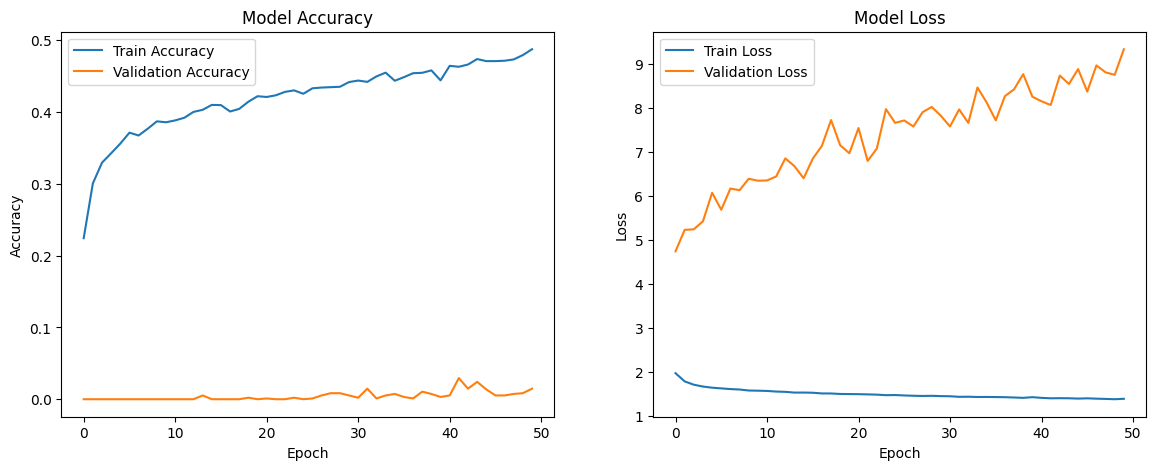

In [42]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [43]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.2859545946121216


## Random Forest

In [44]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [45]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.43313708999158956
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.62      0.49        52
           1       0.37      0.62      0.46       111
           2       0.42      0.50      0.46        90
           3       0.49      0.54      0.51       159
           4       0.42      0.40      0.41       234
           5       0.54      0.35      0.42       363
           6       0.34      0.35      0.35       180

    accuracy                           0.43      1189
   macro avg       0.43      0.48      0.44      1189
weighted avg       0.45      0.43      0.43      1189



Text(0.5, 1.0, 'Training Confusion Matrix')

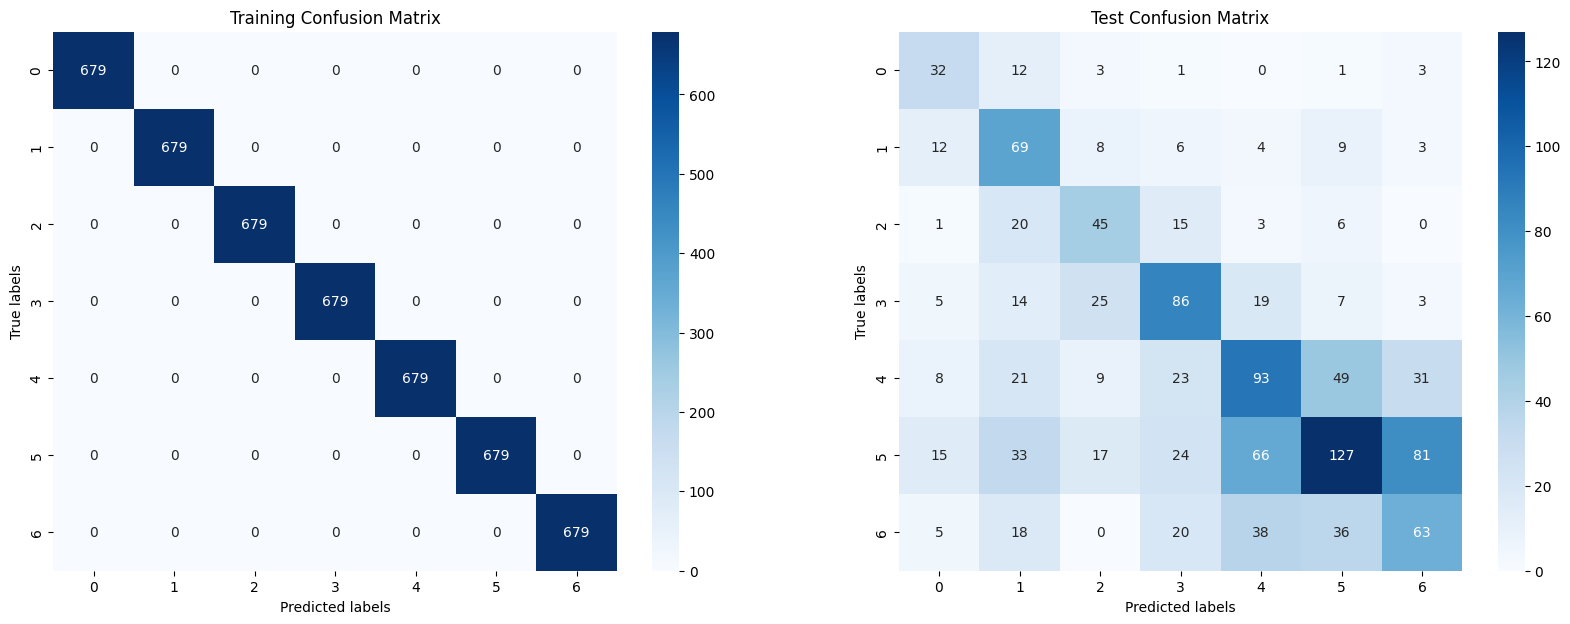

In [46]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [47]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [48]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=137
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [49]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.42640874684608915
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.60      0.44        52
           1       0.41      0.58      0.48       111
           2       0.41      0.53      0.46        90
           3       0.50      0.57      0.53       159
           4       0.41      0.32      0.36       234
           5       0.54      0.36      0.43       363
           6       0.32      0.38      0.35       180

    accuracy                           0.43      1189
   macro avg       0.42      0.48      0.44      1189
weighted avg       0.44      0.43      0.42      1189



In [50]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [51]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)


Test Set Accuracy: 0.43986543313709
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.52      0.44        52
           1       0.43      0.57      0.49       111
           2       0.44      0.57      0.50        90
           3       0.52      0.57      0.54       159
           4       0.41      0.36      0.39       234
           5       0.53      0.40      0.46       363
           6       0.31      0.34      0.32       180

    accuracy                           0.44      1189
   macro avg       0.43      0.47      0.45      1189
weighted avg       0.45      0.44      0.44      1189



## Comparison of the models

7 classes -> random guess 14.29% accuracy

- Logistic Regression
    - Test Accuracy: 0.32548359966358287
    - Time: 2m 14.4s
- SVM
    - Test Accuracy: 0.31118587047939444
    - Time: 6m 59.6s
- Neural Network
    - Train Accuracy: 0.410277
    - Test Accuracy: 0.2859545946121216
    - Time: 12m 21.0s
- Random Forest
    - Test Accuracy: 0.43313708999158956
    - Time: 9m 41.7s
- XGBoost
    - Test Accuracy: 0.43986543313709
    - Time: 2m 14.0s